<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initial-setup" data-toc-modified-id="Initial-setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initial setup</a></span><ul class="toc-item"><li><span><a href="#Load-the-results" data-toc-modified-id="Load-the-results-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load the results</a></span></li><li><span><a href="#Load-population-data" data-toc-modified-id="Load-population-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load population data</a></span></li></ul></li><li><span><a href="#Seting-up-the-indicator-components" data-toc-modified-id="Seting-up-the-indicator-components-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Seting up the indicator components</a></span><ul class="toc-item"><li><span><a href="#Energy-Requirements-($R$)-depending-on-Household-Characteristics" data-toc-modified-id="Energy-Requirements-($R$)-depending-on-Household-Characteristics-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Energy Requirements ($R$) depending on Household Characteristics</a></span></li><li><span><a href="#Load-Simulation-Tariffs-($P_t^j$)" data-toc-modified-id="Load-Simulation-Tariffs-($P_t^j$)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Load Simulation Tariffs ($P_t^j$)</a></span></li><li><span><a href="#Compute-Energy-Cost-($C_t^j$)" data-toc-modified-id="Compute-Energy-Cost-($C_t^j$)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Compute Energy Cost ($C_t^j$)</a></span></li><li><span><a href="#Plot-envelope-$C_t^j$" data-toc-modified-id="Plot-envelope-$C_t^j$-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Plot envelope $C_t^j$</a></span></li><li><span><a href="#Load-family-income-data" data-toc-modified-id="Load-family-income-data-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Load family income data</a></span><ul class="toc-item"><li><span><a href="#Missing-data-census-1996-2001" data-toc-modified-id="Missing-data-census-1996-2001-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Missing data census 1996-2001</a></span><ul class="toc-item"><li><span><a href="#Solution" data-toc-modified-id="Solution-2.5.1.1"><span class="toc-item-num">2.5.1.1&nbsp;&nbsp;</span>Solution</a></span></li></ul></li><li><span><a href="#Forecast-Income-2016---2036" data-toc-modified-id="Forecast-Income-2016---2036-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Forecast Income 2016 - 2036</a></span></li></ul></li></ul></li><li><span><a href="#Compute-Energy-Vulnerability" data-toc-modified-id="Compute-Energy-Vulnerability-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Compute Energy Vulnerability</a></span></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Plot-Percentage-of-Vulnerable-Households" data-toc-modified-id="Plot-Percentage-of-Vulnerable-Households-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Plot Percentage of Vulnerable Households</a></span></li><li><span><a href="#Heatmap-Energy-Vulnerability-per-dwelling-and-household-types" data-toc-modified-id="Heatmap-Energy-Vulnerability-per-dwelling-and-household-types-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Heatmap Energy Vulnerability per dwelling and household types</a></span></li></ul></li></ul></div>

# Initial setup

In [1]:

'''
Created by Angela M. Rojas A. <angelara@student.unimelb.edu.au>


Created on February 2020

'''
import sys
import os

sys.path.append(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments\EMAworkbench')

sys.path.append(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments')

#from ema_workbench.analysis.plotting_util import BOXPLOT, KDE, VIOLIN
from ema_workbench.analysis.plotting import envelopes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import seaborn as sns
from ema_workbench.analysis import prim
#import pareto
import os
import glob
import numpy as np
import pandas as pd
import os
import glob



C:\Users\angel\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\angel\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


Conversion rates

In [37]:
kwh_to_mj = 3.6
mj_to_kwh = 1/kwh_to_mj

mj_to_mwh = mj_to_kwh / 1000
mwh_to_mj = 1 / mj_to_mwh

mj_to_pj = 10 ** -9
pj_to_mj = 1/ mj_to_pj

pj_to_mwh = pj_to_mj * mj_to_mwh
pj_to_kwh = pj_to_mj * mj_to_kwh

mwh_to_pj = 1 / pj_to_mwh
kwh_to_pj = 1 / pj_to_kwh

cents_to_dollars = 0.01

## Load the results

In [38]:
from ema_workbench import load_results

#results = load_results(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments\data\gr4sp_2020-Feb-20-years.tar.gz')
#results = load_results(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments\data\gr4sp_2020-Feb-07_EET_allV3.tar.gz')
results = load_results(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments\simulationData\gr4sp_2020-Mar-05-SOBOL.tar.gz')


In [2]:
# results is a tuple with one dictionary containing the variables and another dictionary with the outcomes
experiments, outcomes = results

# Create a temporary copy of dictionary, with Outcomes Year
outcomesYear = dict(outcomes)

keysToRemove = [] 
# Iterate over the temporary dictionary and delete corresponding key from original dictionary
for (key, value) in outcomesYear.items() :
    if 'Month' in key:
        keysToRemove.append(key)
        
for k in keysToRemove:        
    del outcomesYear[k]   
    
        

NameError: name 'results' is not defined

In [43]:
experiments.head()

annualCpi  annualInflation  capacityFactorChangeBrownCoal  \
0   0.018789         0.013867                            0.0   
1   0.048008         0.013867                            0.0   
2   0.018789         0.031602                            0.0   
3   0.018789         0.013867                            2.0   
4   0.018789         0.013867                            0.0   

   capacityFactorChangeWater  consumption  distributionUsageChange  \
0                        4.0          1.0                      9.0   
1                        4.0          1.0                      9.0   
2                        4.0          1.0                      9.0   
3                        4.0          1.0                      9.0   
4                        9.0          1.0                      9.0   

   energyEfficiency  generationRolloutPeriod  generatorRetirement  \
0               0.0                      9.0                  0.0   
1               0.0                      9.0                  0.0   
2               0.0                      9.0                  0.0   
3               0.0                      9.0                  0.0   
4               0.0                      9.0                  0.0   

   includePublicallyAnnouncedGen  ...  priceChangePercentageWind  \
0                            0.0  ...                       -8.0   
1                            0.0  ...                       -8.0   
2                            0.0  ...                       -8.0   
3                            0.0  ...                       -8.0   
4                            0.0  ...                       -8.0   

   retailUsageChange  rooftopPV  semiScheduleGenSpotMarket  \
0                5.0        6.0                       10.0   
1                5.0        6.0                       10.0   
2                5.0        6.0                       10.0   
3                5.0        6.0                       10.0   
4                5.0        6.0                       10.0   

   semiScheduleMinCapMarketGen  solarUptake  technologicalImprovement  \
0                     21.79502          2.0                   0.05498   
1                     21.79502          2.0                   0.05498   
2                     21.79502          2.0                   0.05498   
3                     21.79502          2.0                   0.05498   
4                     21.79502          2.0                   0.05498   

   scenario  policy  model  
0      None       0  Gr4sp  
1      None       1  Gr4sp  
2      None       2  Gr4sp  
3      None       3  Gr4sp  
4      None       4  Gr4sp  

[5 rows x 25 columns]

In [44]:
#outcomes Options: wholesalePriceYear, GHGYear, tariffsYear, primarySpotProductionYear,
# secondarySpotProductionYear, offSpotProductionYear, rooftopPvProductionYear
# numActorsYear
outcomes_to_show = ['GHGYear','wholesalePriceYear', 'tariffsYear','primarySpotProductionYear', 'secondarySpotProductionYear', 
                    'offSpotProductionYear', 'rooftopPVProductionYear' ]

# 22 levers selected after EET
levers = ['consumption', 'energyEfficiency', 'rooftopPV', 'solarUptake','annualCpi','annualInflation',
          'includePublicallyAnnouncedGen','generationRolloutPeriod','generatorRetirement','technologicalImprovement',
          'priceChangePercentageBrownCoal','priceChangePercentageWind','priceChangePercentageWater','capacityFactorChangeBrownCoal','capacityFactorChangeWater',
          'distributionUsageChange','retailUsageChange',
          'semiScheduleGenSpotMarket','semiScheduleMinCapMarketGen', 'nonScheduleGenSpotMarket', 'nonScheduleMinCapMarketGen', 
          'learningCurve' ]


simulationYears = outcomes['TIMEYear'][0, :]
simulationYears_dateTime = pd.to_datetime(simulationYears, format = '%Y')

startYear = simulationYears[0]

## Load population data

Filter by area code

In [211]:
# region corresponds to VIC (for the whole state), 48 Regional LGAs, and 31 Metropolitan LGAS 
region = 'VIC'
# lga_name can contain: Victoria, Metropolitan LGAs, Regional LGAs, or any Lga name.
# For the current analysis, Victoria is used, as well as the overall regional
# and metropolitan scales to one regional LGA and one metropolitan LGA: Indigo (S), and Melbourne (C)
# Indigo Shire is where the Yackandandah community energy project is located.

lga_name = 'Melbourne (C)'

household_type = pd.read_csv('../assesmentData/postgres_public_household_forecast_victoria.csv')
region_household_type = household_type[ household_type['region'] == region]

Perform linear interpolation to fill missing years

In [212]:
#Create new years from startYear to max, and Interpolate missing values
years_interpolate = pd.DataFrame({"TIMEYear" : np.arange(region_household_type['TIMEYear'].min(), region_household_type['TIMEYear'].max()+1, 1)})

#Merge both the data frame with the missing years with the data from the household types
merged = pd.merge(years_interpolate, region_household_type, how='left',on='TIMEYear')
# Linearly interpolate the missing numerical values
region_household_type = merged.interpolate(method='linear', limit_direction='forward', axis=0)

# Fill out the corresponding string columns missing
region_household_type = region_household_type.ffill()
region_household_type = region_household_type.set_index(['TIMEYear','region','lga_code','lga_name','vifsa_district'])
region_household_type.head(100)

Couple family without children  \
TIMEYear region lga_code lga_name vifsa_district                                   
1991     VIC    VIC      Victoria Victoria                              321447.0   
1992     VIC    VIC      Victoria Victoria                              329594.0   
1993     VIC    VIC      Victoria Victoria                              337741.0   
1994     VIC    VIC      Victoria Victoria                              345888.0   
1995     VIC    VIC      Victoria Victoria                              354035.0   
1996     VIC    VIC      Victoria Victoria                              362182.0   
1997     VIC    VIC      Victoria Victoria                              373984.8   
1998     VIC    VIC      Victoria Victoria                              385787.6   
1999     VIC    VIC      Victoria Victoria                              397590.4   
2000     VIC    VIC      Victoria Victoria                              409393.2   
2001     VIC    VIC      Victoria Victoria                              421196.0   
2002     VIC    VIC      Victoria Victoria                              429936.6   
2003     VIC    VIC      Victoria Victoria                              438677.2   
2004     VIC    VIC      Victoria Victoria                              447417.8   
2005     VIC    VIC      Victoria Victoria                              456158.4   
2006     VIC    VIC      Victoria Victoria                              464899.0   
2007     VIC    VIC      Victoria Victoria                              475626.6   
2008     VIC    VIC      Victoria Victoria                              486354.2   
2009     VIC    VIC      Victoria Victoria                              497081.8   
2010     VIC    VIC      Victoria Victoria                              507809.4   
2011     VIC    VIC      Victoria Victoria                              518537.0   
2012     VIC    VIC      Victoria Victoria                              537477.0   
2013     VIC    VIC      Victoria Victoria                              556417.0   
2014     VIC    VIC      Victoria Victoria                              575357.0   
2015     VIC    VIC      Victoria Victoria                              594297.0   
2016     VIC    VIC      Victoria Victoria                              613237.0   
2017     VIC    VIC      Victoria Victoria                              630475.0   
2018     VIC    VIC      Victoria Victoria                              647713.0   
2019     VIC    VIC      Victoria Victoria                              664951.0   
2020     VIC    VIC      Victoria Victoria                              682189.0   
2021     VIC    VIC      Victoria Victoria                              699427.0   
2022     VIC    VIC      Victoria Victoria                              714137.8   
2023     VIC    VIC      Victoria Victoria                              728848.6   
2024     VIC    VIC      Victoria Victoria                              743559.4   
2025     VIC    VIC      Victoria Victoria                              758270.2   
2026     VIC    VIC      Victoria Victoria                              772981.0   
2027     VIC    VIC      Victoria Victoria                              786903.8   
2028     VIC    VIC      Victoria Victoria                              800826.6   
2029     VIC    VIC      Victoria Victoria                              814749.4   
2030     VIC    VIC      Victoria Victoria                              828672.2   
2031     VIC    VIC      Victoria Victoria                              842595.0   
2032     VIC    VIC      Victoria Victoria                              857453.6   
2033     VIC    VIC      Victoria Victoria                              872312.2   
2034     VIC    VIC      Victoria Victoria                              887170.8   
2035     VIC    VIC      Victoria Victoria                              902029.4   
2036     VIC    VIC      Victoria Victoria                              916888.0   

                 

Show percentage of familiy composition as a function of total number of households

In [213]:
region_household_type_percentage = region_household_type.copy()
for col in region_household_type.columns:
    region_household_type_percentage[col] /= region_household_type_percentage['households']

region_household_type_percentage.head()

Couple family without children  \
TIMEYear region lga_code lga_name vifsa_district                                   
1991     VIC    VIC      Victoria Victoria                              0.223990   
1992     VIC    VIC      Victoria Victoria                              0.225909   
1993     VIC    VIC      Victoria Victoria                              0.227766   
1994     VIC    VIC      Victoria Victoria                              0.229565   
1995     VIC    VIC      Victoria Victoria                              0.231307   

                                                  Couple family with children  \
TIMEYear region lga_code lga_name vifsa_district                                
1991     VIC    VIC      Victoria Victoria                           0.417540   
1992     VIC    VIC      Victoria Victoria                           0.408399   
1993     VIC    VIC      Victoria Victoria                           0.399553   
1994     VIC    VIC      Victoria Victoria                           0.390988   
1995     VIC    VIC      Victoria Victoria                           0.382689   

                                                  One parent family  \
TIMEYear region lga_code lga_name vifsa_district                      
1991     VIC    VIC      Victoria Victoria                 0.091078   
1992     VIC    VIC      Victoria Victoria                 0.092476   
1993     VIC    VIC      Victoria Victoria                 0.093829   
1994     VIC    VIC      Victoria Victoria                 0.095139   
1995     VIC    VIC      Victoria Victoria                 0.096409   

                                                  Other family  Lone person  \
TIMEYear region lga_code lga_name vifsa_district                              
1991     VIC    VIC      Victoria Victoria            0.021797     0.202119   
1992     VIC    VIC      Victoria Victoria            0.022493     0.207901   
1993     VIC    VIC      Victoria Victoria            0.023167     0.213497   
1994     VIC    VIC      Victoria Victoria            0.023819     0.218916   
1995     VIC    VIC      Victoria Victoria            0.024451     0.224165   

                                                  Group household  households  
TIMEYear region lga_code lga_name vifsa_district                               
1991     VIC    VIC      Victoria Victoria               0.043476         1.0  
1992     VIC    VIC      Victoria Victoria               0.042821         1.0  
1993     VIC    VIC      Victoria Victoria               0.042187         1.0  
1994     VIC    VIC      Victoria Victoria               0.041573         1.0  
1995     VIC    VIC      Victoria Victoria               0.040979         1.0

<div class="alert alert-block alert-danger"><b>NB!:</b> The data below is not being used so far, so we may want to delete it or move it to another notebook in case it turns out to be useful later on
</div>    

Load population by dwelling type, and Perform linear interpolation to fill missing years

In [311]:
dwelling_type_by_family = pd.read_csv('../assesmentData/dwellingType_Vic1996_2016.csv')

# for each Dwelling type 'DETACHED', 'SEMI-DETACHED', 'LOW FLAT', 'HIGH FLAT'
for dt in dwelling_type_by_family['DwellingType'].unique():
    
    # filter dwellings by type to do the interpolation
    filtered = dwelling_type_by_family[ dwelling_type_by_family['DwellingType'] == dt]
    
    # Linearly interpolate the missing numerical values    
    dwelling_type_by_family[ dwelling_type_by_family['DwellingType'] == dt] = filtered.interpolate(method='linear', limit_direction='forward', axis=0)

# Set Year as index
dwelling_type_by_family.set_index(['TIMEYear','region','DwellingType'], inplace=True)

# convert to int columns 3 to last
dwelling_type_by_family = dwelling_type_by_family.astype(int)

compute percentages

In [215]:
dwelling_type_by_family_percentage = dwelling_type_by_family.groupby(['TIMEYear','region']).apply(lambda x: x / x['households'].sum())   
    
dwelling_type_by_family_percentage.head()

Couple family with children   \
TIMEYear region DwellingType                                   
1996     Vic    DETACHED                            0.359151   
                SEMI-DETACHED                       0.009860   
                LOW FLAT                            0.010227   
                HIGH FLAT                           0.001573   
1997     Vic    DETACHED                            0.354397   

                                Couple family without children   \
TIMEYear region DwellingType                                      
1996     Vic    DETACHED                               0.202610   
                SEMI-DETACHED                          0.014755   
                LOW FLAT                               0.019085   
                HIGH FLAT                              0.001513   
1997     Vic    DETACHED                               0.203252   

                                One parent family    Other family   \
TIMEYear region DwellingType                                         
1996     Vic    DETACHED                  0.083030        0.009590   
                SEMI-DETACHED             0.006794        0.001465   
                LOW FLAT                  0.009575        0.002628   
                HIGH FLAT                 0.001486        0.000389   
1997     Vic    DETACHED                  0.084056        0.009547   

                                Lone person    Group household   households  
TIMEYear region DwellingType                                                 
1996     Vic    DETACHED            0.134600           0.023657    0.812637  
                SEMI-DETACHED       0.026476           0.006160    0.065511  
                LOW FLAT            0.060502           0.009587    0.111605  
                HIGH FLAT           0.004534           0.000753    0.010247  
1997     Vic    DETACHED            0.135845           0.023181    0.810279

Fill population data from 2016 onwards using the distribution of occupancy and dwelling type from 2016

In [216]:
distribution_dwellings = dwelling_type_by_family_percentage.loc[2016,:]

# for each Dwelling type 'DETACHED', 'SEMI-DETACHED', 'LOW FLAT', 'HIGH FLAT'
for year in np.arange(2016,simulationYears.max()+1,1):
    population_year = region_household_type.loc[year,:].values
    dwelling_type_by_family.loc[year,:] = distribution_dwellings.values * population_year

dwelling_type_by_family = dwelling_type_by_family.astype(int)
dwelling_type_by_family.head()

Couple family with children   \
TIMEYear region DwellingType                                   
1996     Vic    DETACHED                              543568   
                SEMI-DETACHED                          14923   
                LOW FLAT                               15478   
                HIGH FLAT                               2380   
1997     Vic    DETACHED                              545474   

                                Couple family without children   \
TIMEYear region DwellingType                                      
1996     Vic    DETACHED                                 306647   
                SEMI-DETACHED                             22332   
                LOW FLAT                                  28885   
                HIGH FLAT                                  2290   
1997     Vic    DETACHED                                 312837   

                                One parent family    Other family   \
TIMEYear region DwellingType                                         
1996     Vic    DETACHED                    125664           14514   
                SEMI-DETACHED                10283            2217   
                LOW FLAT                     14492            3978   
                HIGH FLAT                     2249             589   
1997     Vic    DETACHED                    129376           14695   

                                Lone person    Group household   households  
TIMEYear region DwellingType                                                 
1996     Vic    DETACHED              203714              35805     1229912  
                SEMI-DETACHED          40071               9323       99149  
                LOW FLAT               91569              14510      168912  
                HIGH FLAT               6862               1139       15509  
1997     Vic    DETACHED              209087              35680     1247150

# Seting up the indicator components

![caption](LIHC_Modified.png)



## Energy Requirements ($R$) depending on Household Characteristics

$C_t^j = R * P_t^j$ where $R$ is the energy requirement for space conditioning, water heating, lights, appliances and cooking. This energy requirement depends on household characteristics of size, age of property, occupancy level, fuel mix, and family type. 

Note that $R$ is the minimum energy requirement and remains constant across simulations. For any two simulation runs $j$ and $i$, where $j\neq i$, any change in $C_t^j \neq C_t^i$ depends only on the energy prices $P_t^i$ and $P_t^j$.

R is defined using data from the IMAP report. 

In [173]:
# load the IMAP data
R_df = pd.read_excel('../assesmentData/IMAP Typologies E consumption per type with end uses.xlsx')

R_df.head()

DwellingType  DwellingAgeStart  DwellingAgeEnd                OccupancyType  \
0     DETACHED              2005            2050  Couple family with children   
1     DETACHED              2005            2050  Couple family with children   
2     DETACHED              2005            2050  Couple family with children   
3     DETACHED              2005            2050  Couple family with children   
4     DETACHED              2005            2050  Couple family with children   

   OccupancyScenario   EnergyType  AppliancesElectric/sqm  AppliancesGas/sqm  \
0   ALL DAY OCCUPIED          GAS               15.215168           3.063393   
1  HALF DAY OCCUPIED          GAS               15.215168           3.063393   
2   EVENING OCCUPIED          GAS               14.195518           2.517857   
3   ALL DAY OCCUPIED  ELECTRICITY               17.757132           0.000000   
4  HALF DAY OCCUPIED  ELECTRICITY               17.757132           0.000000   

   Cooling/sqm  HeatingElectric/sqm  HeatingGas/sqm  HotwaterElectric/sqm  \
0     2.028891             0.000000       38.722250              0.000000   
1     1.847866             0.000000       35.599635              0.000000   
2     1.107231             0.000000       32.541510              0.000000   
3     2.028891            13.015882        0.000000             17.664312   
4     1.847866            11.966264        0.000000             17.664312   

   HotwaterGas/sqm  Lighting/sqm  TotalElectricity/sqm  TotalGas/sqm  \
0        32.111349      2.918359             20.162418     73.896991   
1        32.111349      2.918359             19.981393     70.774377   
2        30.725056      2.918359             18.221109     65.784423   
3         0.000000      2.918359             53.384577      0.000000   
4         0.000000      2.918359             52.153934      0.000000   

   TotalEnergy/sqm/kwh  AverageFloorArea  Total Energy kWh/year  PERSONSxHH  
0            94.059410               224           21069.307750           4  
1            90.755770               224           20329.292511           4  
2            84.005532               224           18817.239063           4  
3            53.384577               224           11958.145196           4  
4            52.153934               224           11682.481120           4

The function `create_R_matrix_df( energy_req )` creates a matrix using the energy requirement `energy_req` specified in the agument. The matrix can be used to compute $C$

In [174]:
def create_R_matrix_df( energy_req ):
    
    # Create an array with the total energy of size rowxcol
    size = (experiments.shape[0],38)

    array_total_energy = np.full( size, energy_req )

    # Create a df for the simulation years including the Total Energy required according 
    # to different household characteristics
    R_df_dwelling_type = pd.DataFrame( data=array_total_energy ,columns=simulationYears )
    
    return R_df_dwelling_type

The function `energy_requirement( occupancy_type, dwelling_type, energy_type)` returns the __mean__ energy requirement given the houshold profile: __occupancy_type, dwelling_type, energy_type__

In [247]:
def energy_requirement( occupancy_type, dwelling_type, energy_type):
    occupancy_equivalised = occupancy_type
    
    # equivalences of energy requirements missing in IMAP
    if occupancy_type == 'Lone person':
        occupancy_equivalised = 'Couple family without children'
    if occupancy_type == 'Group household':
        occupancy_equivalised = 'Other family'
    
    # Filtering
    R_df_filetered = R_df[( R_df['DwellingType'] == dwelling_type ) &                       
                      ( R_df['OccupancyType'] == occupancy_equivalised ) &                      
                      ( R_df['EnergyType'] == energy_type )]
    
    # Mean energy requriment of profile ( occupancy_type, dwelling_type, energy_type )
    energy_requirement_mean = R_df_filetered["Total Energy kWh/year"].mean()
    
    # equivalences factor of energy requirements missing in IMAP
    if occupancy_type == 'Lone person':
        return energy_requirement_mean * 0.7
    
    return energy_requirement_mean

## Load Simulation Tariffs ($P_t^j$)

<div class="alert alert-block alert-danger"><b>NB!:</b> Apply the following

- Adjust to nominal: 1998 - 2018
- Leave 2018 - 2036 as it is currently adjusted for 2018
</div>    

Load CPI historic conversion rates

In [282]:
cpi = pd.read_csv ('../assesmentData/postgres_public_cpi_conversion.csv')
cpi_df = pd.DataFrame(cpi)
cpi_df.set_index(['date'],inplace=True)

cpi_1998_2018 = cpi_df.loc[1998:2018,:].T
cpi_1998_2018

date                 1998  1999  2000  2001  2002  2003  2004  2005  2006  \
conversion_variable  1.68  1.66  1.59  1.52  1.47  1.44   1.4  1.37  1.32   

date                 2007  ...  2009  2010  2011  2012  2013  2014  2015  \
conversion_variable  1.29  ...  1.21  1.18  1.14  1.12  1.09  1.07  1.05   

date                 2016  2017  2018  
conversion_variable  1.04  1.02   1.0  

[1 rows x 21 columns]

In [301]:
ooi = 'tariffsYear'

# Select matrix of tariffs (array of arrays)
data_tariffs = outcomesYear[ooi][:, :]

# Create a df with the data_tariffs matrix
P_j_df = pd.DataFrame(data_tariffs,columns=simulationYears)

# Convert units of P to $/KWh
P_j_df = P_j_df * cents_to_dollars 

# remove tariffs CPI adjustment from 1998 to 2018
P_j_df.loc[:,1998:2018] = P_j_df.loc[:,1998:2018].values / cpi_1998_2018.values


P_j_df.head()

1998      1999      2000      2001      2002      2003      2004  \
0  0.173  0.130071  0.133454  0.163309  0.147084  0.180149  0.180199   
1  0.173  0.130071  0.133454  0.163309  0.147084  0.180149  0.180199   
2  0.173  0.130071  0.133454  0.163309  0.147084  0.180149  0.180199   
3  0.173  0.126403  0.116203  0.138405  0.118828  0.146710  0.170753   
4  0.173  0.130006  0.133246  0.162033  0.147005  0.179912  0.180045   

       2005      2006      2007  ...      2026      2027      2028      2029  \
0  0.179420  0.180261  0.188826  ...  0.288142  0.306557  0.322476  0.332571   
1  0.179420  0.180261  0.188826  ...  0.213434  0.214577  0.212088  0.204089   
2  0.179420  0.180261  0.188825  ...  0.329059  0.355998  0.381147  0.400112   
3  0.186918  0.196879  0.204900  ...  0.287927  0.306476  0.322431  0.332636   
4  0.178034  0.178843  0.183018  ...  0.288201  0.306423  0.322328  0.332651   

       2030      2031      2032      2033      2034      2035  
0  0.331103  0.329362  0.329119  0.324325  0.317613  0.312263  
1  0.187665  0.170607  0.153423  0.133821  0.112952  0.092273  
2  0.405419  0.410508  0.417482  0.418863  0.417422  0.417457  
3  0.330940  0.329001  0.328472  0.323589  0.316853  0.311342  
4  0.331056  0.329267  0.328847  0.324153  0.317544  0.312156  

[5 rows x 38 columns]

## Compute Energy Cost ($C_t^j$)

$C_t^j = R * P_t^j$, where $C_t^j$ stands for the energy cost in year $t$ for simulation $j$. 

$R$ is given in _KWh/year_, and $P_t^j$ in _c/KWh_. Energy prices are converted to _$/KWh_.

Load all tariffs $P_t^j$, where $t$ is the year, and $j$ is the jth simulation run. 


Test the result from using the mean energy requirements $C_t^j = mean(R) * P_t^j$

In [304]:
R_matrix_df = create_R_matrix_df( R_df['Total Energy kWh/year'].mean() )

C_j_df = R_matrix_df * P_j_df
C_j_df.head()

1998         1999         2000         2001         2002  \
0  2256.815466  1696.796618  1740.929595  2130.391441  1918.734682   
1  2256.815466  1696.796618  1740.929595  2130.391441  1918.734682   
2  2256.815466  1696.796618  1740.929595  2130.391441  1918.734682   
3  2256.815466  1648.943448  1515.893543  1805.521055  1550.130602   
4  2256.815466  1695.955162  1738.212338  2113.755255  1917.701894   

          2003         2004         2005         2006         2007  ...  \
0  2350.077105  2350.732558  2340.565446  2351.535897  2463.263227  ...   
1  2350.077105  2350.732647  2340.565446  2351.541741  2463.264014  ...   
2  2350.077105  2350.732558  2340.565446  2351.541741  2463.252152  ...   
3  1913.858637  2227.501431  2438.381679  2568.320169  2672.959549  ...   
4  2346.981292  2348.717481  2322.486741  2333.037923  2387.497402  ...   

          2026         2027         2028         2029         2030  \
0  3758.869718  3999.084192  4206.755993  4338.454070  4319.302874   
1  2784.285934  2799.193826  2766.719225  2662.379947  2448.119699   
2  4292.637860  4644.062984  4972.127799  5219.530369  5288.763288   
3  3756.061590  3998.036217  4206.172787  4339.289971  4317.169351   
4  3759.635411  3997.341333  4204.831000  4339.485251  4318.687715   

          2031         2032         2033         2034         2035  
0  4296.588452  4293.412261  4230.878844  4143.322937  4073.522384  
1  2225.598478  2001.430078  1745.723645  1473.478667  1203.711947  
2  5355.146422  5446.128311  5464.137479  5445.348726  5445.802112  
3  4291.874282  4284.980765  4221.281267  4133.400198  4061.513272  
4  4295.347518  4289.869148  4228.634266  4142.424044  4072.125774  

[5 rows x 38 columns]

## Plot envelope $C_t^j$

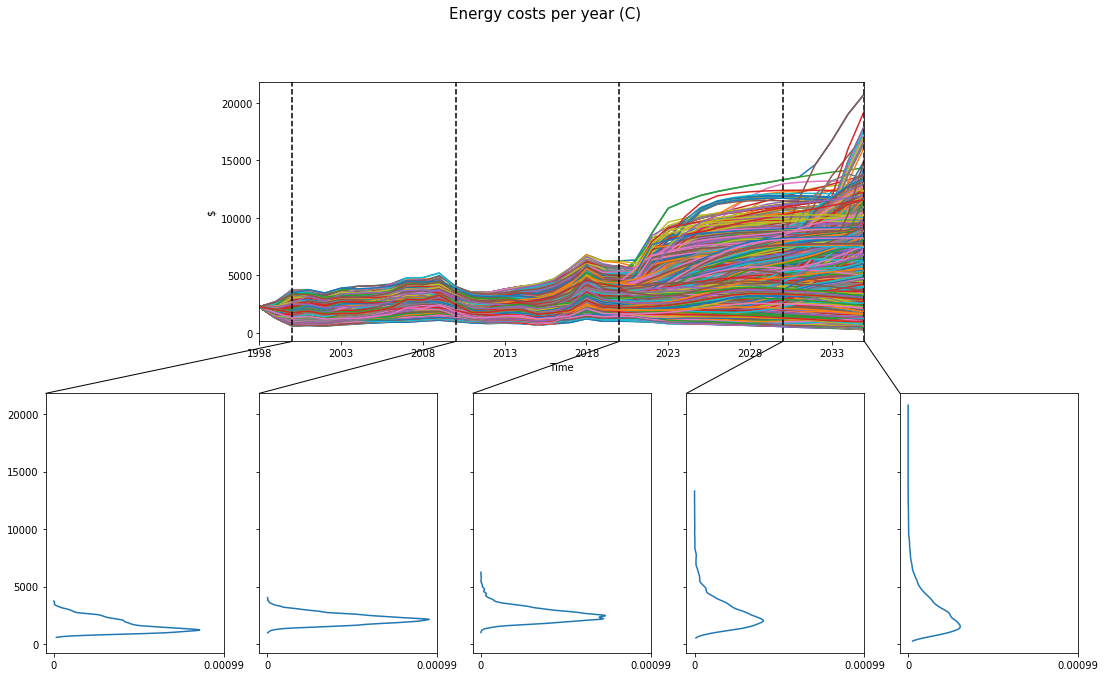

In [305]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density 
ooi = 'Energy costs per year (C)'
outcomes[ooi] = C_j_df.values
fig, ax_env = multiple_densities(experiments, outcomes, outcomes_to_show = ooi,
                                 points_in_time=[2000-startYear,2010-startYear,2020-startYear,2030-startYear,2035-startYear], 
                                 density = Density.KDE, grouping_specifiers=None , titles={ooi}, ylabels={ooi: "$"}, legend=True,
                                 fill=False, plot_type=PlotType.ENV_LIN)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(simulationYears[range(0,len(simulationYears),5)])

## Show labels
# labels = ax_env['F']['main plot'].get_xticklabels()
# for l in labels:
#     print (l.get_text)


fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

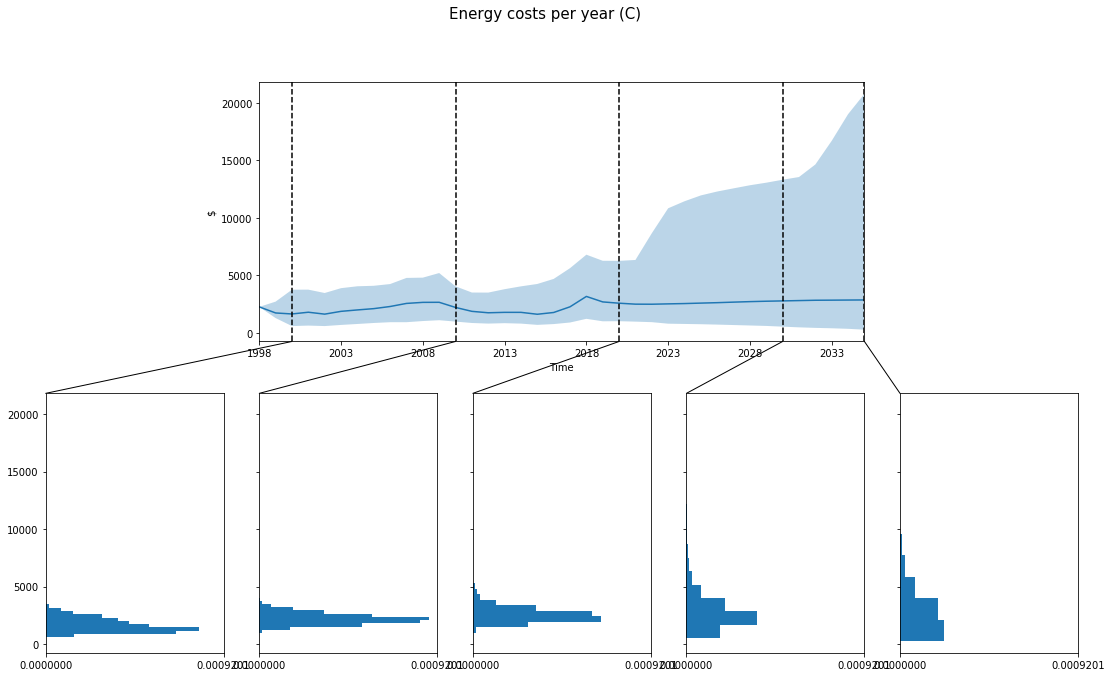

In [307]:
ooi = 'Energy costs per year (C)'
outcomes[ooi] = C_j_df.values
fig, ax_env = multiple_densities(experiments, outcomes, outcomes_to_show = ooi,
                                 points_in_time=[2000-startYear,2010-startYear,2020-startYear,2030-startYear,2035-startYear], 
                                 density = Density.HIST, grouping_specifiers=None , titles={ooi}, ylabels={ooi: "$"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(simulationYears[range(0,len(simulationYears),5)])

## Show labels
# labels = ax_env['F']['main plot'].get_xticklabels()
# for l in labels:
#     print (l.get_text)


fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

## Load family income data

Data obtained from ABS Census. The earliest income data gathered for this analysis is from the 1996 census. Followed by the 2001 census. From 2006, income data was gathered using the TableBuilder from the ABS. Data is available on this tool for the 2006, 2011 and 2016 Census. The data used droped the values on households who only stated their 'partial income' or did not stated their income at all. 

In [257]:
import qgrid


I_df = pd.read_excel('../assesmentData/STRD Dwelling Structure_HIED HouseholdEquivalisedIncome_FMCFFamily Composition_VIC_20061116_IMAPconventionV2.xlsx')
I_df.fillna(method='ffill',inplace=True)
I_df.set_index(['TIMEYear', 'STRD Dwelling Structure', 'HIED Household Equivalised Income (gross weekly)', 
                'yearly median $','weekly median $','lower bound $','upper bound $'], inplace=True)

#qgrid.show_grid(I_df)
I_df = I_df.astype(int)
I_df.head()

Couple family without children  \
TIMEYear STRD Dwelling Structure HIED Household Equivalised Income (gross weekly) yearly median $ weekly median $ lower bound $ upper bound $                                   
1996.0   DETACHED                Negative/nil income                              -52             -1.0            -1            -1                                       3207   
                                 $1-$119                                           3120            60.0            1             119                                     1130   
                                 $120-$299                                         10920           210.0           120           299                                    67704   
                                 $300-$499                                         20800           400.0           300           499                                    78395   
                                 $500-$699                                         31200           600.0           500           699                                    45125   

                                                                                                                                               Couple family with children  \
TIMEYear STRD Dwelling Structure HIED Household Equivalised Income (gross weekly) yearly median $ weekly median $ lower bound $ upper bound $                                
1996.0   DETACHED                Negative/nil income                              -52             -1.0            -1            -1                                    1604   
                                 $1-$119                                           3120            60.0            1             119                                  1058   
                                 $120-$299                                         10920           210.0           120           299                                 14728   
                                 $300-$499                                         20800           400.0           300           499                                 58893   
                                 $500-$699                                         31200           600.0           500           699                                 82441   

                                                                                                                                               One parent family  \
TIMEYear STRD Dwelling Structure HIED Household Equivalised Income (gross weekly) yearly median $ weekly median $ lower bound $ upper bound $                      
1996.0   DETACHED                Negative/nil income                              -52             -1.0            -1            -1                          1094   
                                 $1-$119                                           3120            60.0            1             119                        1471   
                                 $120-$299                                         10920           210.0           120           299                       35067   
                                 $300-$499                                         20800           400.0           300           499                       43755   
                                 $500-$699                                         31200           600.0           500           699                       24845   

                                                                                                                                               Other family  \
TIMEYear STRD Dwelling Structure HIED Household Equivalised Income (gross weekly) yearly median $ weekly median $ lower bound $ upper bound $                 
1996.0   DETACHED                Negative/nil income                              -52             -1.0            -1            -1                      517   
                                 $1-$119                  

### Missing data census 1996-2001

1996 and 2001 Income data does not have the population distributed by dwelling type.
#### Solution
- Compute 2006 total population for each household type across all dwelling types, 
- Compute 2006 distribution of population across dwelling types, for each household types, and 
- Apply 2006 distribution to the income data of 2001 and 1996 that was missing the distributions across dwelling types

In [258]:

# Compute 2006 total population for each household type across all dwelling types
I_totals_2006 = I_df.loc[2006,:].sum()

# Compute 2006 distribution of population across dwelling types, for each household types
I_distribution_dwellings_2006 = I_df.loc[2006,:].groupby(['STRD Dwelling Structure']).apply(lambda x: x.sum() / I_totals_2006 )

# Apply 2006 distribution to the income data of 2001 and 1996 that was missing the distributions across
# dwelling types
I_df.loc[[1996,2001],:] = I_df.loc[[1996,2001],:].groupby(['TIMEYear','STRD Dwelling Structure']).apply(lambda x: x * I_distribution_dwellings_2006 )
I_df = I_df.astype(int)

### Forecast Income 2016 - 2036

Use Income distribution from the last census in 2016, and apply the distribution to the population forecast   

In [259]:
# total_households = I_df.loc[2016,I_df.columns[:-1]].sum().sum()
# I_distribution_2016 = I_df.loc[2016,I_df.columns[:-1]] / total_households
I_distribution_2016 = I_df.loc[2016,I_df.columns[:-1]].transform(lambda x: x / x.sum())

# Compute percentage of household in 2016 that didn't declare their income
I_distribution_2016_not_applicable = region_household_type.loc[2016,:] - I_df.loc[2016,:].sum()
I_distribution_2016_not_applicable /= region_household_type.loc[2016,region_household_type.columns[:]]
    
# for each Dwelling type 'DETACHED', 'SEMI-DETACHED', 'LOW FLAT', 'HIGH FLAT'
for year in np.arange(2017,2037,1):
    
    # get population for forecasted year
    population_year = region_household_type.loc[year,region_household_type.columns[:-1]].values 
    
    # remove same proportion of N/A shown in 2016
    population_year *= 1-I_distribution_2016_not_applicable.iloc[:,:-1].values
    
   
    # multiply population X distribution in income categories
    I_df_year = (I_distribution_2016 * population_year).astype(int)
    
    # create Dataframe with new data
    year_index = pd.Series(np.full((I_distribution_2016.shape[0]),year))
    I_df_year = pd.concat([I_df_year], keys=year_index, names=['TIMEYear'])
    
    # compute last column with total number of household for each row
    I_df_year = I_df_year.astype(int)
    I_df_year['households'] = I_df_year.sum(axis=1).values

    # add to the income data
    I_df = I_df.append(I_df_year)

I_df = I_df.astype(int)

In [253]:
import qgrid
qgrid.show_grid(I_df)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

# Compute Energy Vulnerability

Threshold for median income

In [254]:
threshold = 0.5

Function to query the Income data

In [255]:
# def filter_I_by_year( year ):
#     if year <= 2014:
#         return I_df.query('TIMEYear - 2  <= @year and TIMEYear + 2  >= @year ')
#     if year >= 2015:
#         return I_df.query('TIMEYear == 2016 ')
    
    
def filter_I_by_year( year ):
    if year <= 2014:
        return I_df.query('TIMEYear - 2  <= @year and TIMEYear + 2  >= @year ')
    if year == 2015:
        return I_df.query('TIMEYear == 2016 ')
    else:
        return I_df.query('TIMEYear == @year') 
    
# def filter_I_by_year( year ):
#     minYear = I_df.index.get_level_values(0).min()
#     maxYear = I_df.index.get_level_values(0).max()
#     if year < minYear:
#         return I_df.query('TIMEYear == @minYear')     
#     if year > maxYear:
#         return I_df.query('TIMEYear == @maxYear ')
#     else:
#         return I_df.query('TIMEYear - 2  <= @year and TIMEYear + 2  >= @year ')
        

Quantification of energy vulnerability

In [302]:
import itertools

# [income bracket, o, d]
# f = %
# income = %
# d = %
# o = %

size = (experiments.shape[0],38)

# household energy requirements parameteres
occupancy_types = I_df.columns[:-1]
dwelling_types = R_df["DwellingType"].unique()
fuel_mix = R_df["EnergyType"].unique()

# Create all possible profiles: the cross product of all possible energy requirements
profiles = list(itertools.product(*[occupancy_types, dwelling_types, fuel_mix]))

# Create energy vulnerability dataframes
energy_vulnerable_df = {}
total_households = {}
for o,d,f in profiles:
    energy_vulnerable_df[(o,d,f)] = pd.DataFrame(data=np.full(size,0), columns=simulationYears)
    for year in simulationYears:    
        total_households[(o,d,f,year)] = 0

energy_vulnerable_df_total = pd.DataFrame(data=np.full(size,0), columns=simulationYears)

        
for o, d, f in profiles:
    
    # Specify the percentage of population with a given fuel mix
    pop_f = 0.8 if f == "GAS" else 0.2
    
    # Retrieves the mean energy requirement given the household profile
    en_req = energy_requirement( o, d, f)
    
    print("compute for o: {}, d: {}, f: {} - pop_f {}, en_req: {} ".format(o,d,f, pop_f, en_req))
    
    # compte energy costs C
    R_matrix_df = create_R_matrix_df( en_req )
    C_j_df = R_matrix_df * P_j_df
       
    # for each year of the simulation runs
    for year in simulationYears:    
        
        # filter income information for a given year
        I_df_filtered = filter_I_by_year(year)

        # Compute Median income = sum (income*households by occupancy type) / total households by occup
        I_median = (I_df_filtered.index.get_level_values('yearly median $') * 
                            I_df_filtered[o]).sum() / I_df_filtered[o].sum()
        
        #I_median = (I_df_filtered.index.get_level_values('yearly median $') * 
        #                    I_df_filtered["households"]).sum() / I_df_filtered["households"].sum()

        # Compute threshold defined as 60 or 50% of median income
        I_threshold = I_median * threshold

        # for each income threshold in Dwelling type d
        I_df_filtered_dwelling_type = I_df_filtered[I_df_filtered.index.get_level_values('STRD Dwelling Structure') == d]
        for key, row in I_df_filtered_dwelling_type.iterrows():
            
            # compute the disposable income for each simulation run
            income_after_c = key[ I_df.index.names.index('yearly median $') ] - C_j_df[year]

            # Population needs to depend upon [income bracket, o, d, f]
            households = row[ list(I_df.columns.values).index(o) ] * pop_f
            
            # add to 'total' number of households that do not meet the threshold
            energy_vulnerable_df_total[year] += (income_after_c < I_threshold  ).astype(int) * households
            
            # add to (o,d,f) number of households that do not meet the threshold
            energy_vulnerable_df[(o,d,f)][year] += (income_after_c < I_threshold  ).astype(int) * households
            
            # keep track of total household for (o,d,f)
            total_households[(o,d,f,year)] += households
    
# compute percentage of population    
for o,d,f in profiles:
    for year in simulationYears:    
        energy_vulnerable_df[(o,d,f)][year] /= total_households[(o,d,f,year)]

energy_vulnerable_df_total /= I_df_filtered['households'].sum()
    

compute for o: Couple family without children, d: DETACHED, f: GAS - pop_f 0.8, en_req: 17890.894276237777 
compute for o: Couple family without children, d: DETACHED, f: ELECTRICITY - pop_f 0.2, en_req: 9175.233973674443 
compute for o: Couple family without children, d: HIGH FLAT, f: GAS - pop_f 0.8, en_req: 12927.297684191111 
compute for o: Couple family without children, d: HIGH FLAT, f: ELECTRICITY - pop_f 0.2, en_req: 7263.678626996667 
compute for o: Couple family without children, d: LOW FLAT, f: GAS - pop_f 0.8, en_req: 17327.76157174111 
compute for o: Couple family without children, d: LOW FLAT, f: ELECTRICITY - pop_f 0.2, en_req: 8853.88991753778 
compute for o: Couple family without children, d: SEMI-DETACHED, f: GAS - pop_f 0.8, en_req: 16599.98954358 
compute for o: Couple family without children, d: SEMI-DETACHED, f: ELECTRICITY - pop_f 0.2, en_req: 8549.996066259999 
compute for o: Couple family with children, d: DETACHED, f: GAS - pop_f 0.8, en_req: 20660.26484832000

# Analysis

<img src="classification.png" alt="Drawing" style="width: 600px;"/>


## Plot Percentage of Vulnerable Households

C:\Users\angel\Documents\GitHub\gr4sp\experiments\EMAworkbench\ema_workbench\analysis\plotting.py:750: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


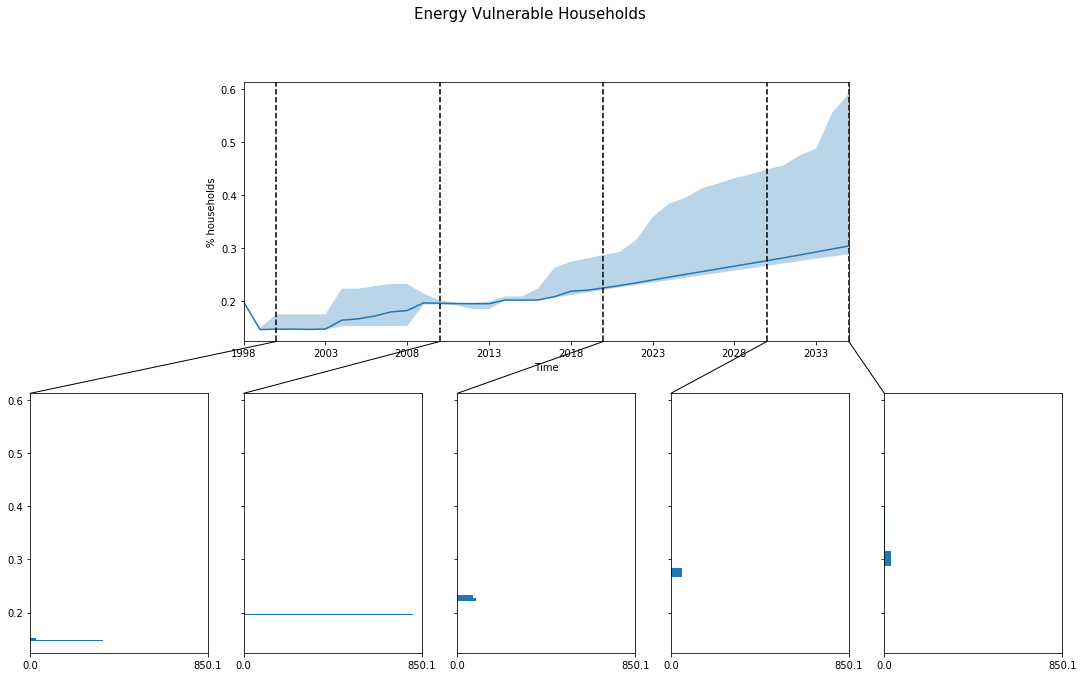

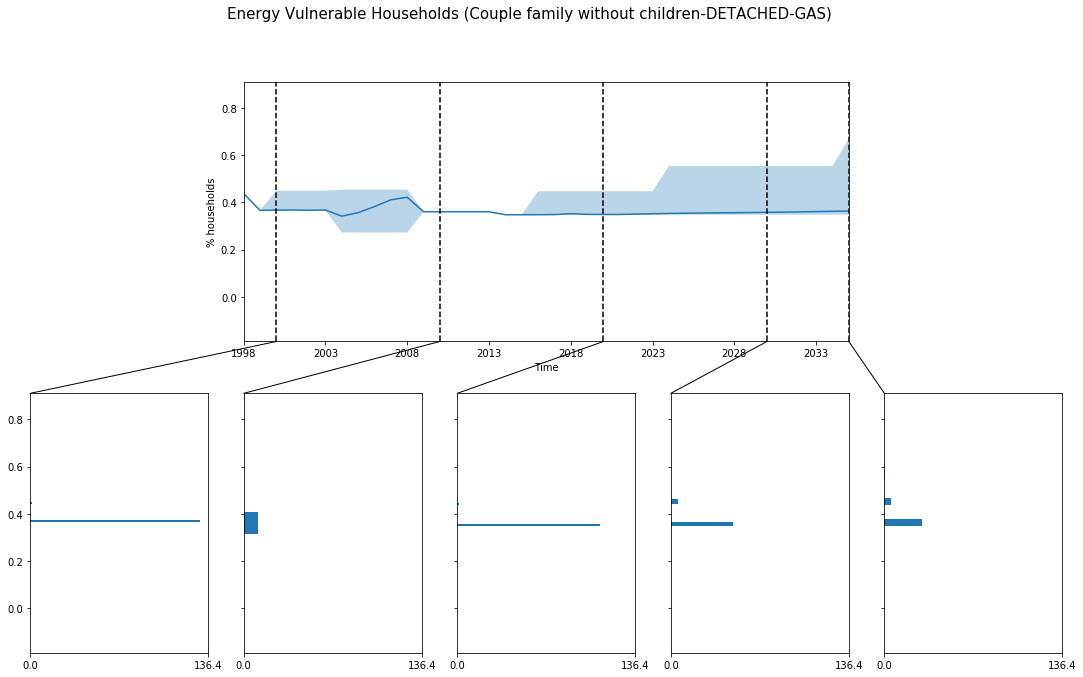

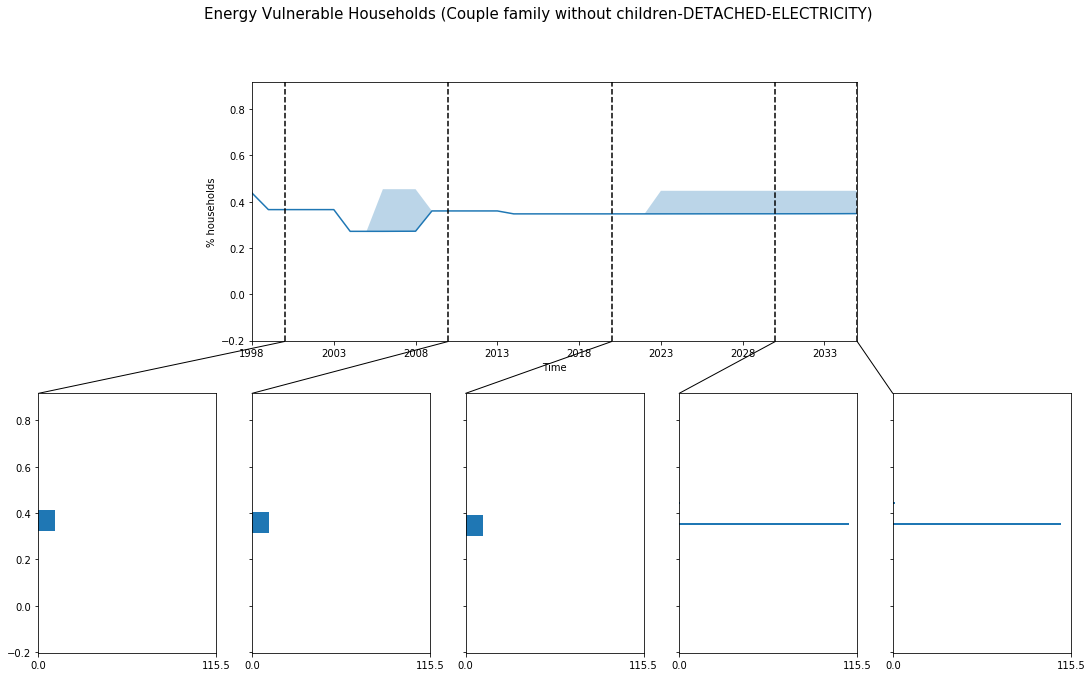

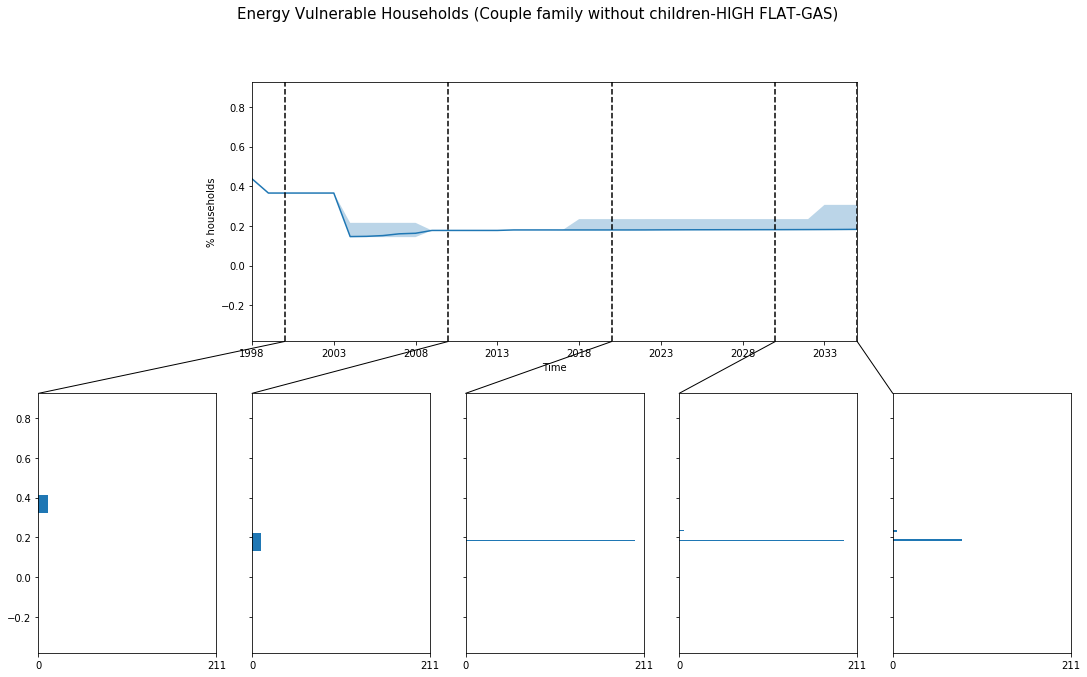

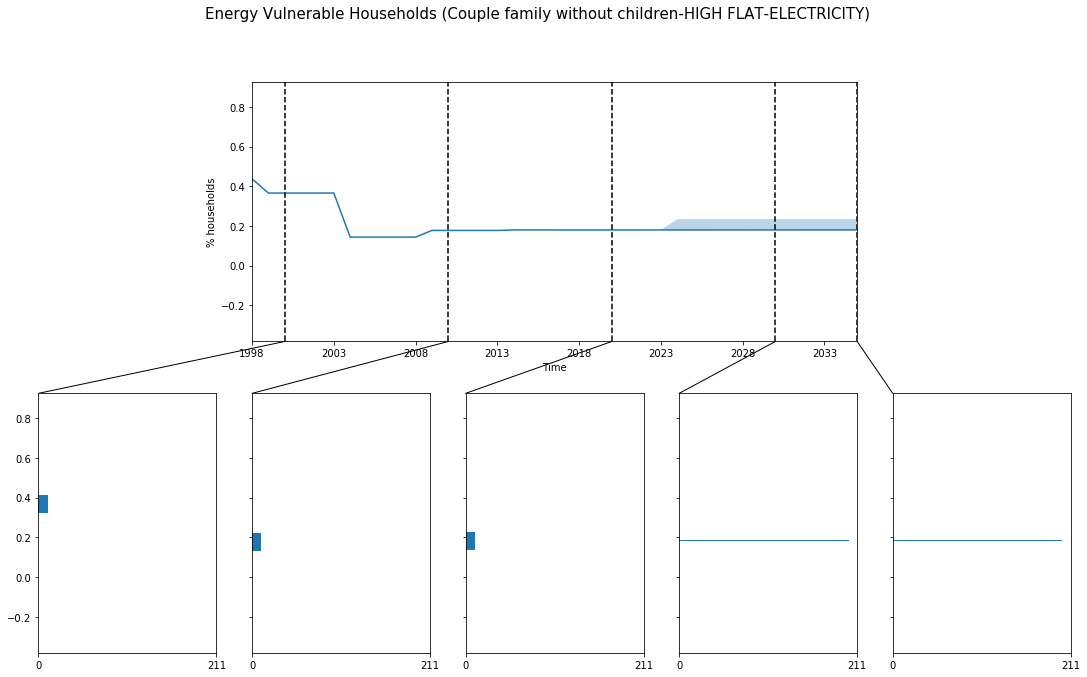

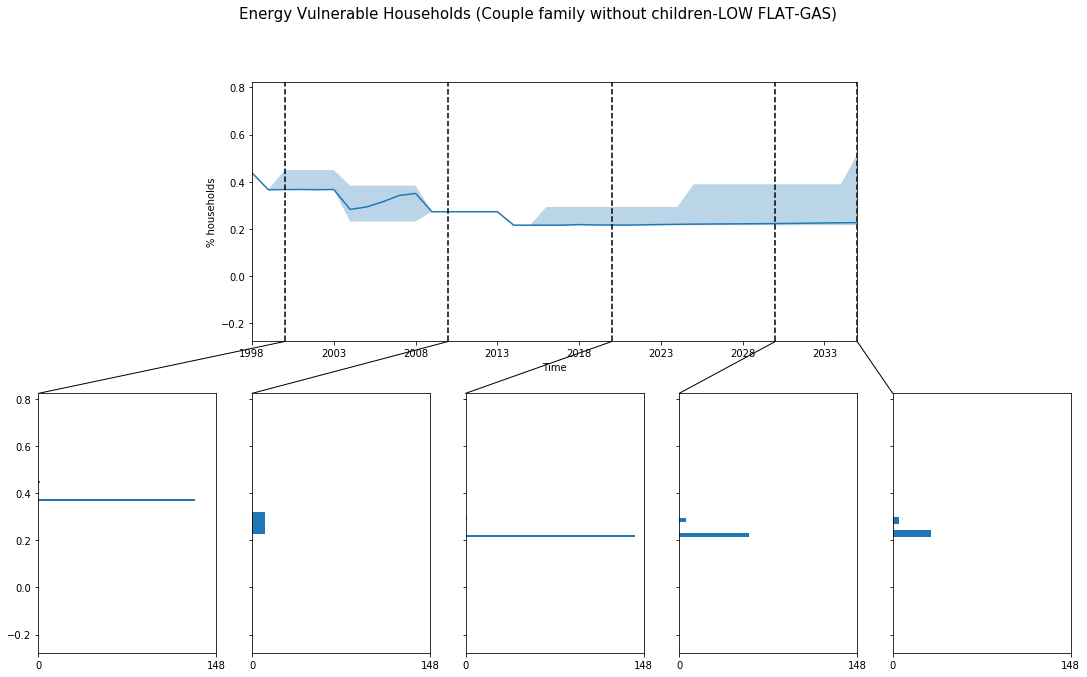

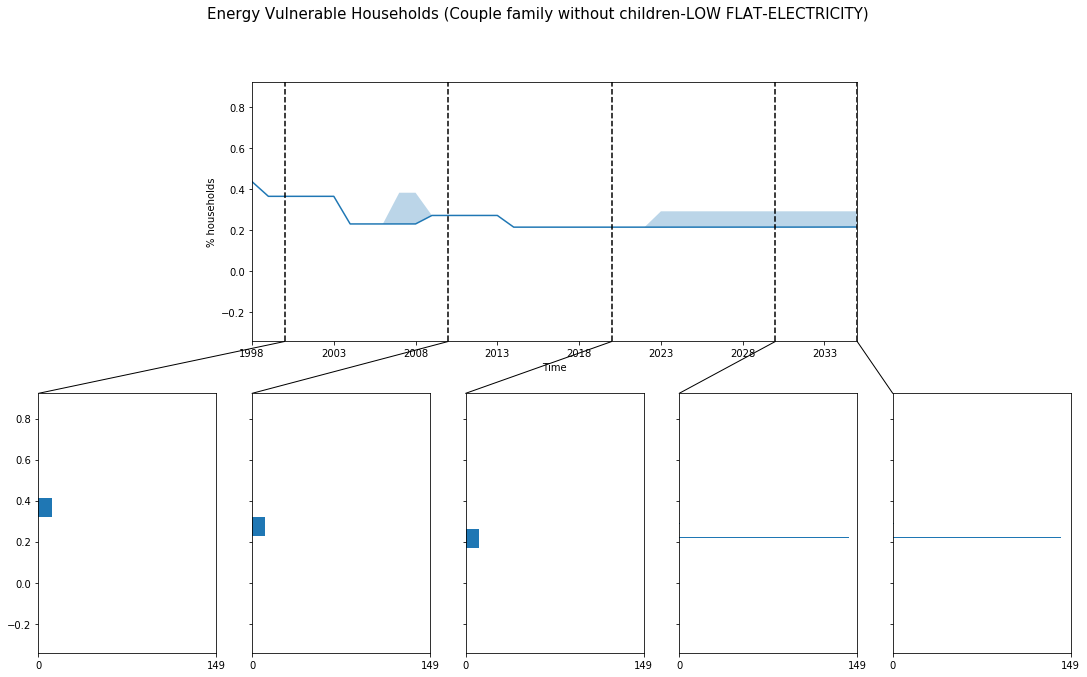

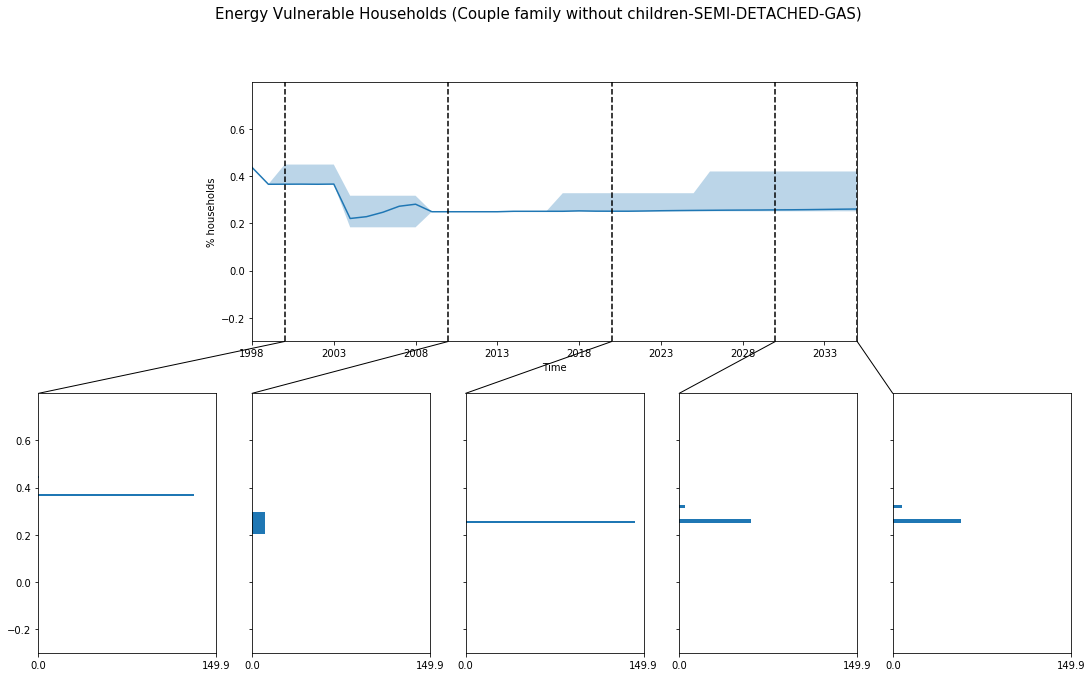

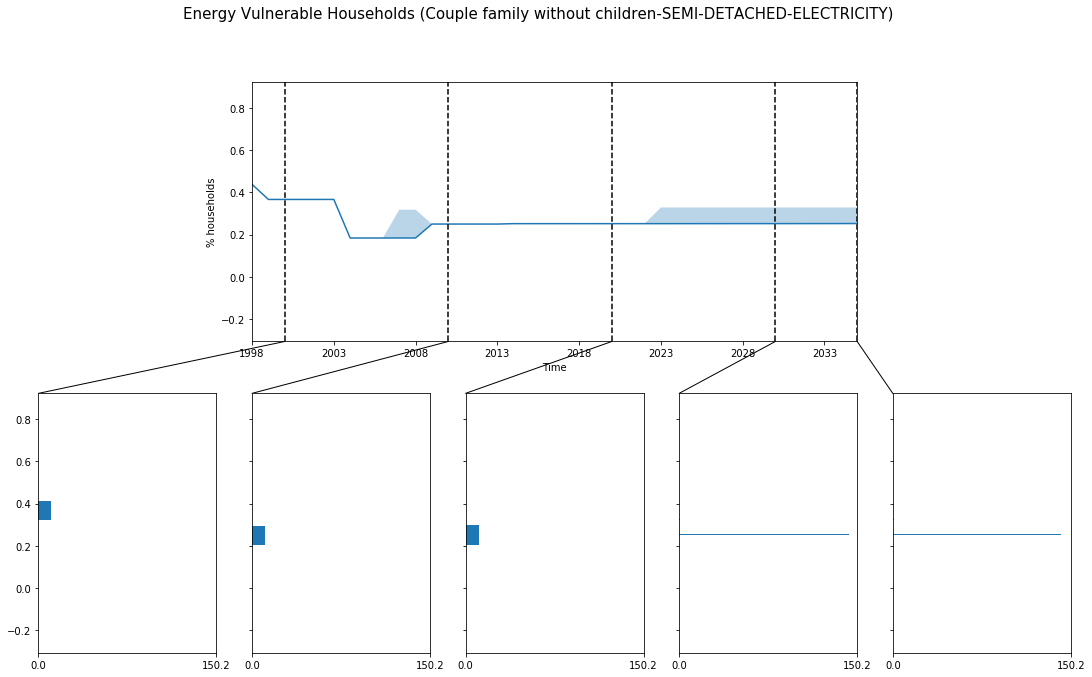

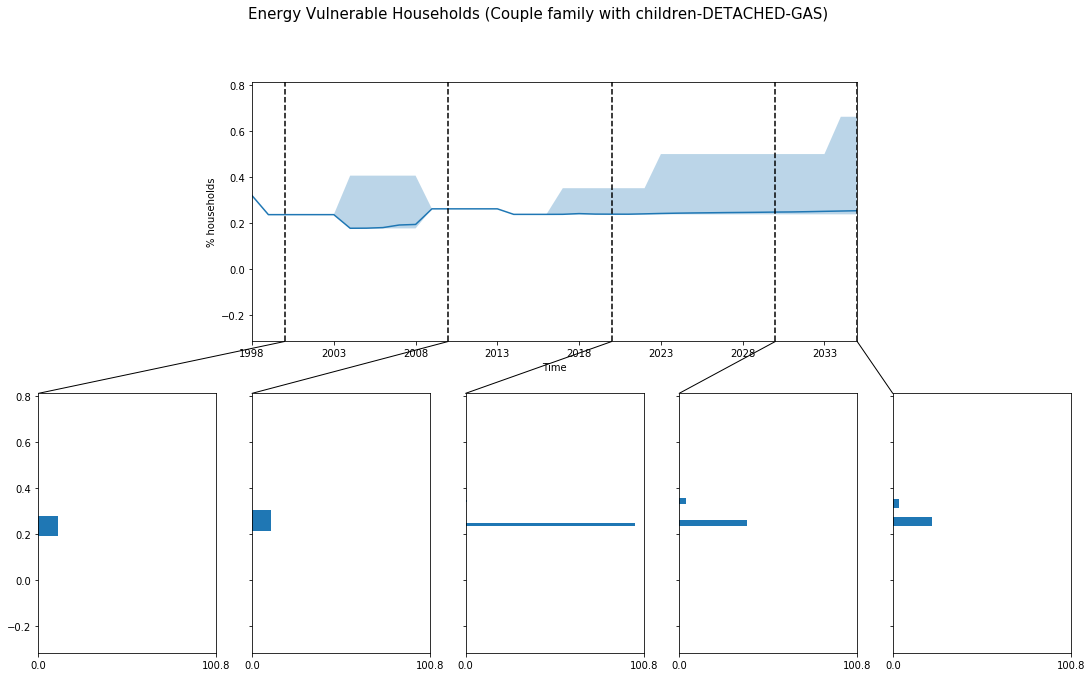

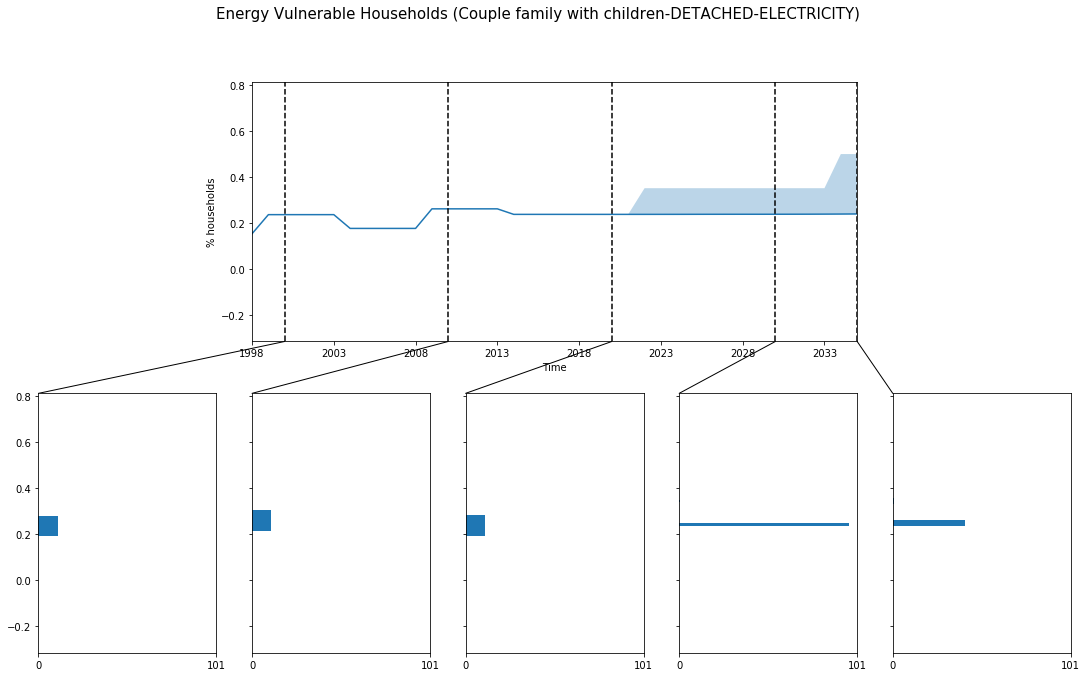

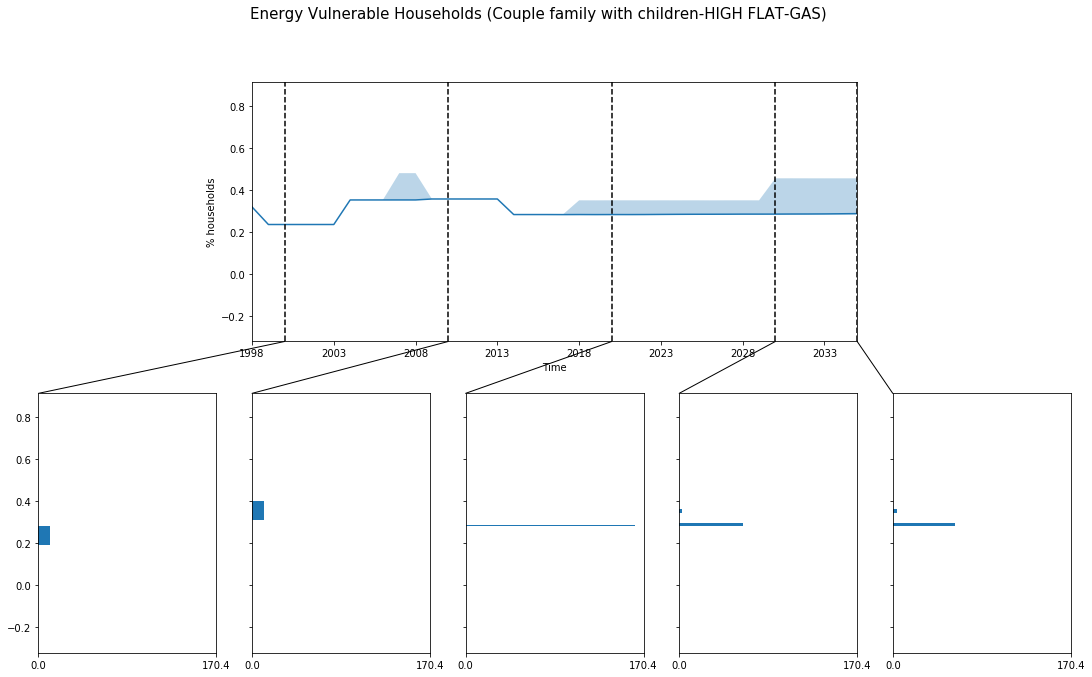

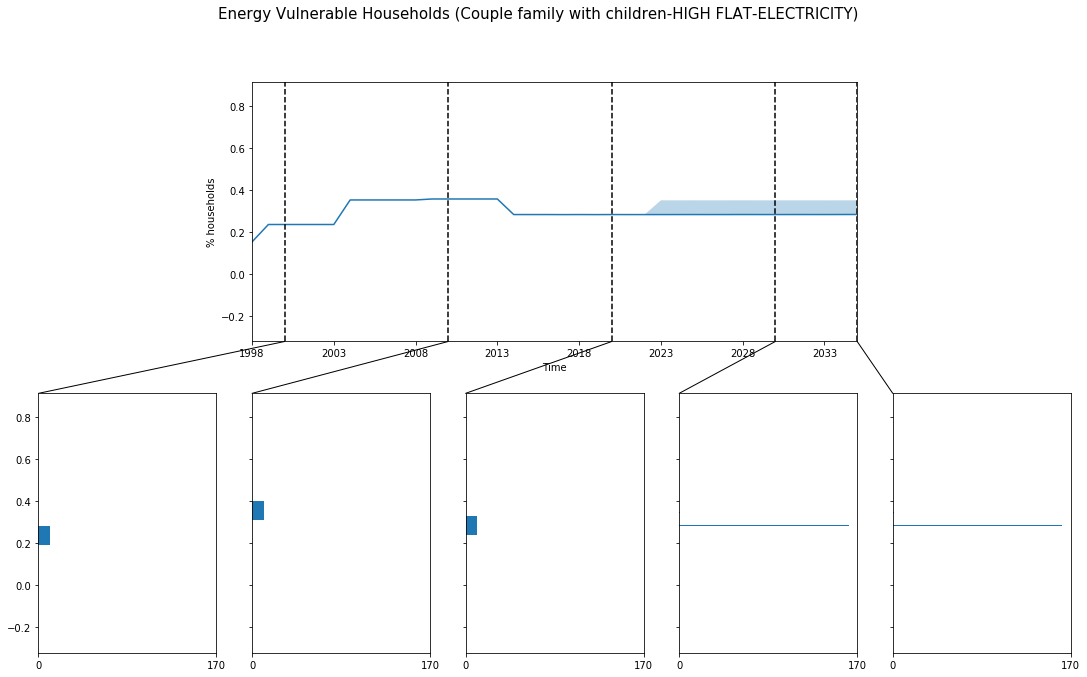

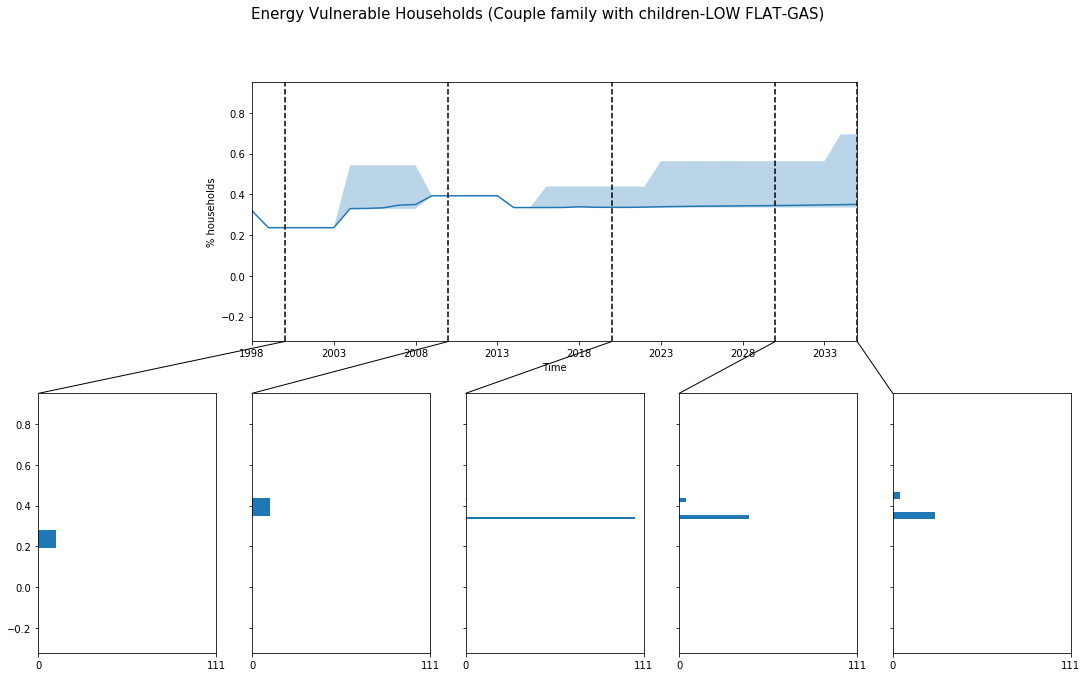

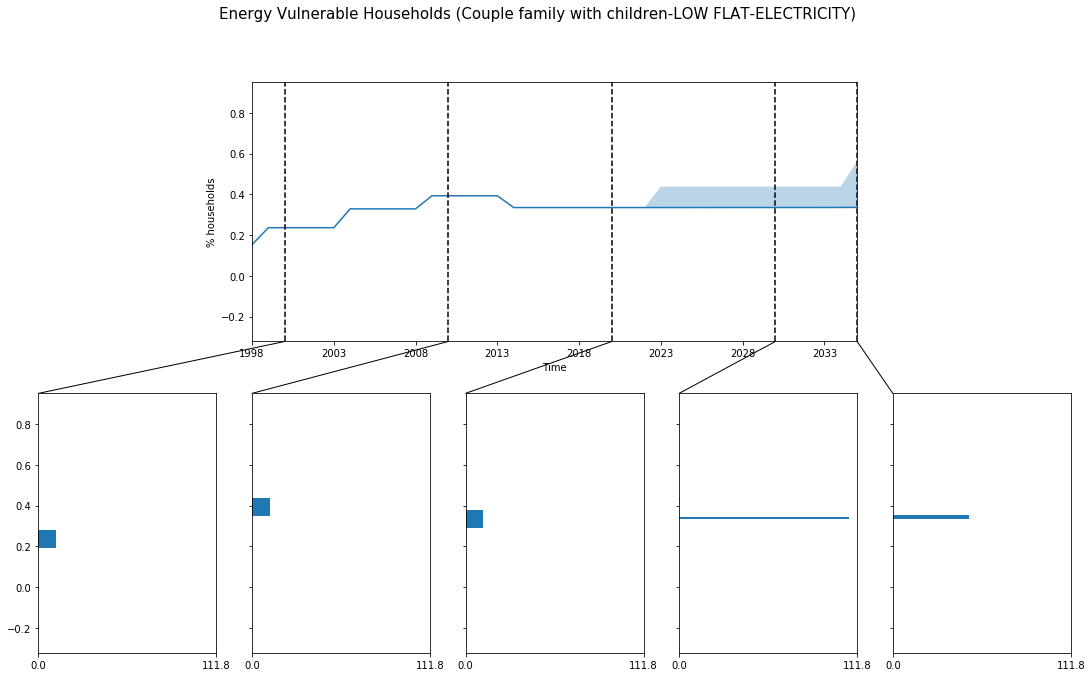

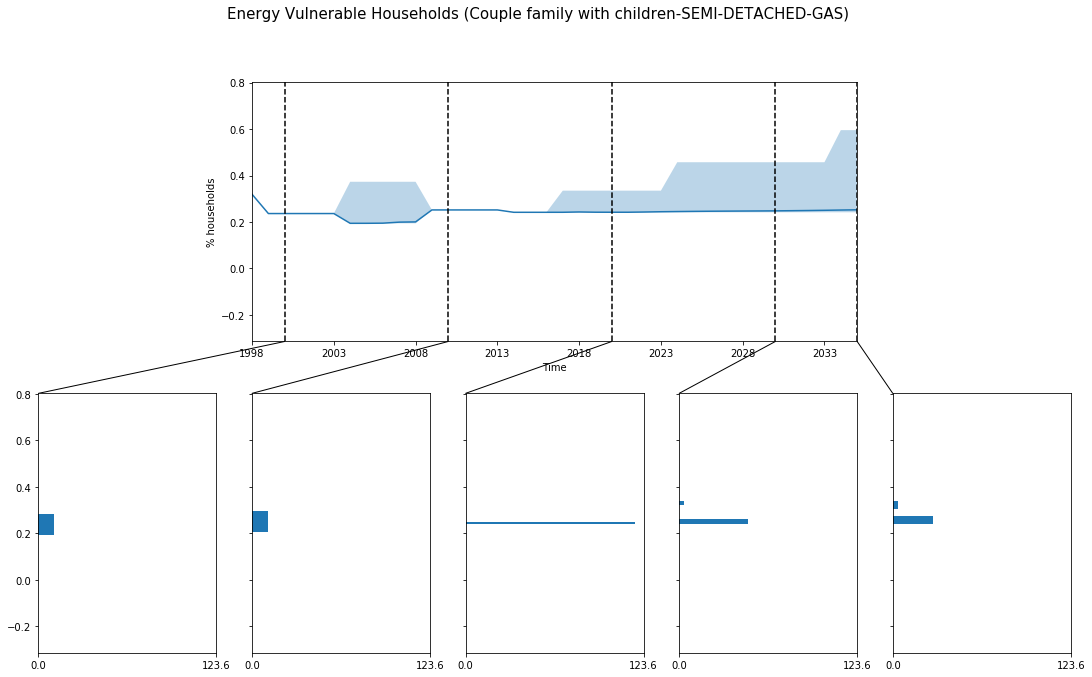

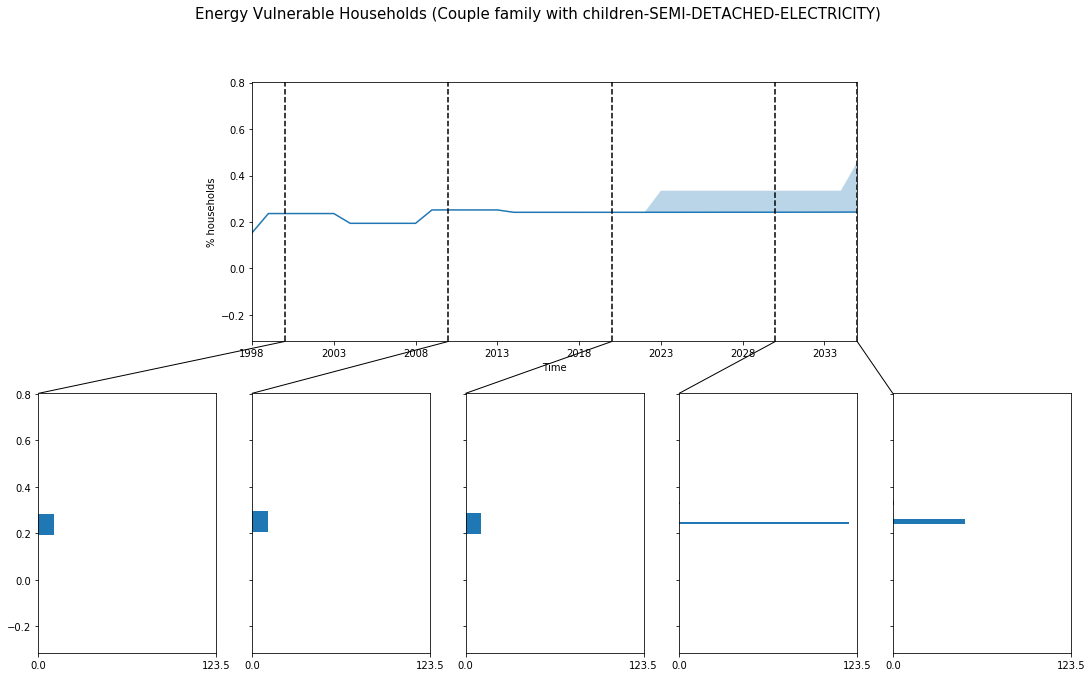

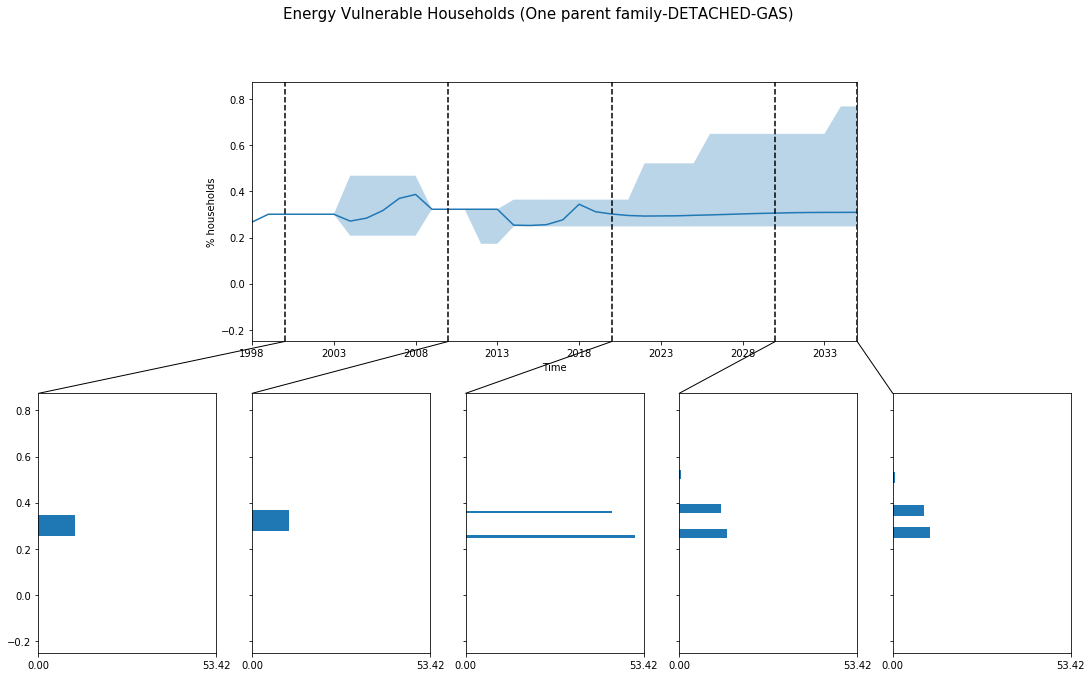

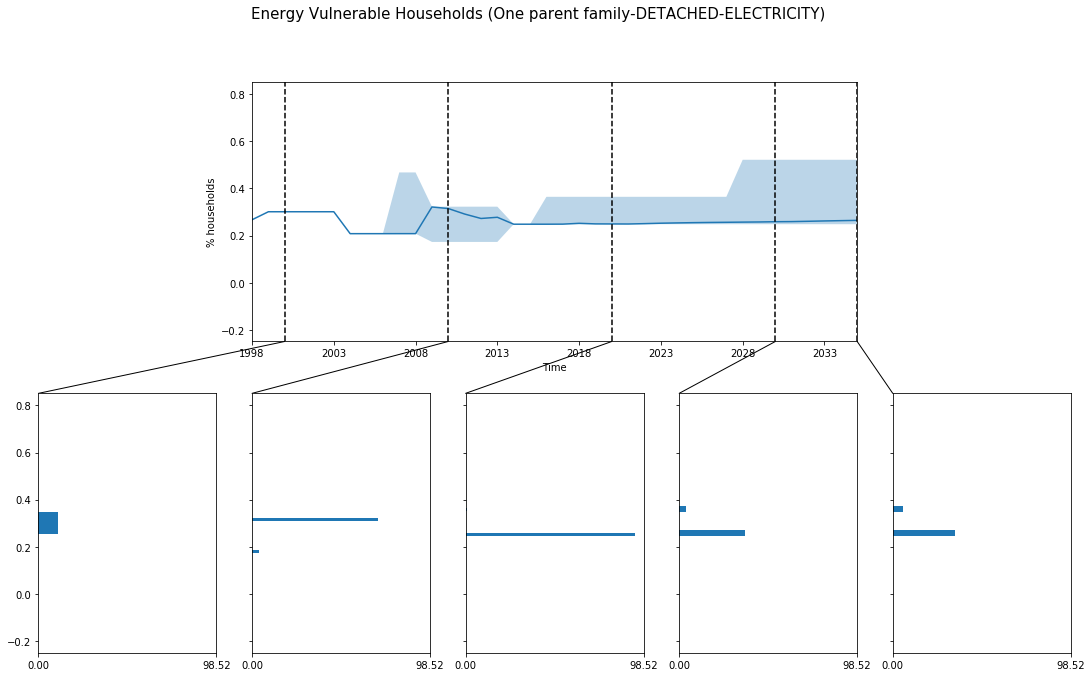

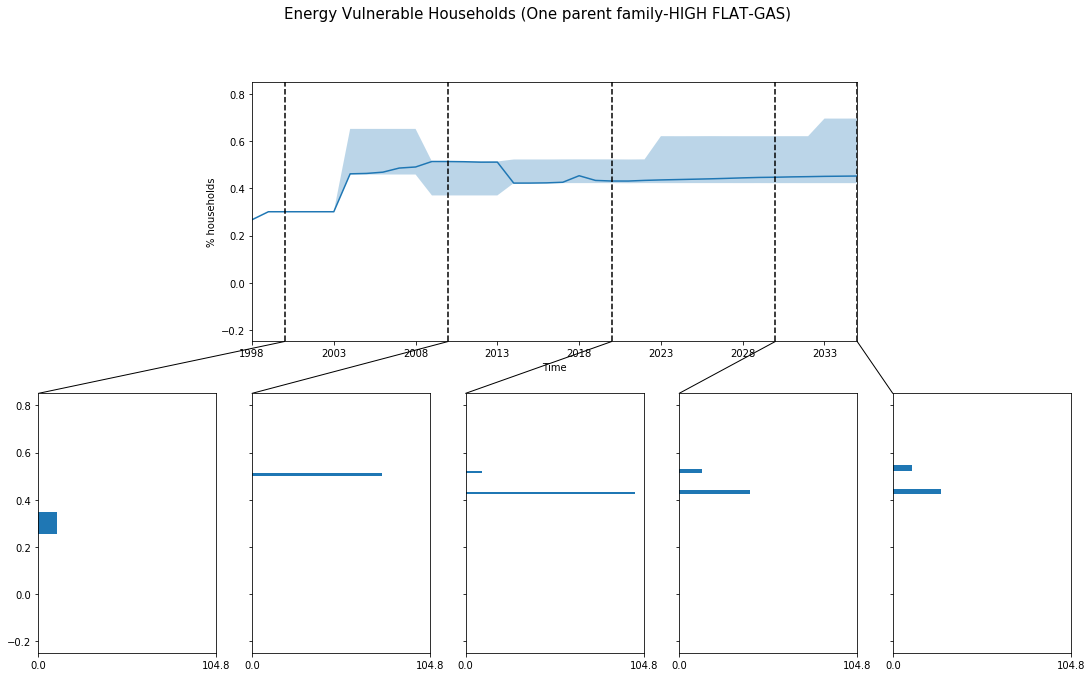

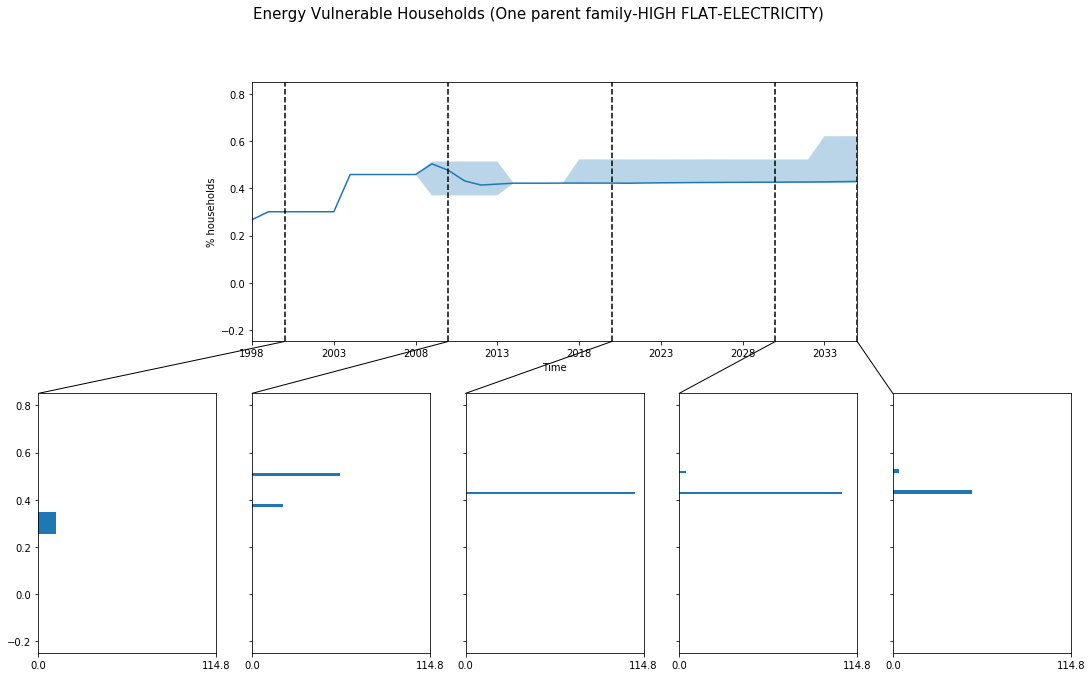

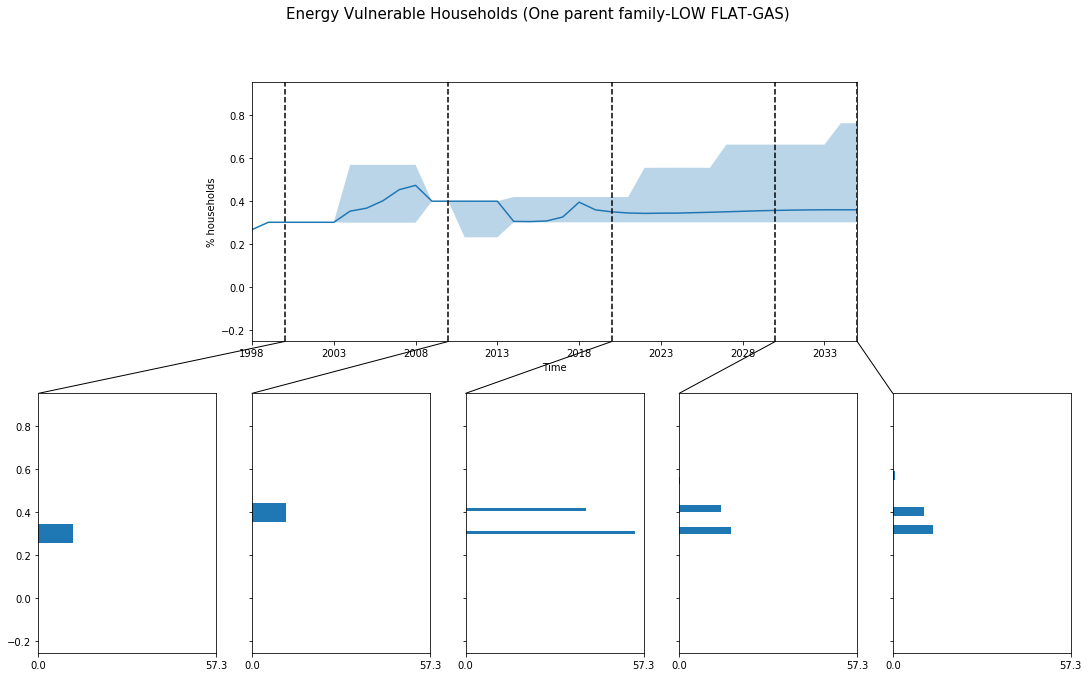

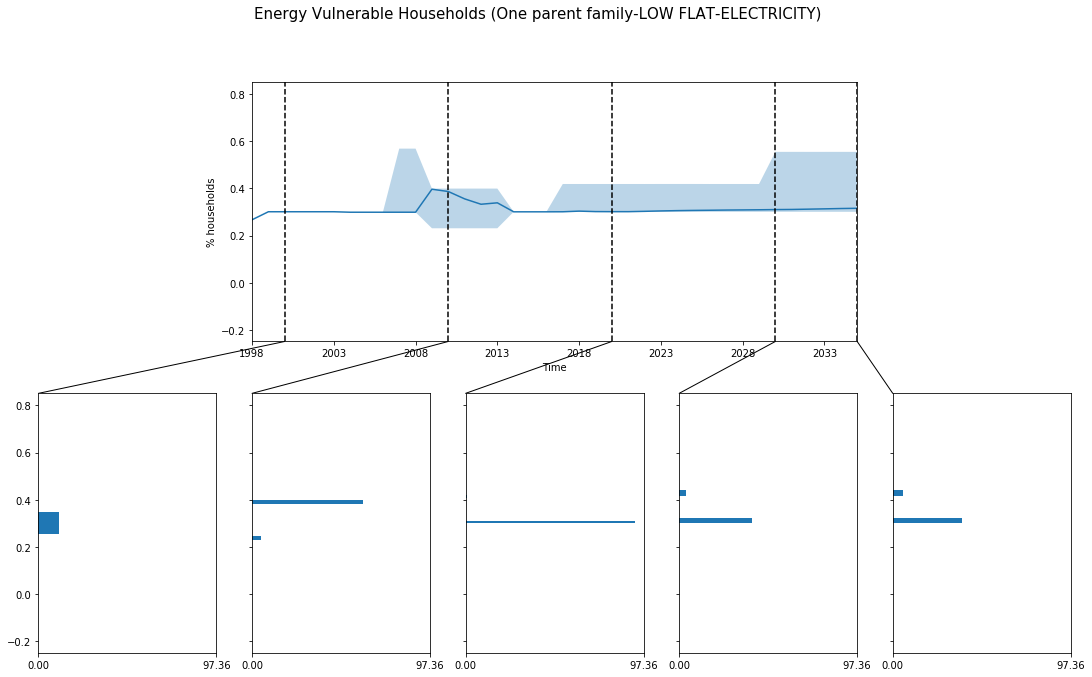

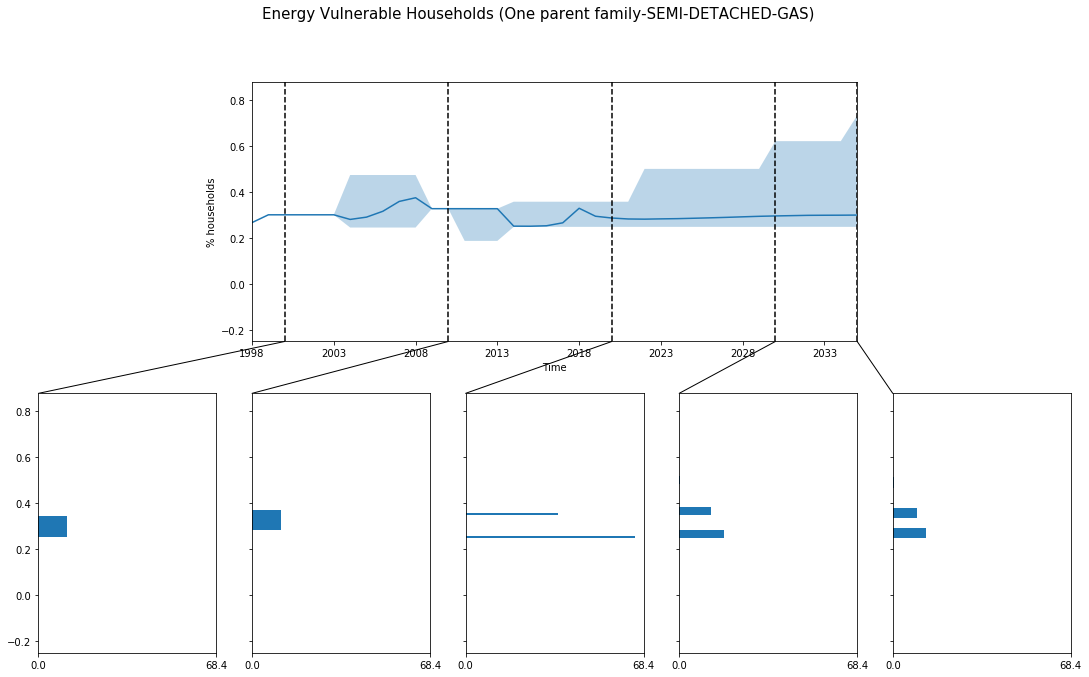

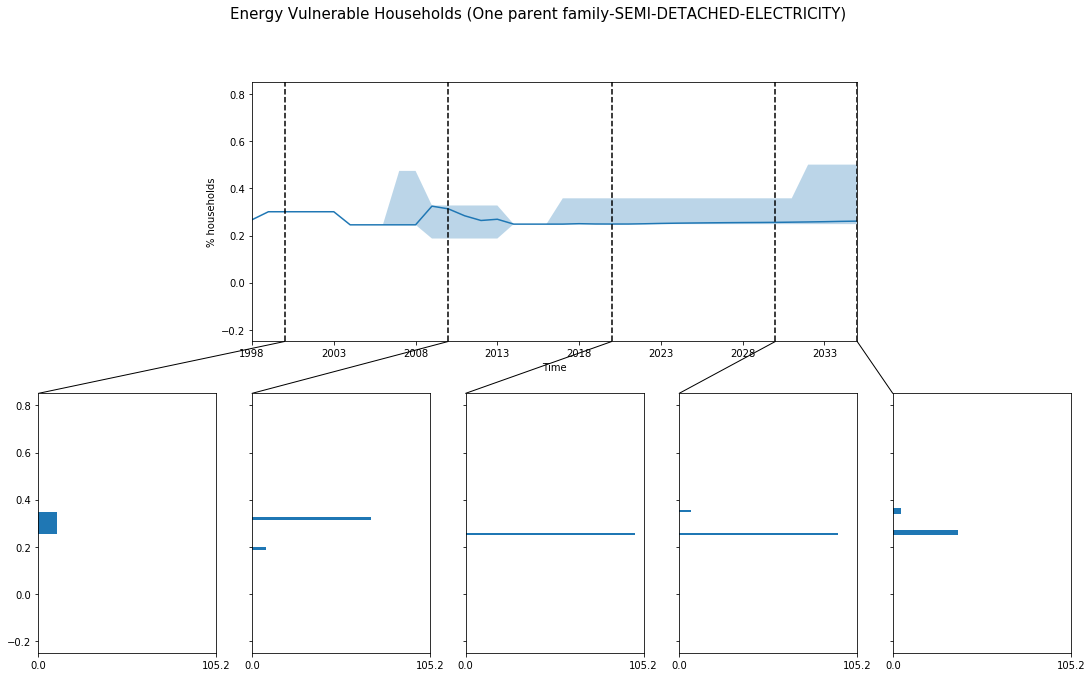

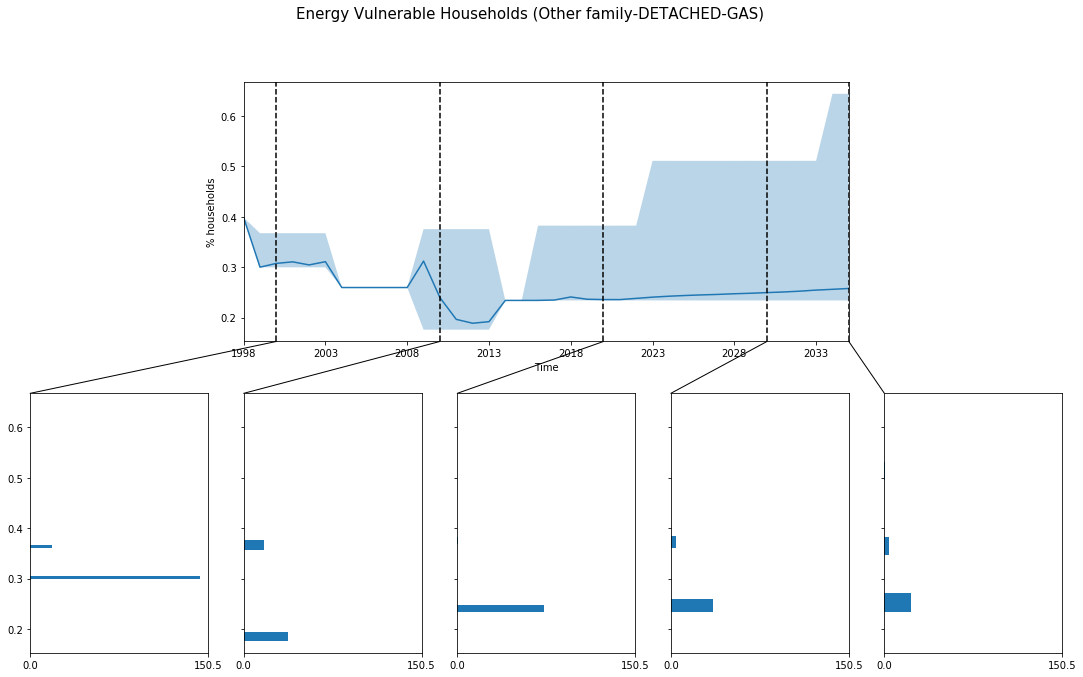

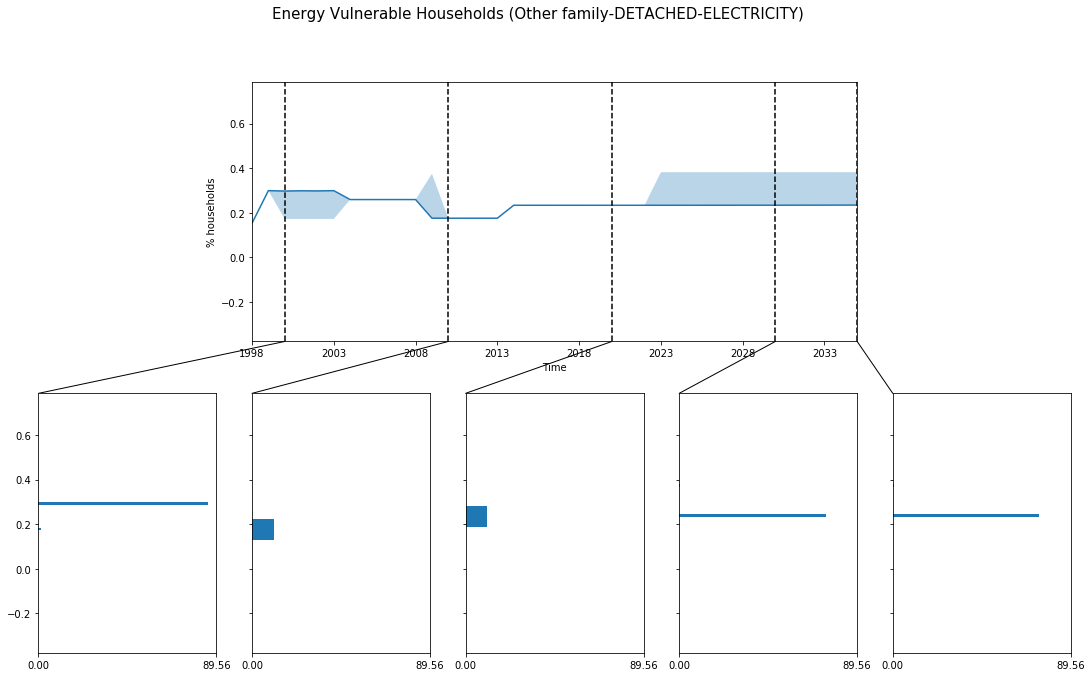

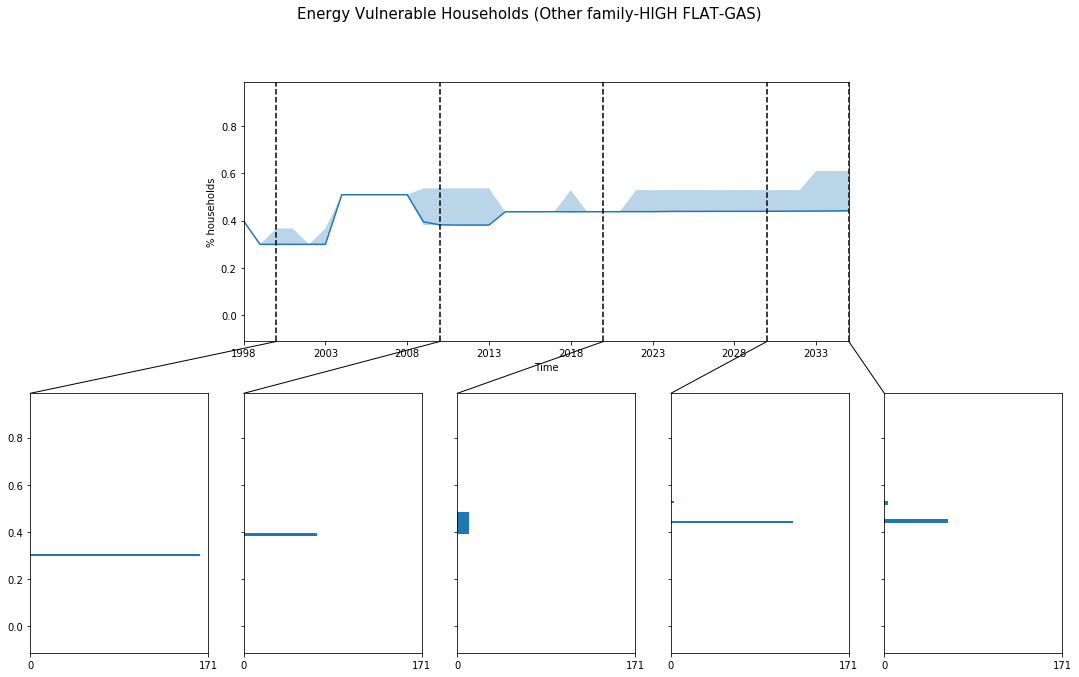

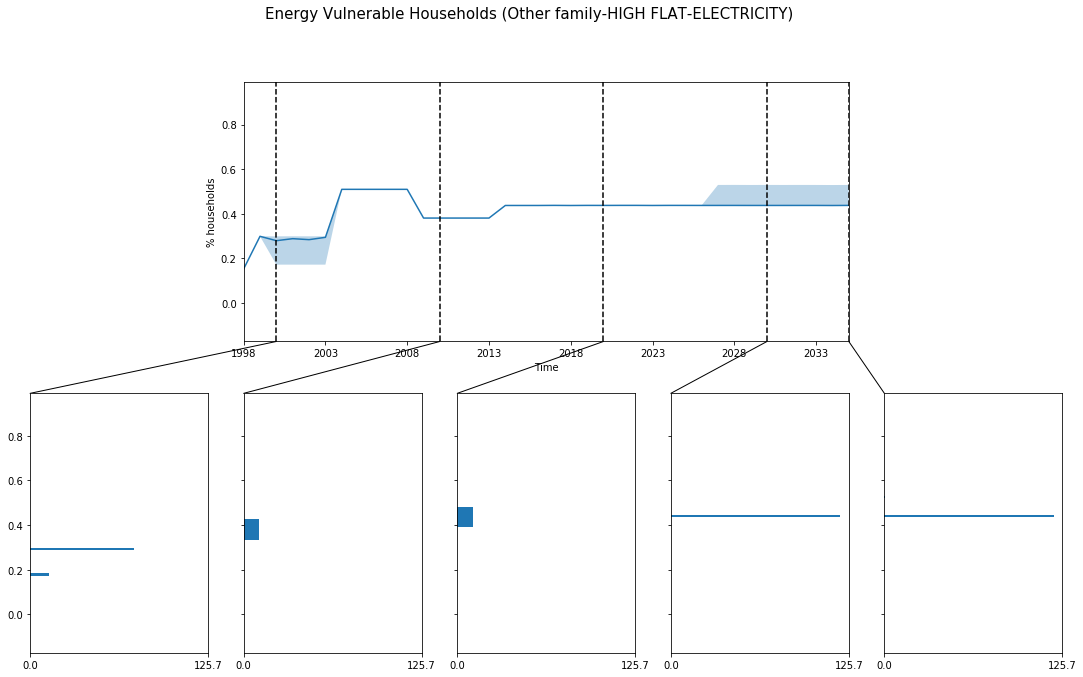

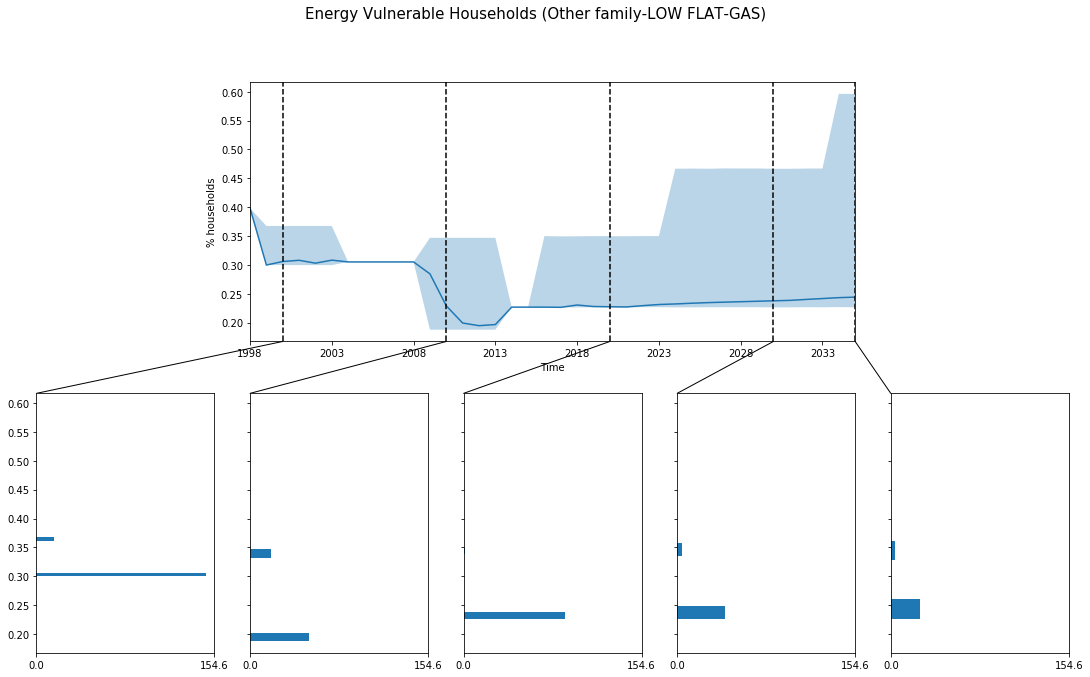

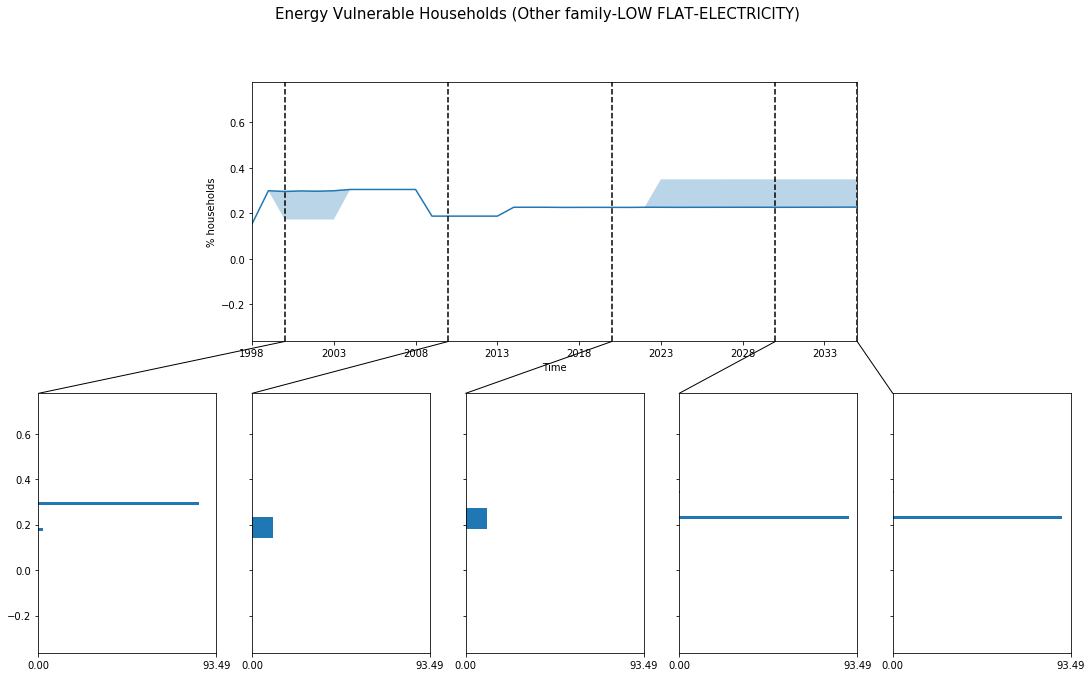

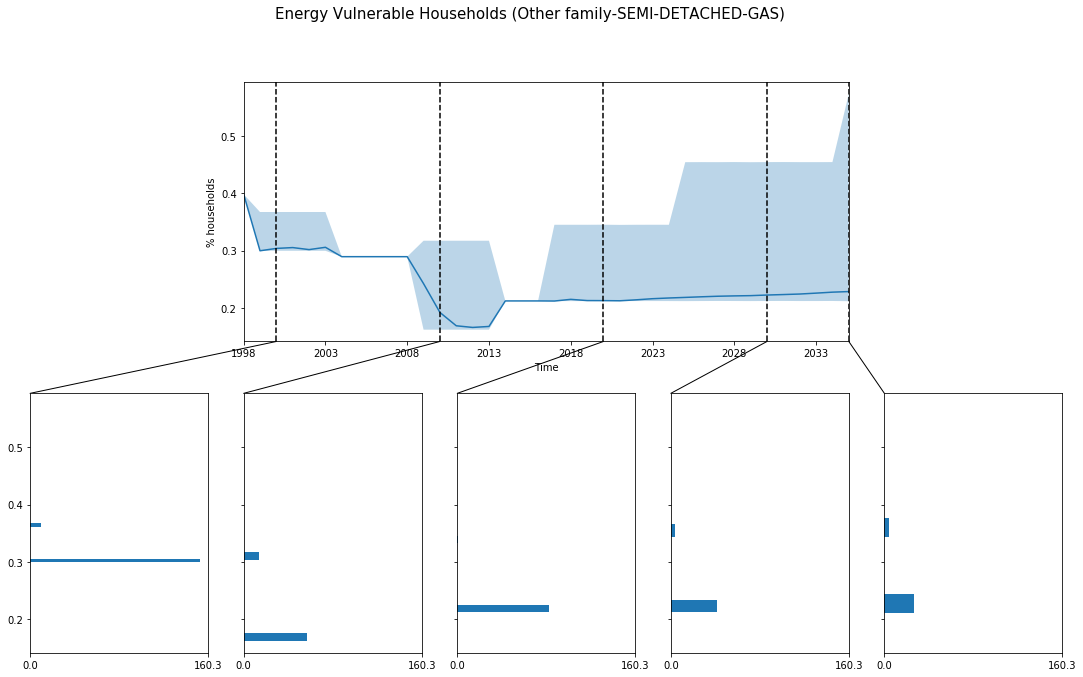

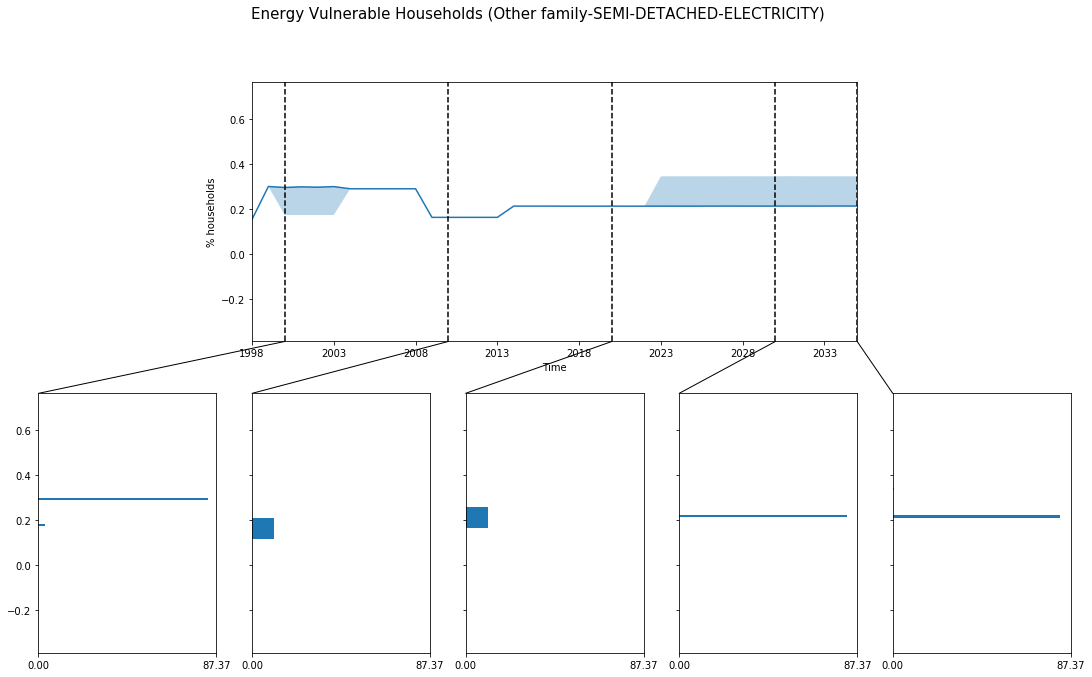

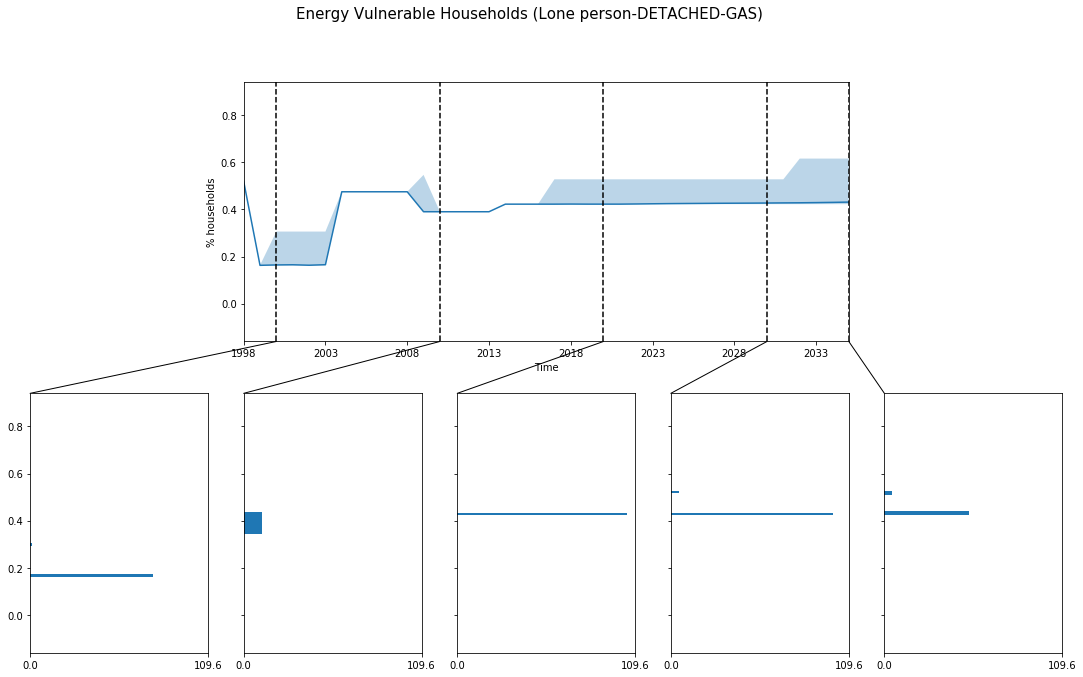

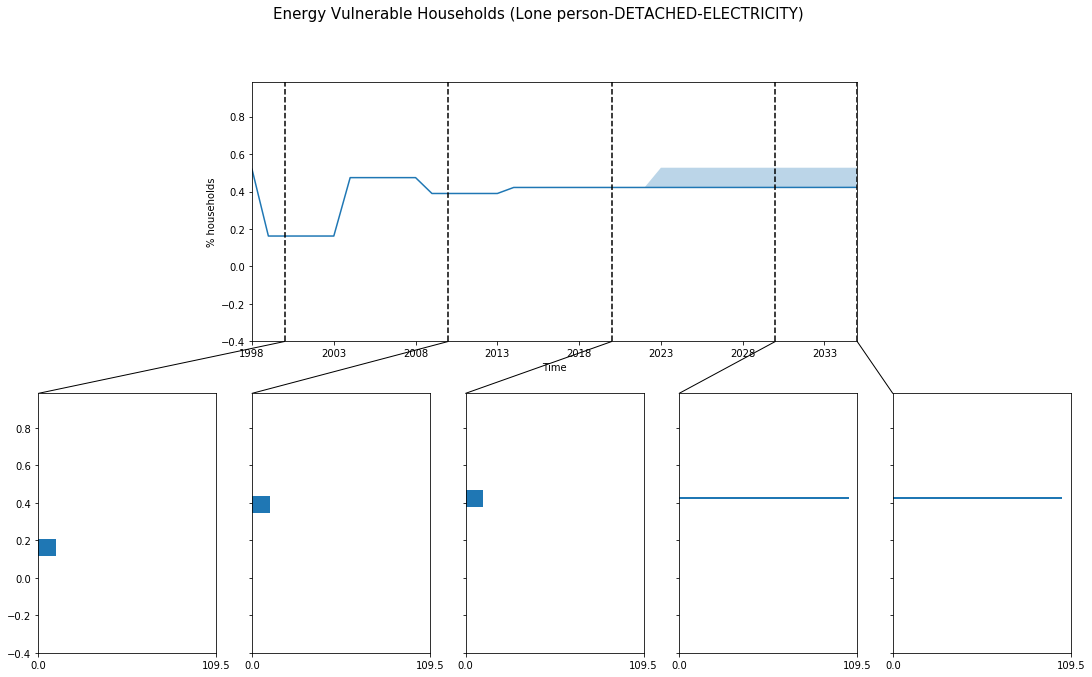

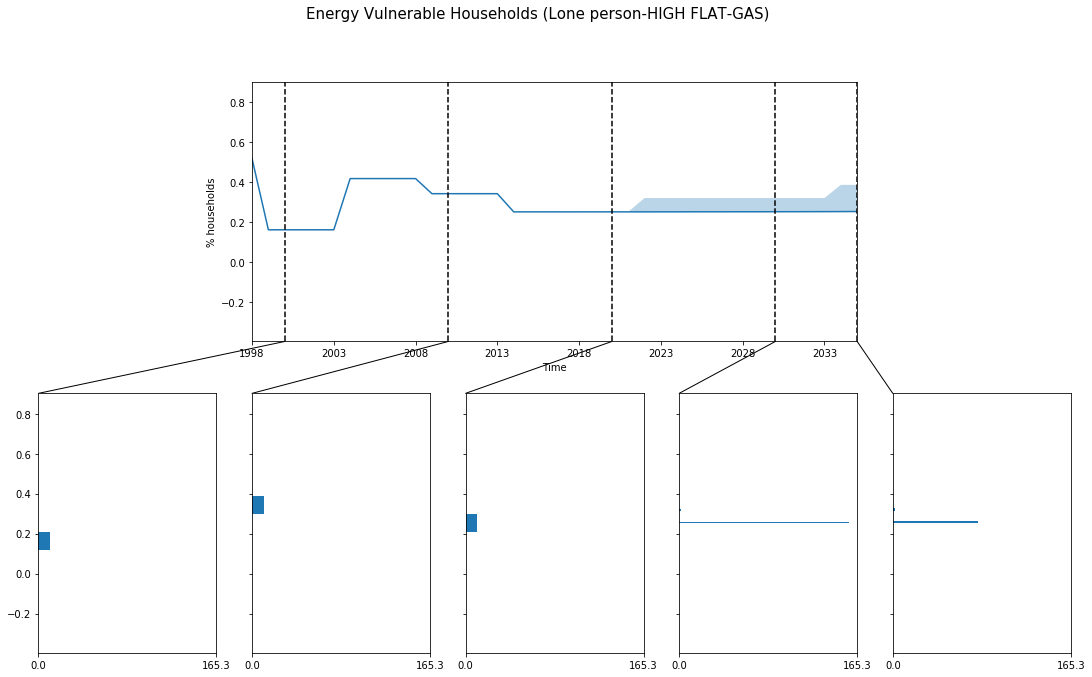

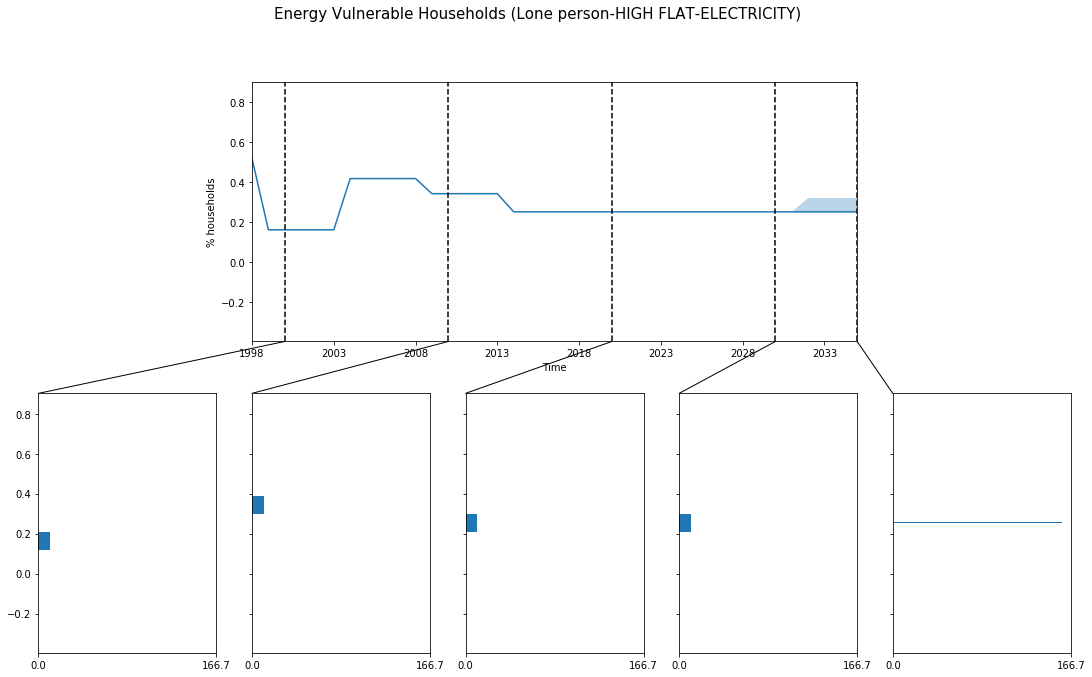

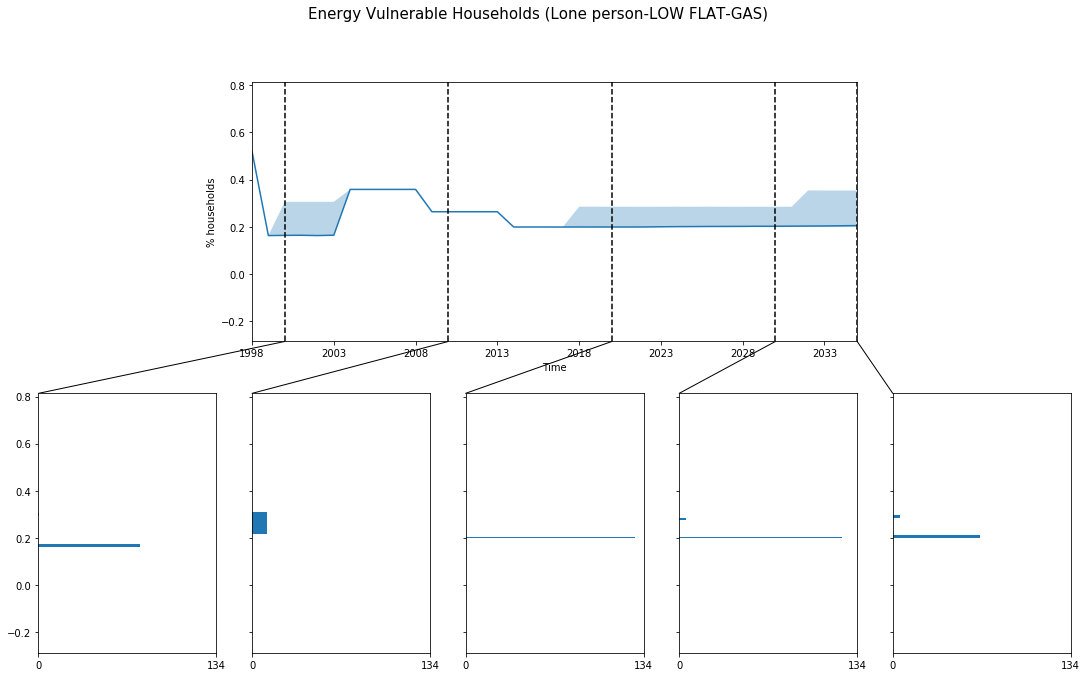

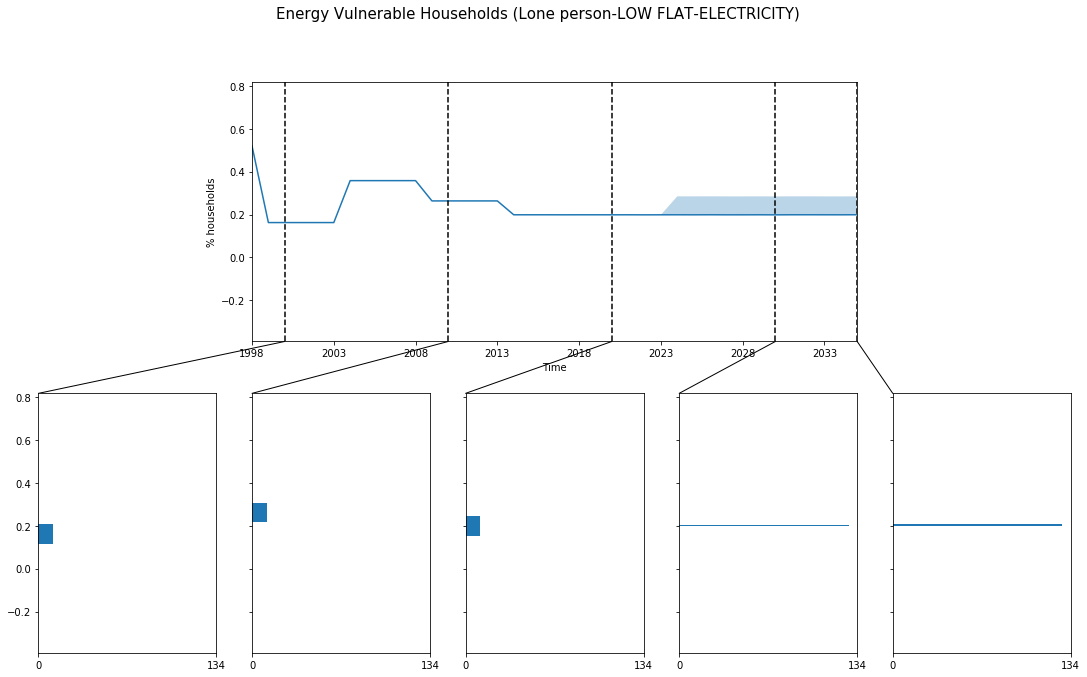

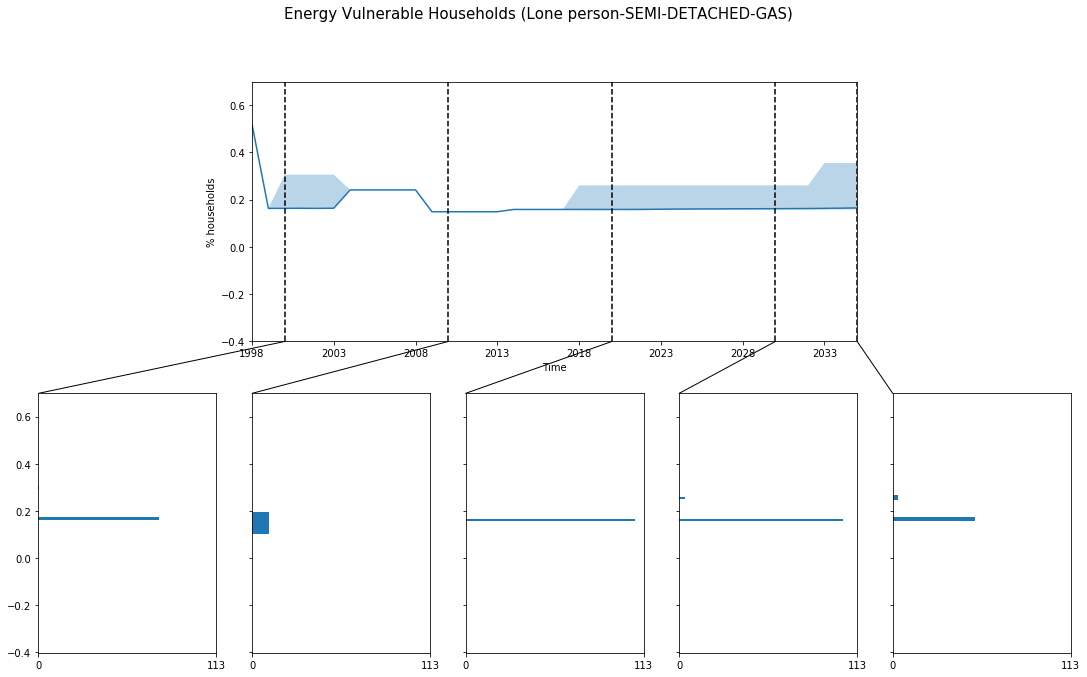

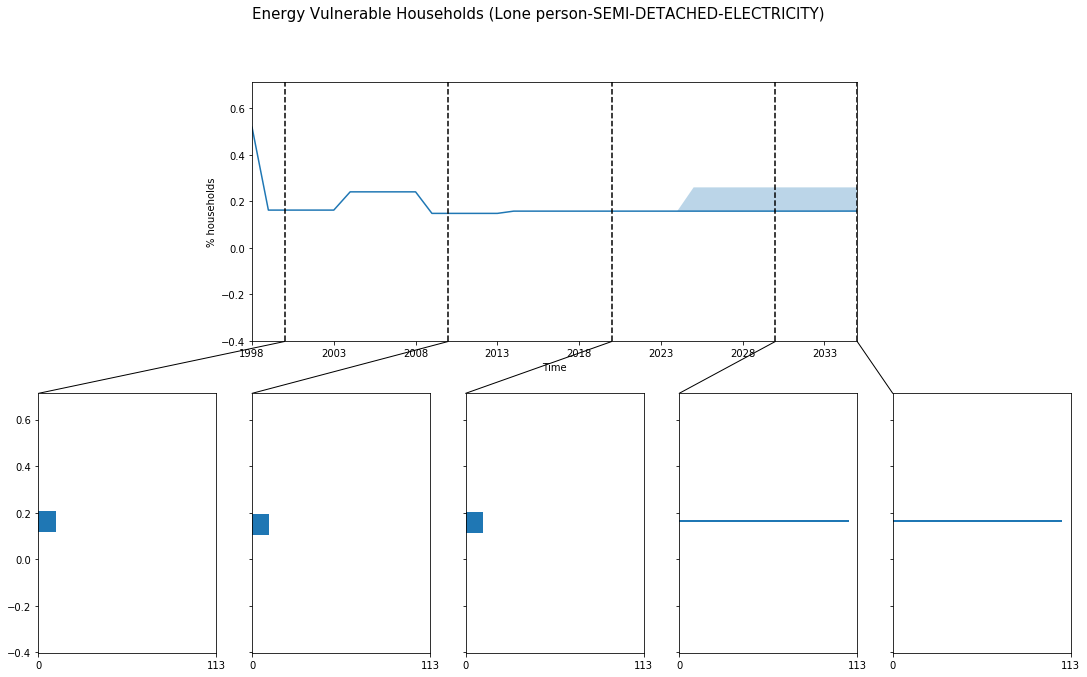

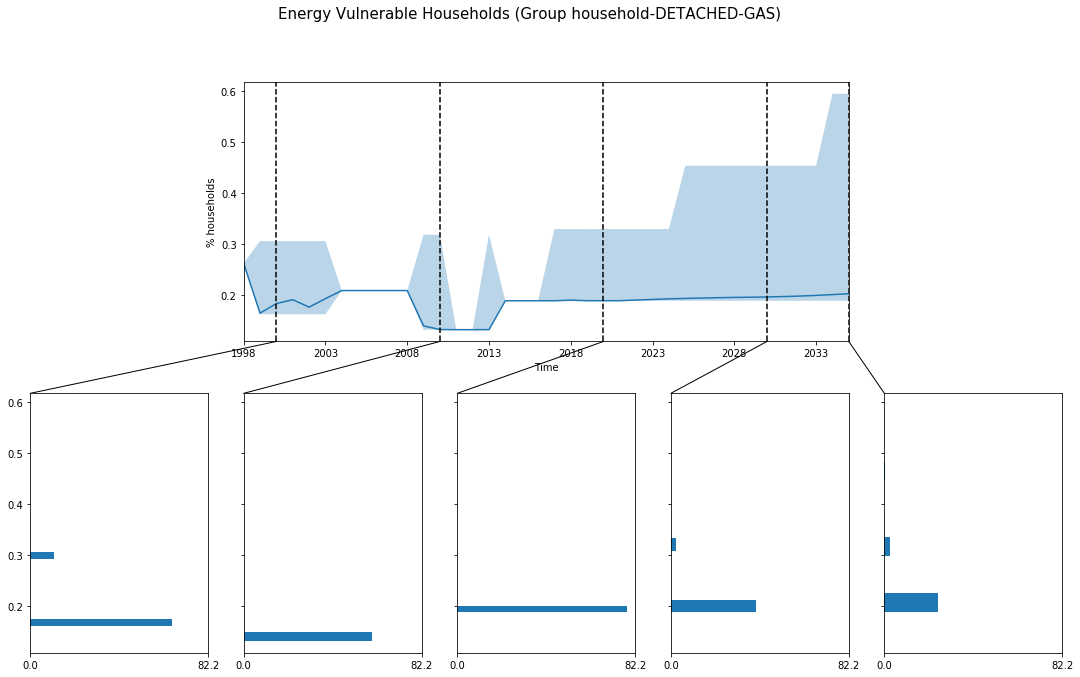

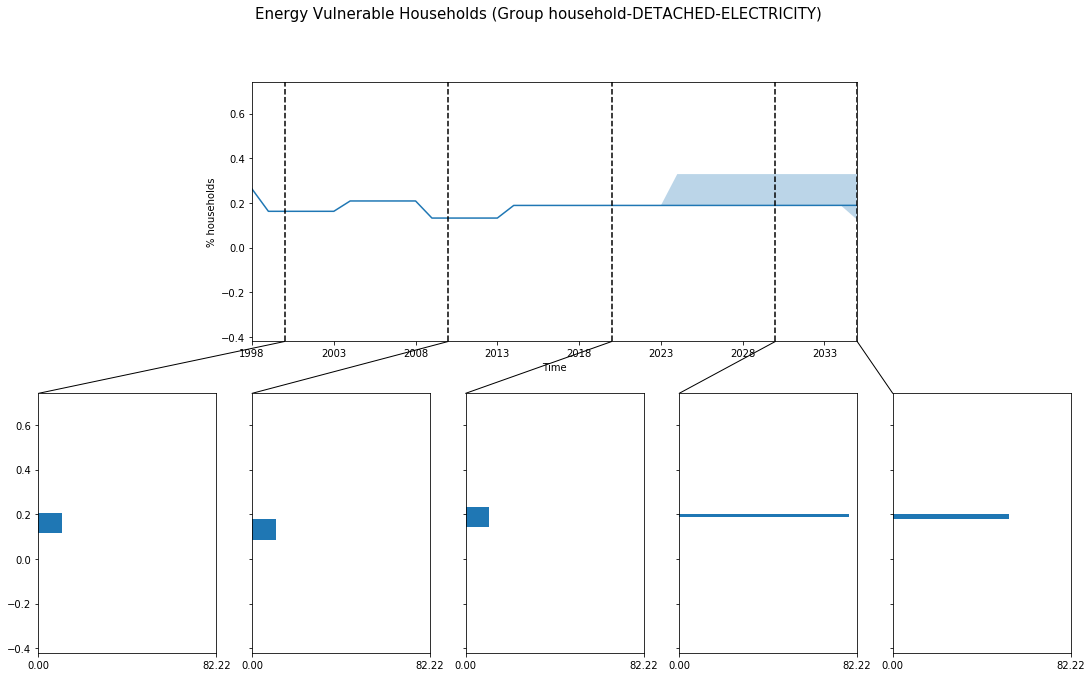

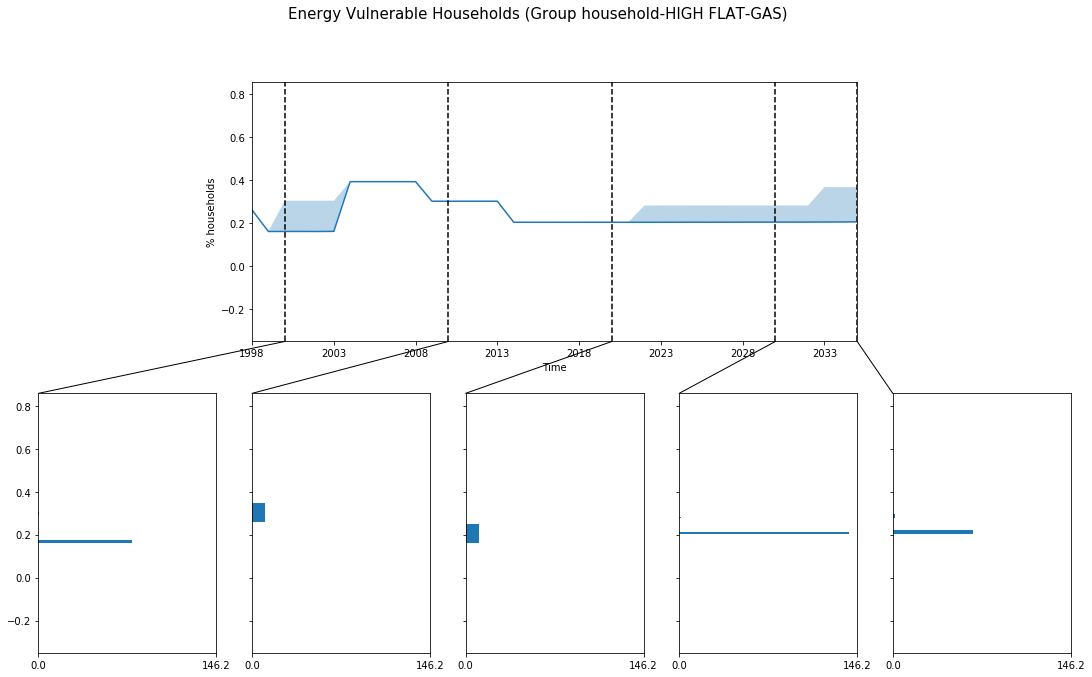

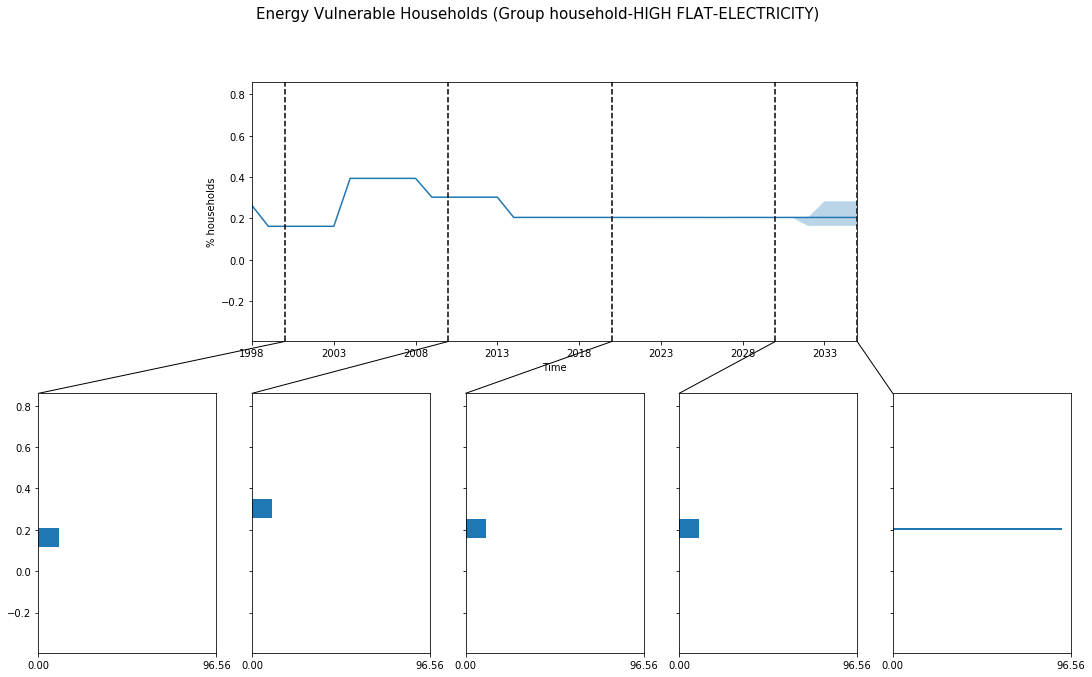

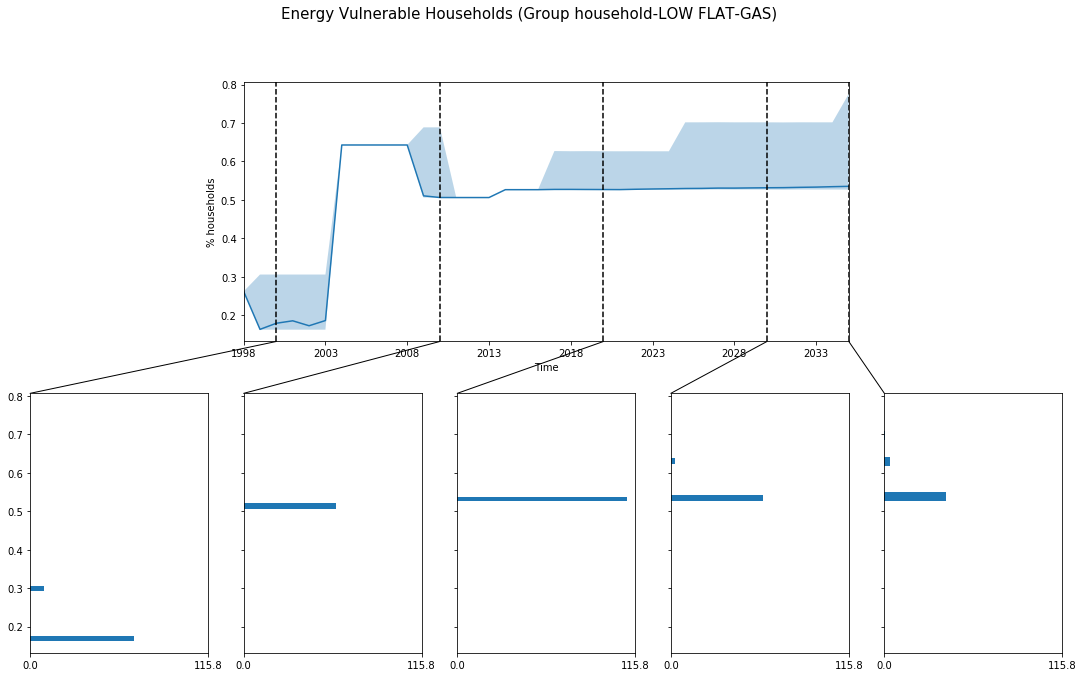

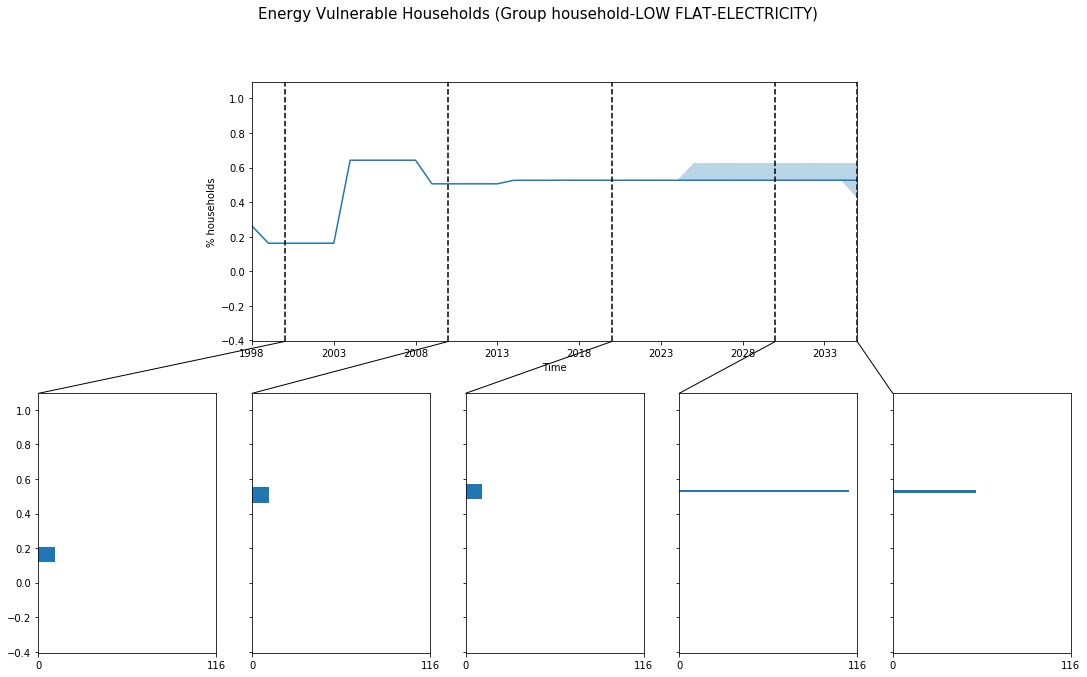

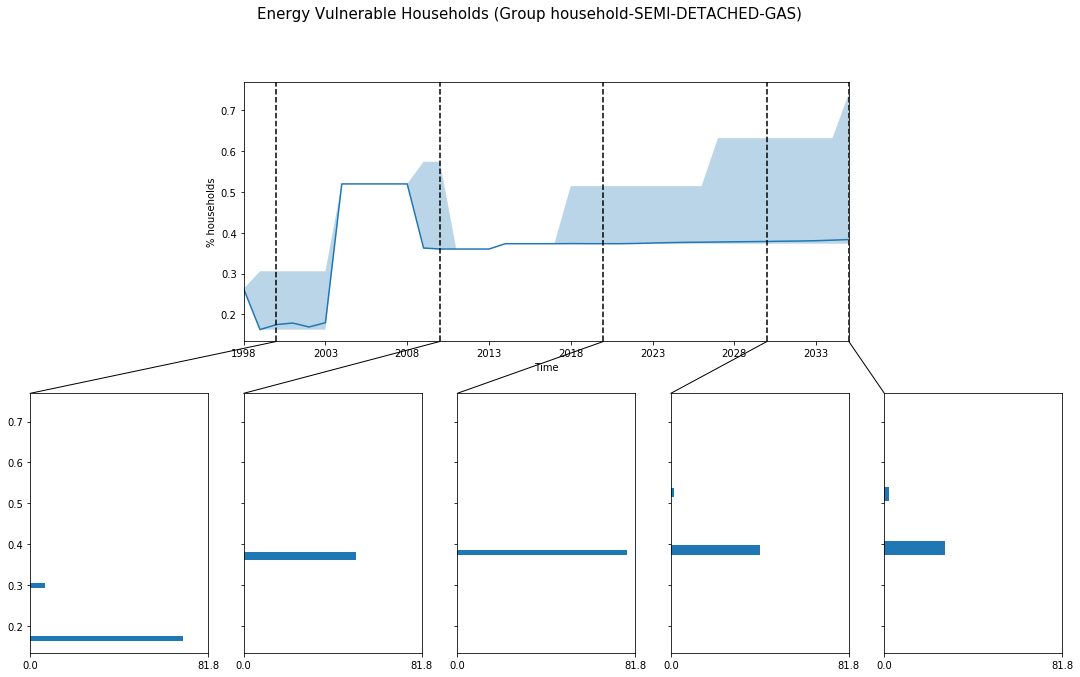

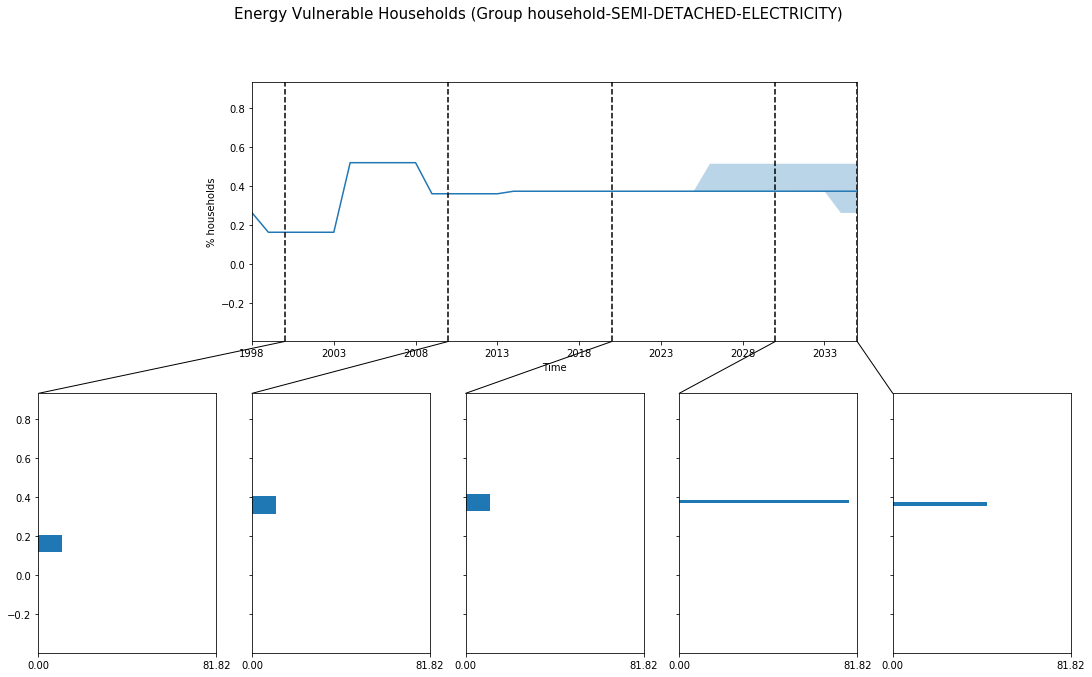

In [308]:
from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density 
ooi = 'Energy Vulnerable Households'

outcomes[ooi] = energy_vulnerable_df_total.values

fig, ax_env = multiple_densities(experiments, outcomes, outcomes_to_show = ooi,
                                 points_in_time=[2000-startYear,2010-startYear,2020-startYear,2030-startYear,2035-startYear], 
                                 density = Density.HIST, grouping_specifiers=None , titles={ooi}, ylabels={ooi: "% households"}, legend=True,
                                 fill=True, plot_type=PlotType.ENVELOPE)

#Change x labels to years
ax_env[ooi]['main plot'].set_xticklabels(simulationYears[range(0,len(simulationYears),5)])

## Show labels
# labels = ax_env['F']['main plot'].get_xticklabels()
# for l in labels:
#     print (l.get_text)


fig[0].suptitle("{}".format(ooi), fontsize=15)
fig[0].set_size_inches(18.5, 10.5)

for o,d,f in profiles:
    ooi = 'Energy Vulnerable Households ({}-{}-{})'.format(o,d,f)
    outcomes[ooi] = energy_vulnerable_df[(o,d,f)].values
    #print("('{}','{}','{}')".format(o,d,f))
    
    fig, ax_env = multiple_densities(experiments, outcomes, outcomes_to_show = ooi,
                                     points_in_time=[2000-startYear,2010-startYear,2020-startYear,2030-startYear,2035-startYear], 
                                     density = Density.HIST, grouping_specifiers=None , titles={ooi}, ylabels={ooi: "% households"}, legend=True,
                                     fill=True, plot_type=PlotType.ENVELOPE)

    #Change x labels to years
    ax_env[ooi]['main plot'].set_xticklabels(simulationYears[range(0,len(simulationYears),5)])

    ## Show labels
    # labels = ax_env['F']['main plot'].get_xticklabels()
    # for l in labels:
    #     print (l.get_text)
    

    fig[0].suptitle("{}".format(ooi), fontsize=15)
    fig[0].set_size_inches(18.5, 10.5)
    

## Heatmap Energy Vulnerability per dwelling and household types

In [309]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
#%matplotlib inline

def plot_heatmap( data, title ):
    fig_dims = (9, 6)
    fig, ax = plt.subplots(figsize=fig_dims)
    ax.set_title(title)
    
    Index= occupancy_types
    Cols = dwelling_types
    df = DataFrame(data, index=Index, columns=Cols)

    sns.heatmap(df, annot=True, ax =ax)

    # https://github.com/matplotlib/matplotlib/issues/14751
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!


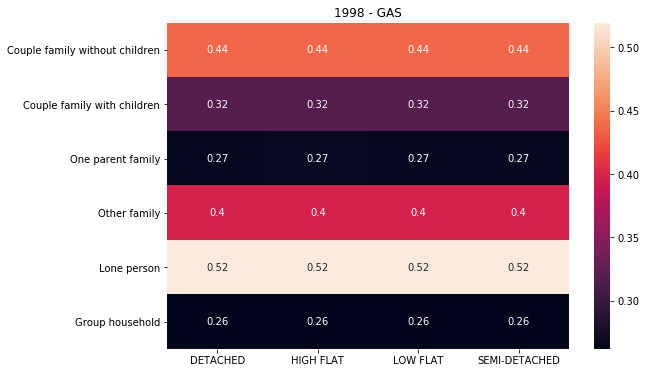

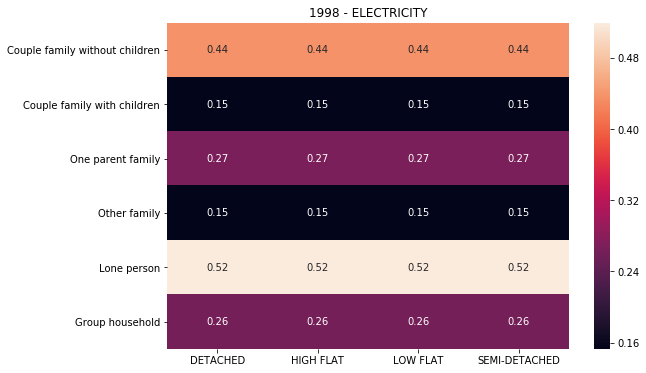

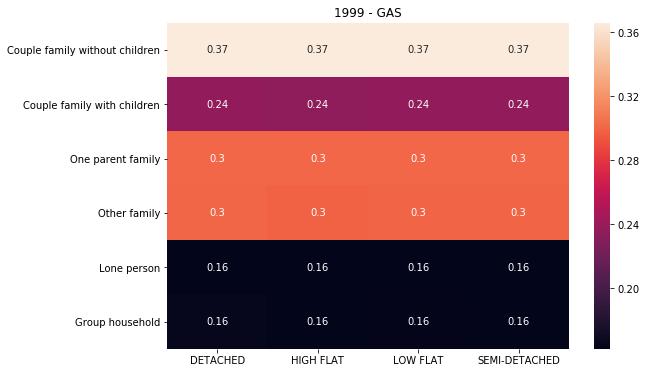

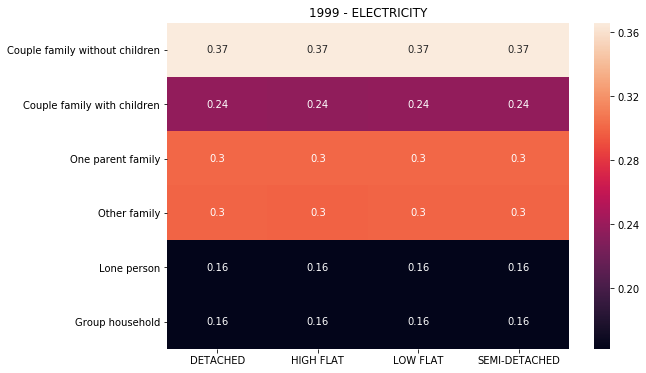

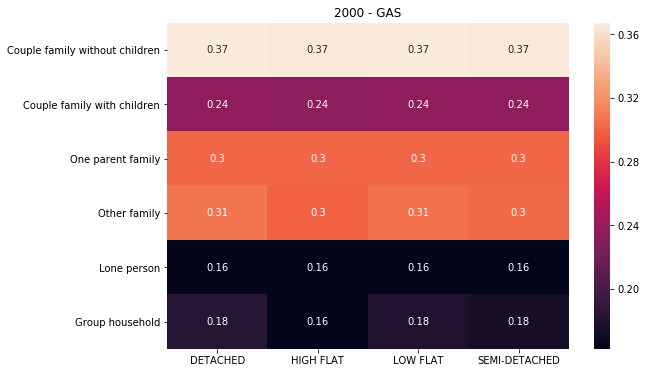

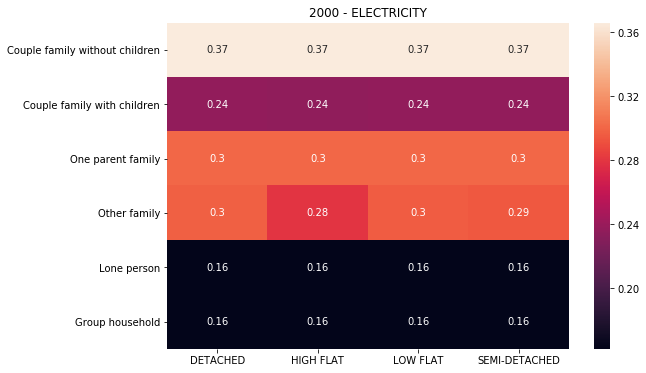

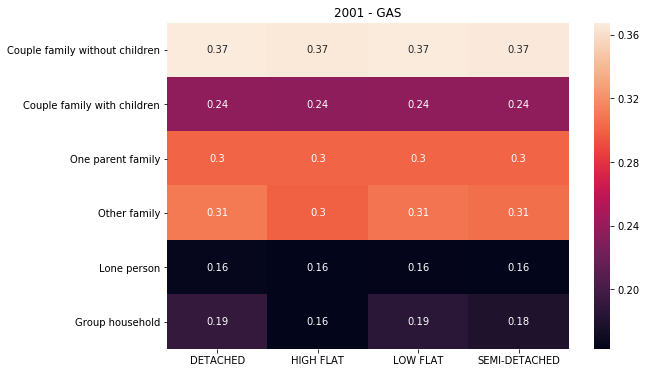

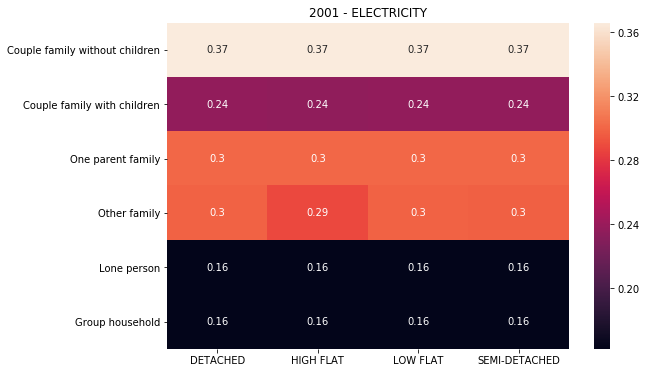

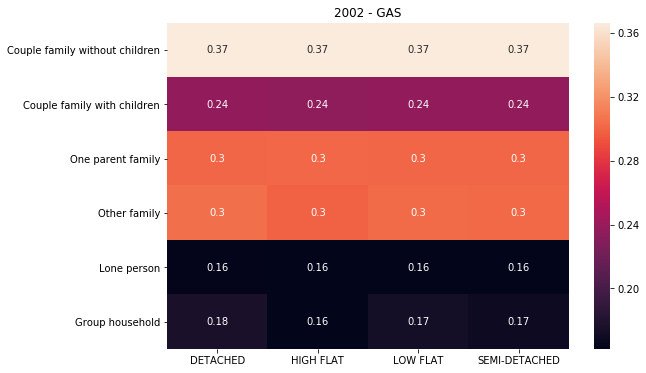

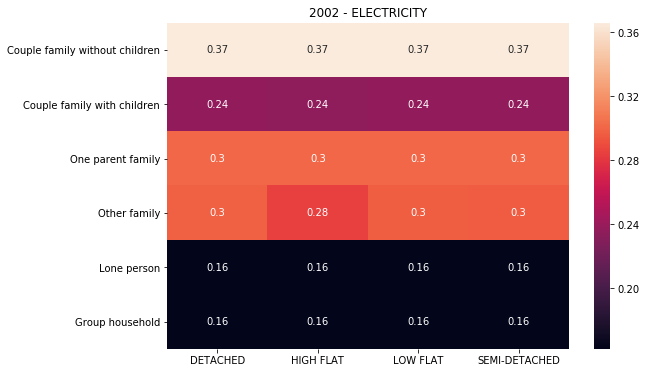

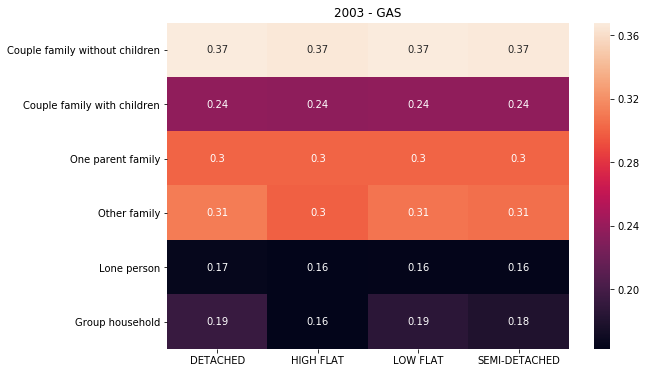

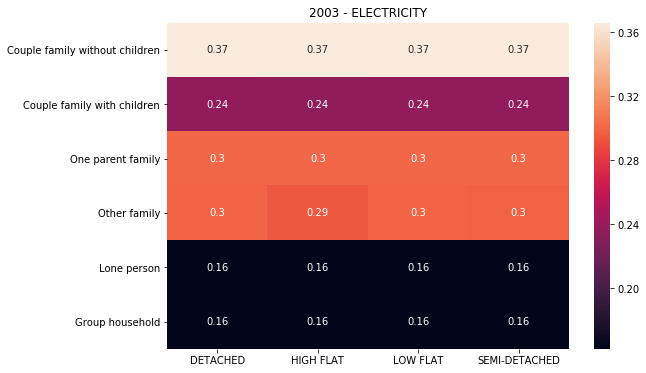

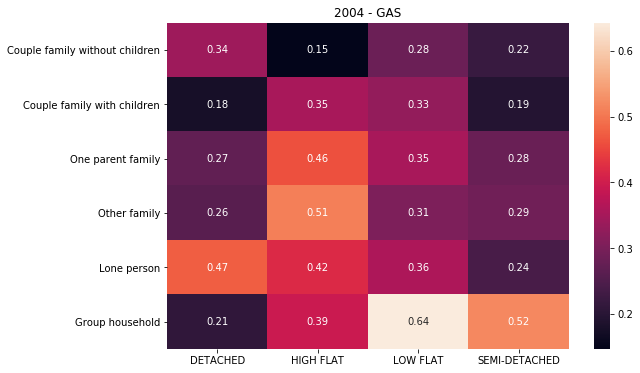

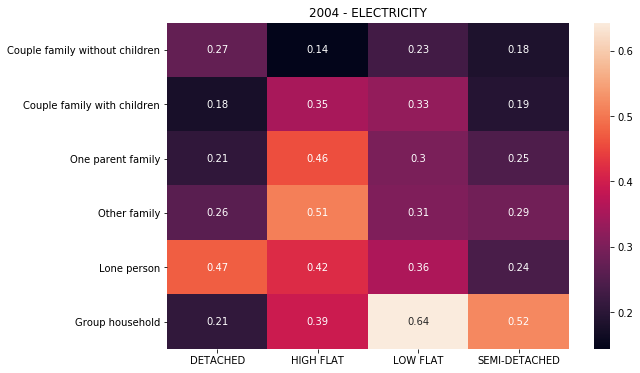

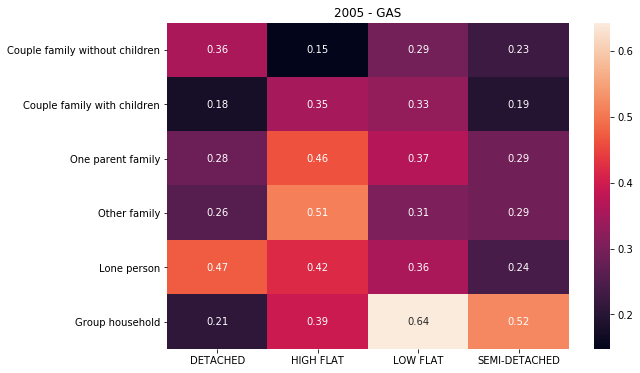

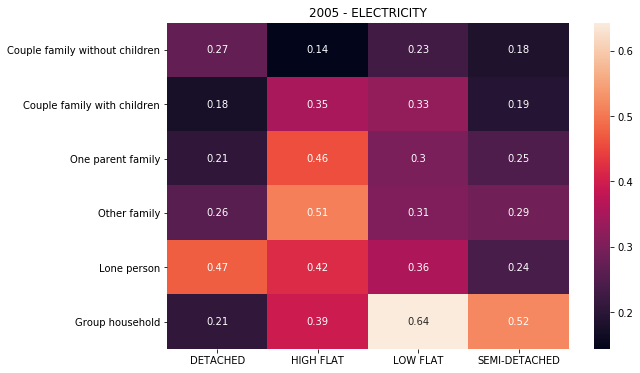

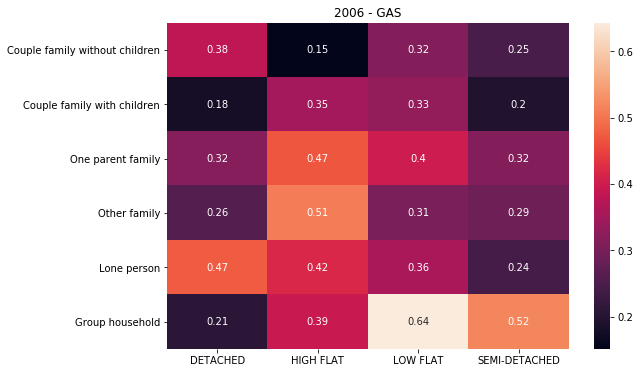

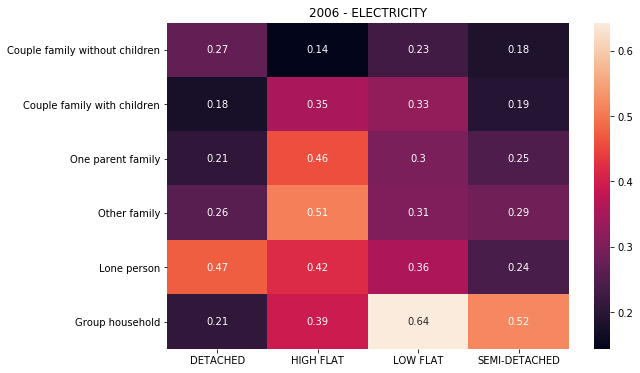

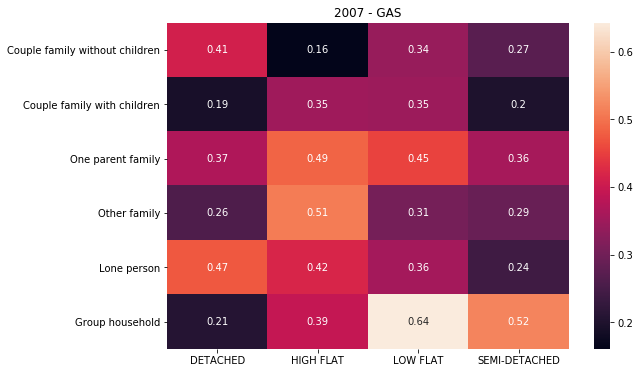

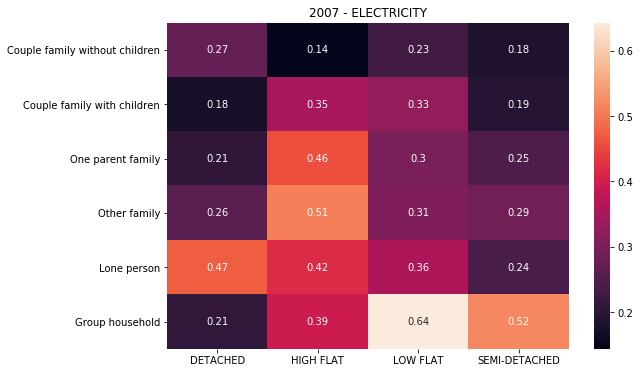

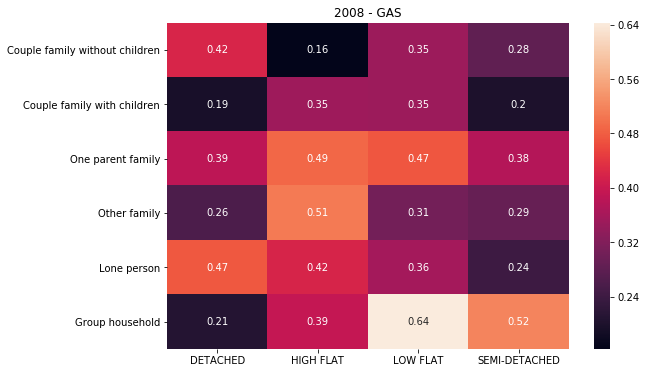

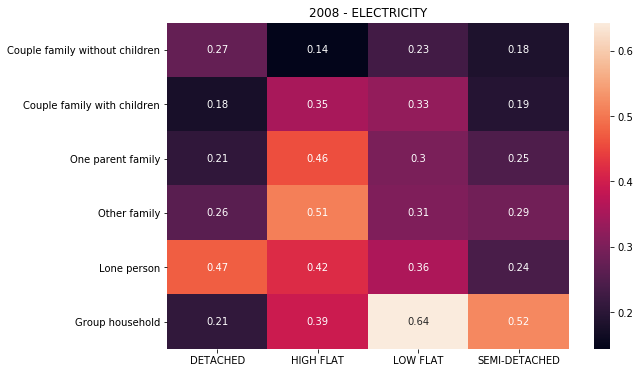

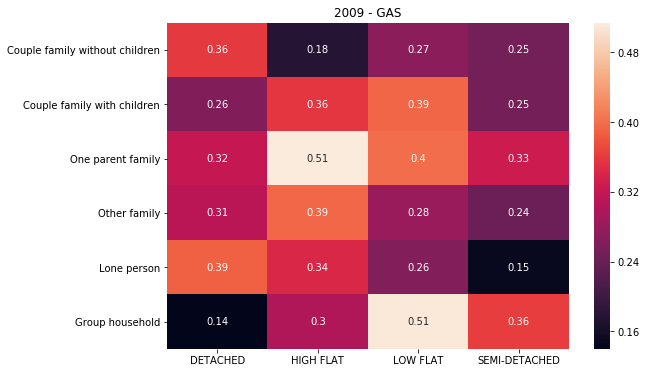

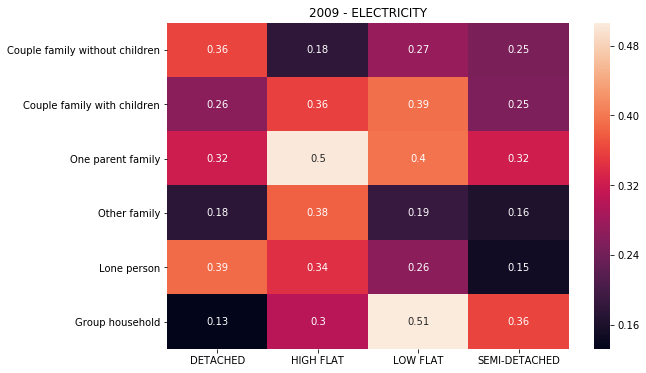

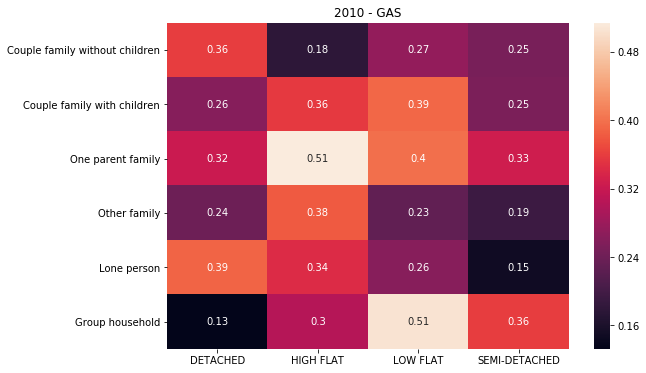

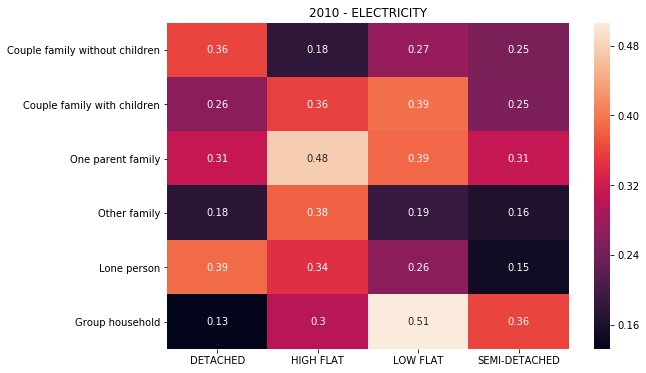

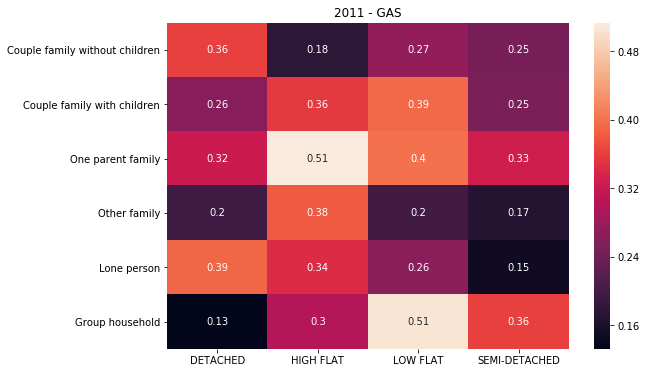

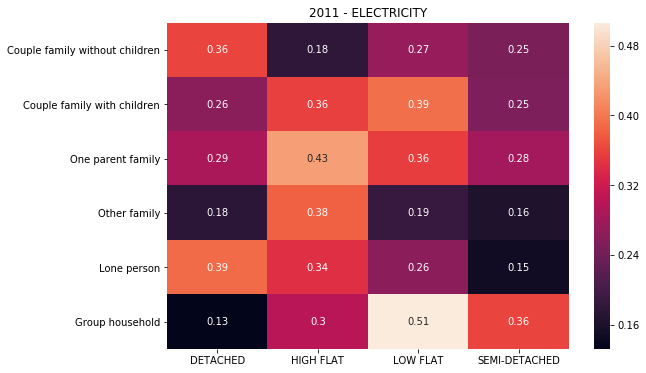

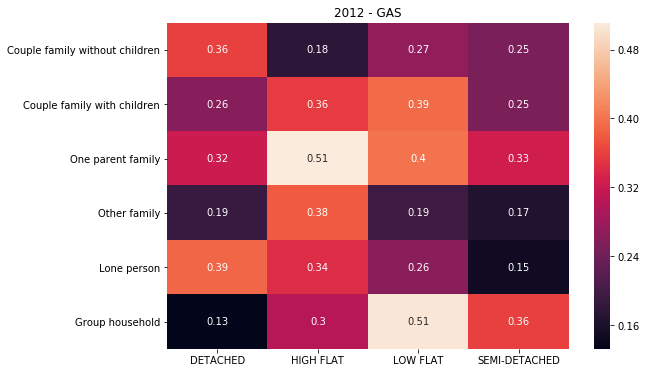

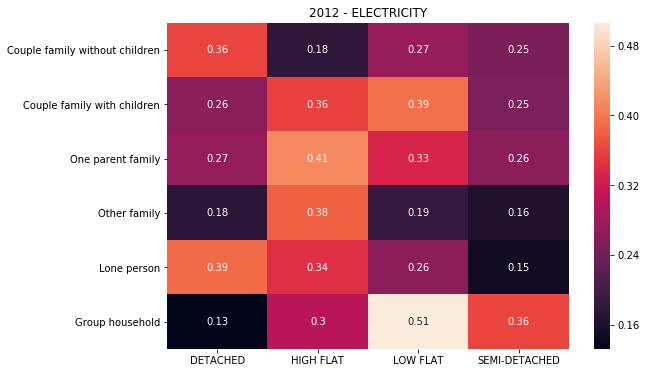

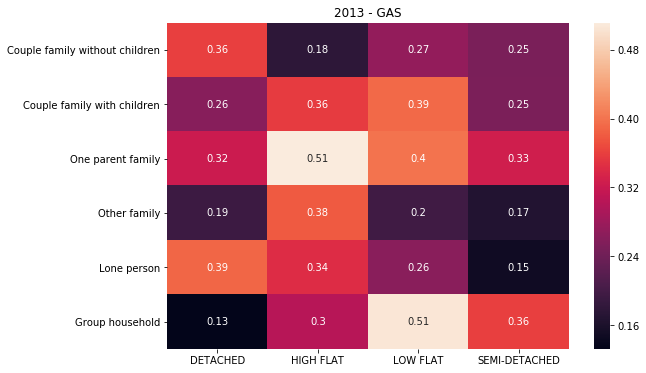

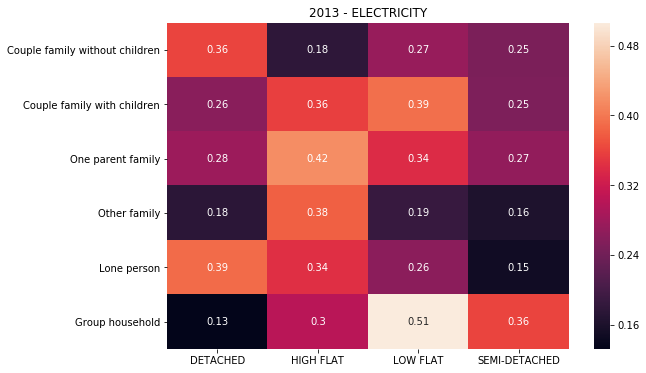

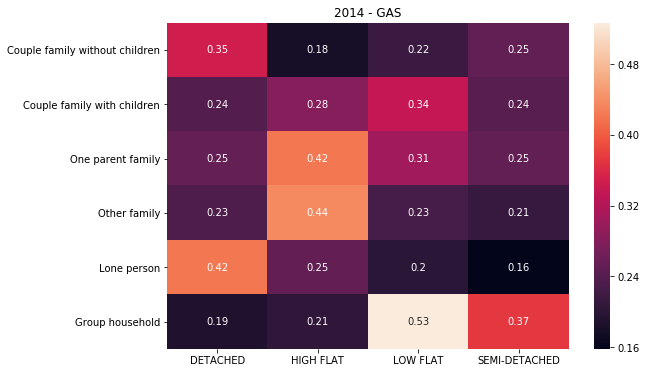

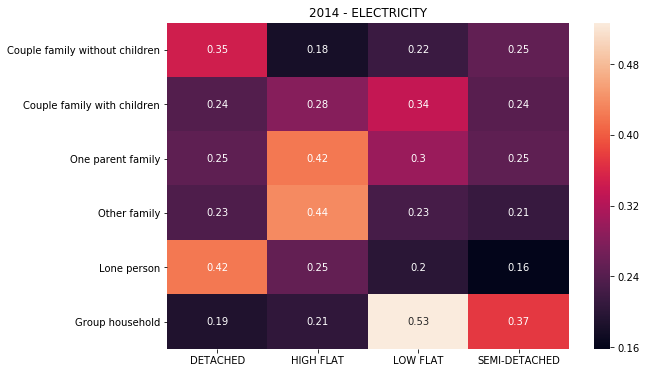

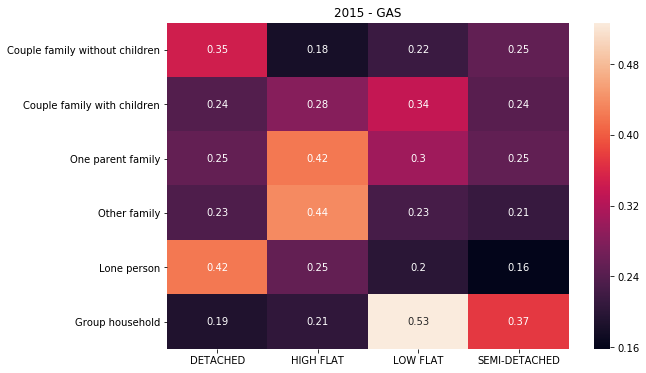

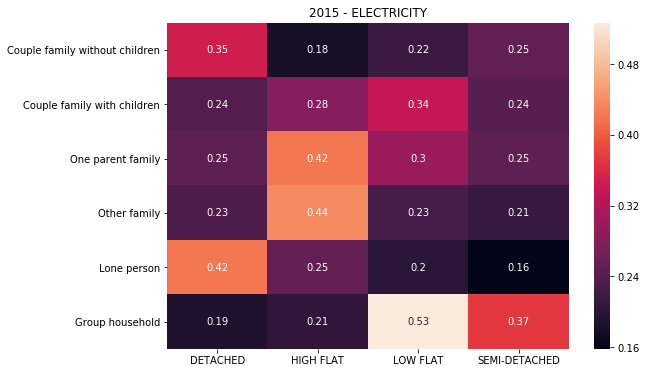

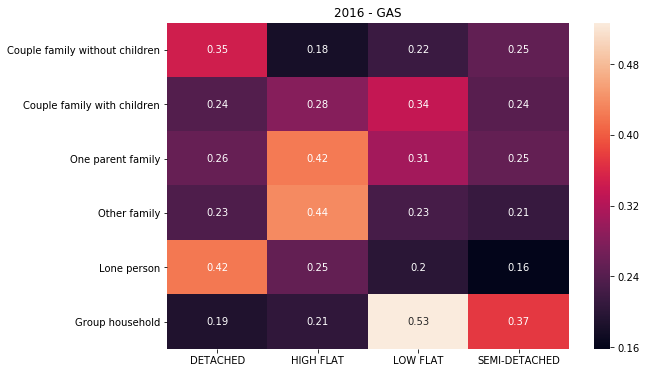

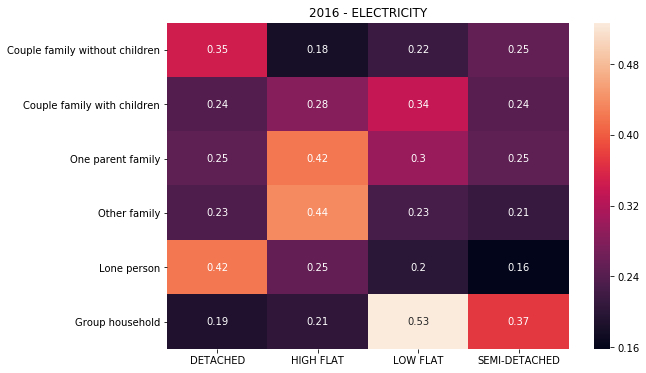

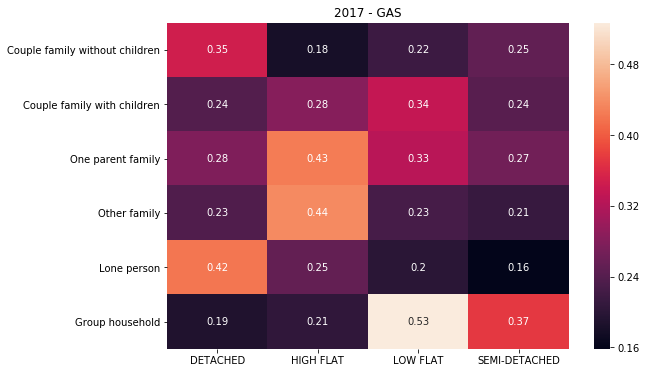

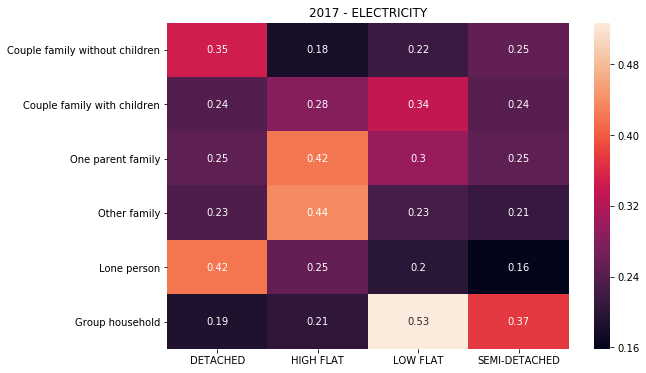

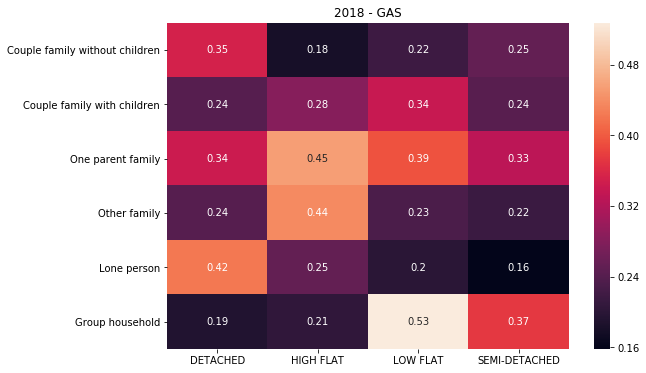

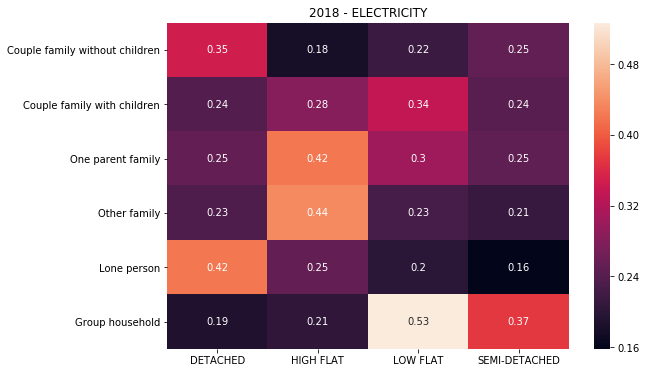

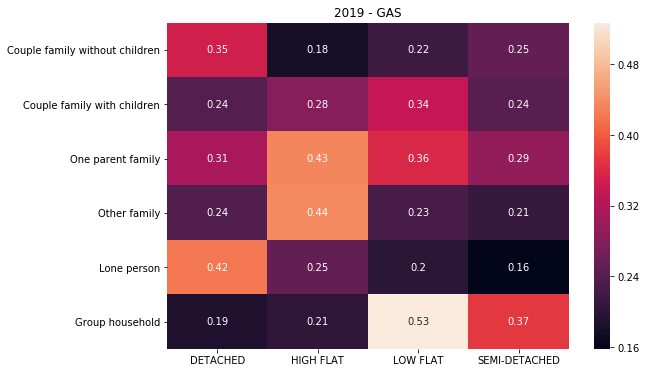

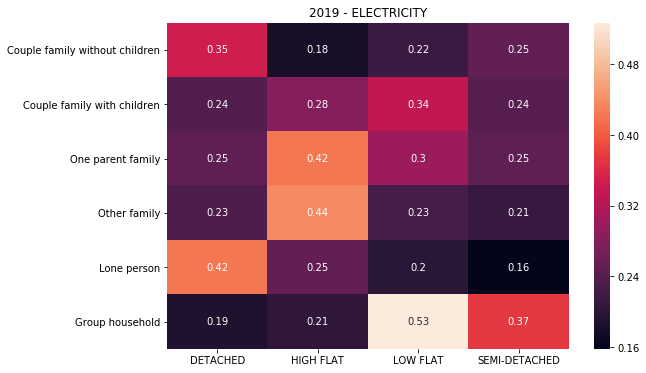

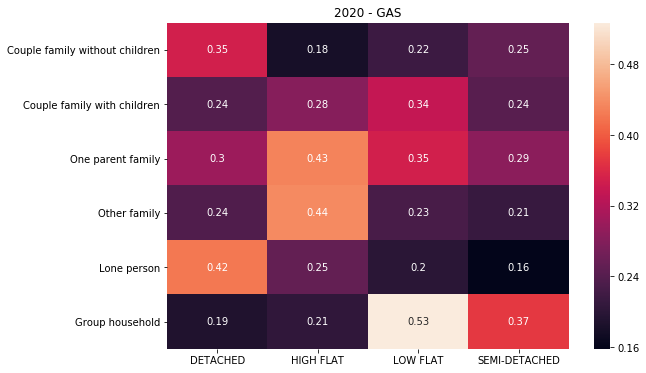

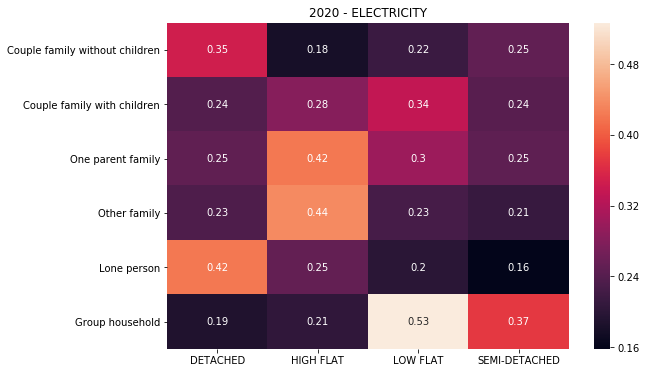

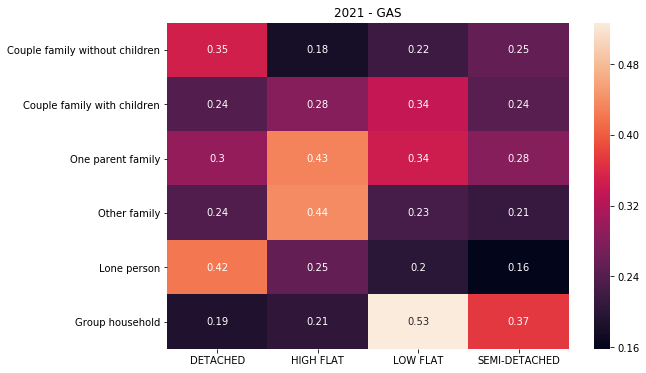

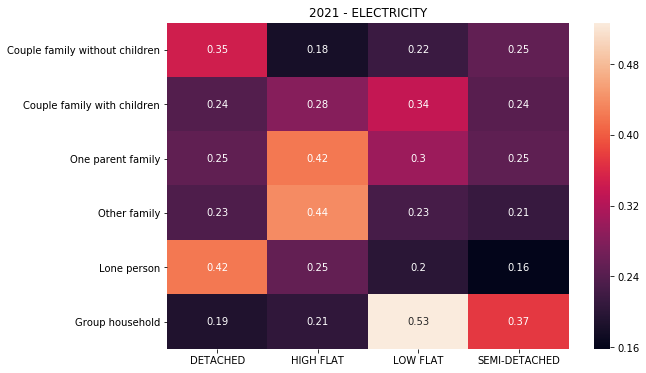

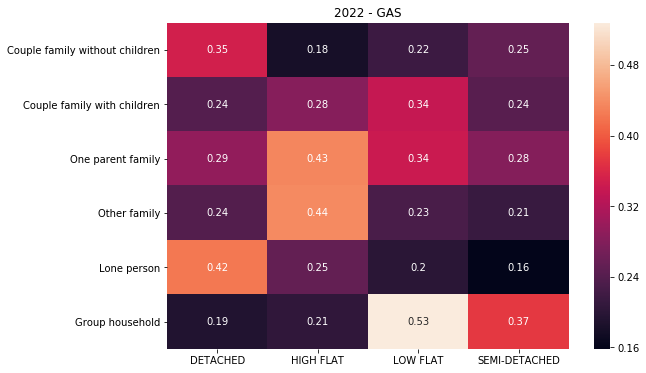

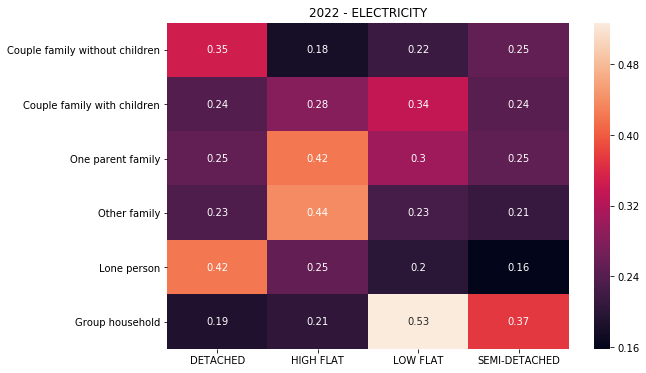

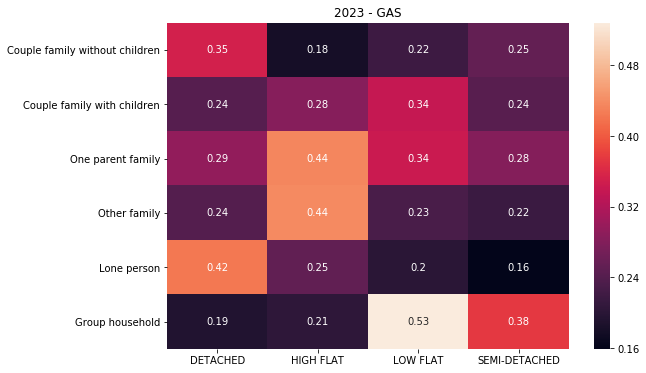

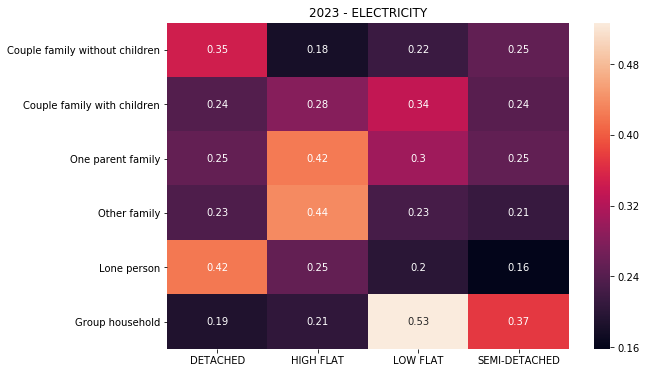

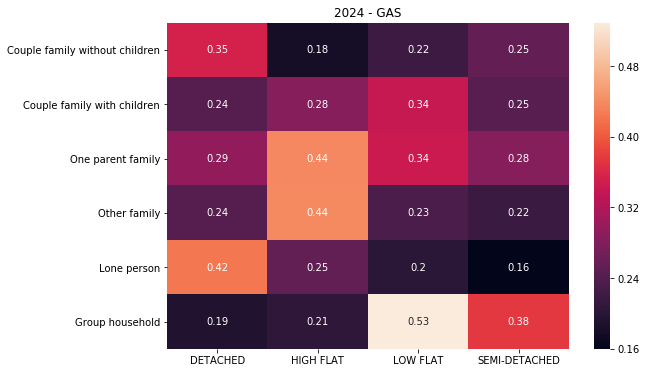

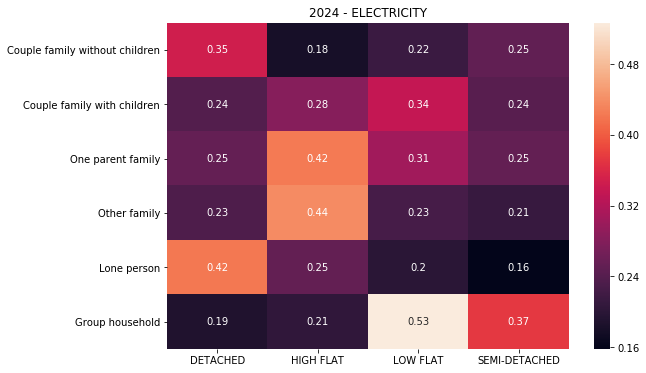

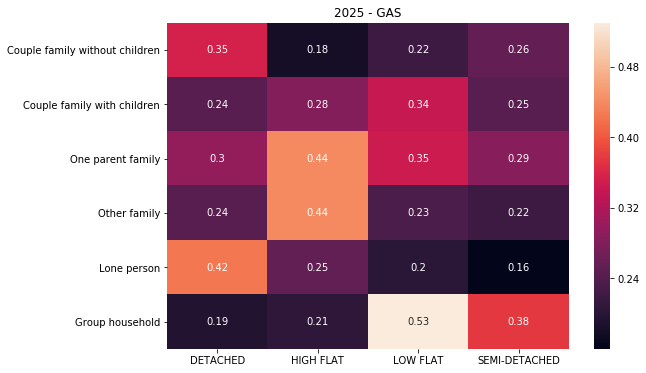

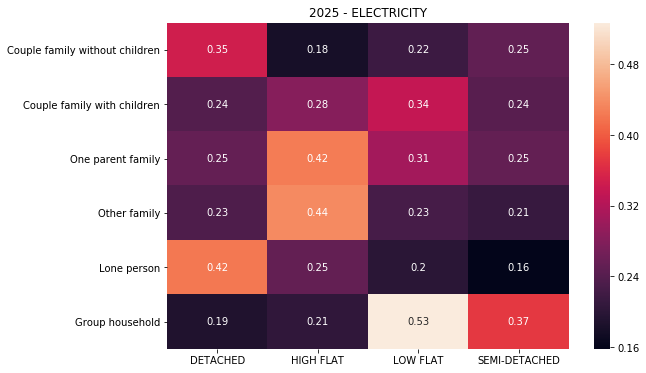

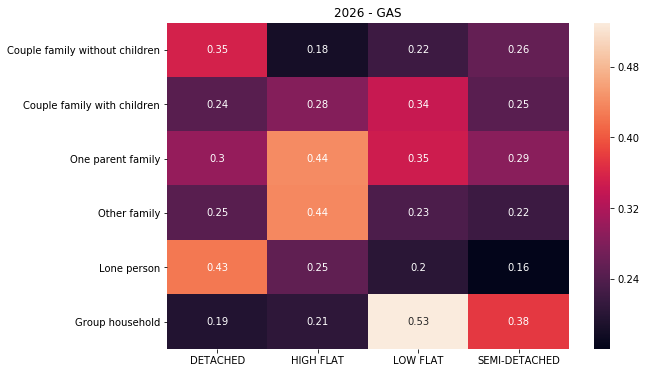

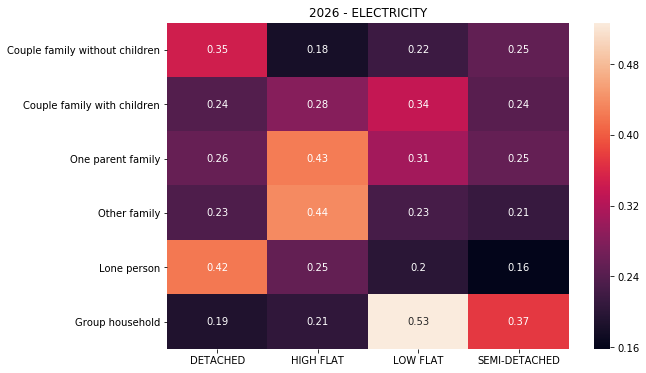

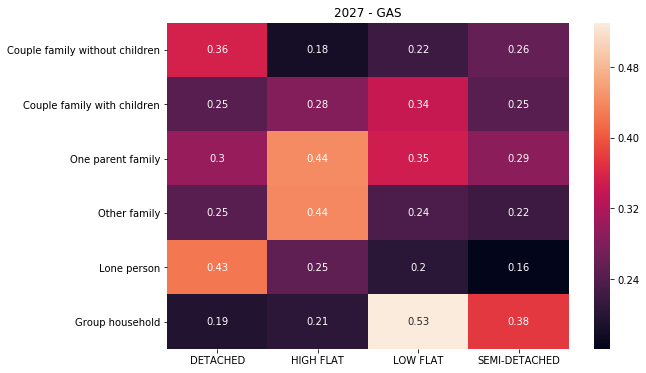

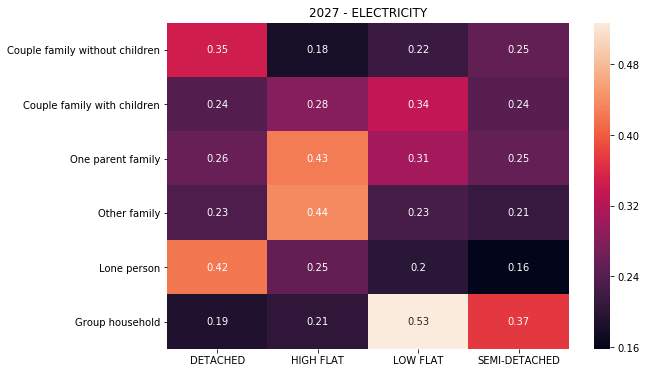

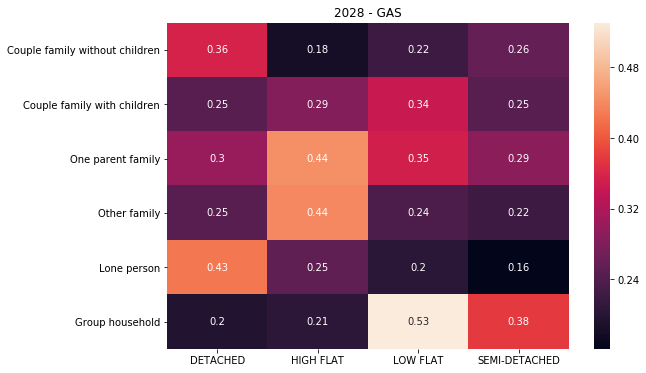

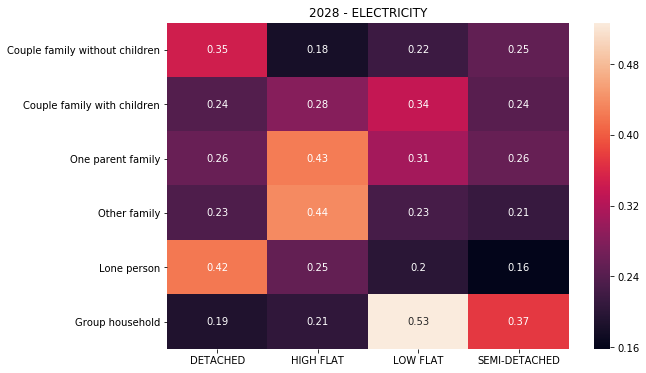

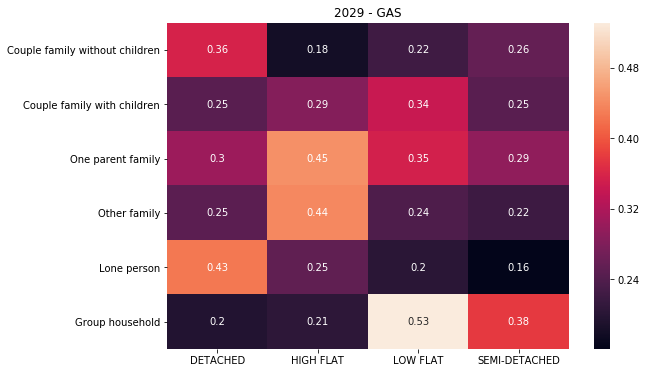

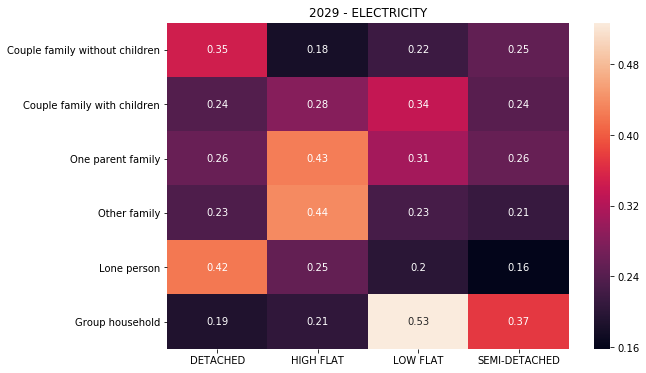

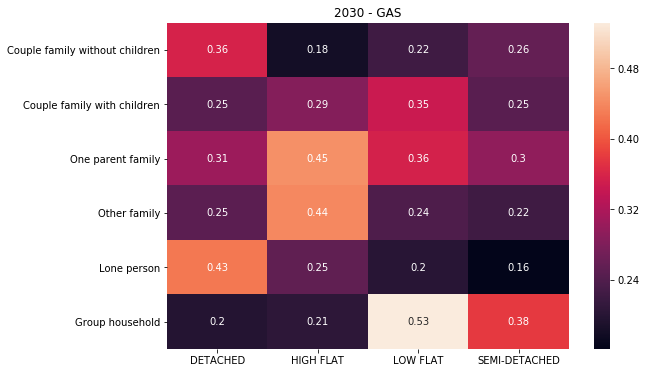

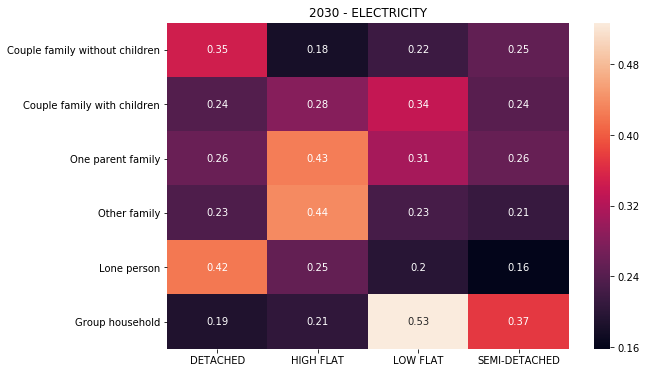

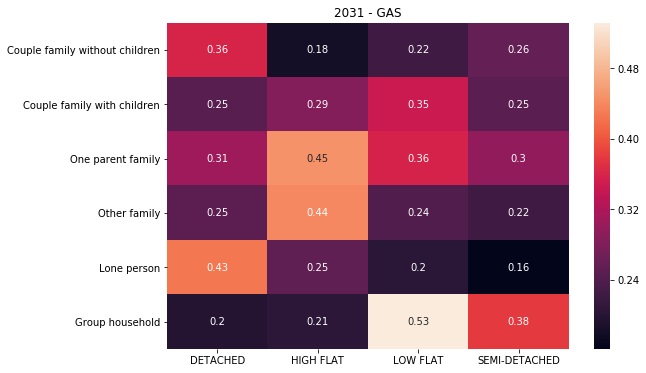

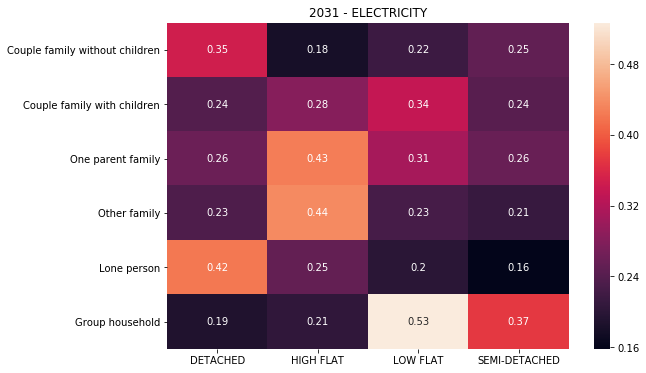

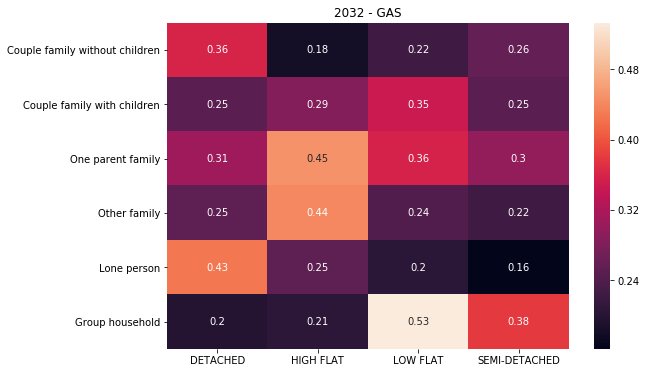

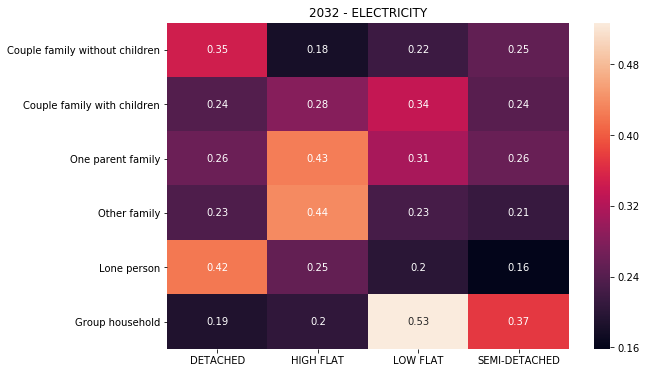

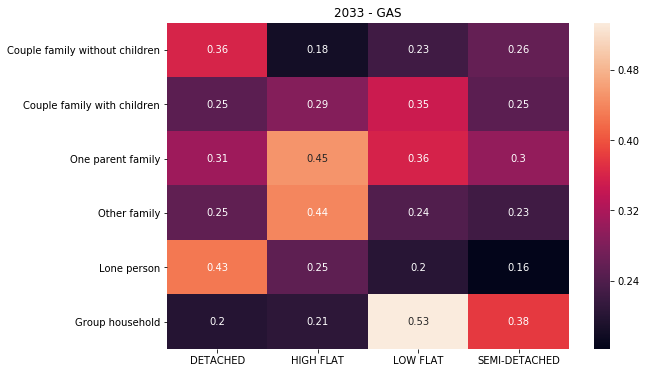

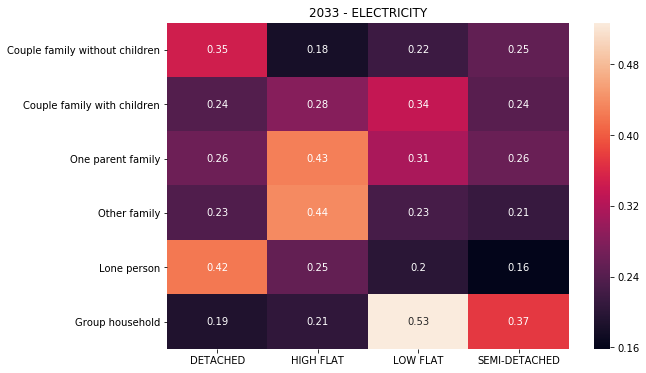

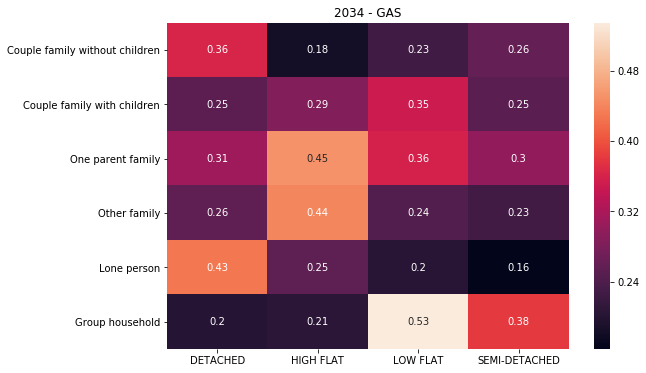

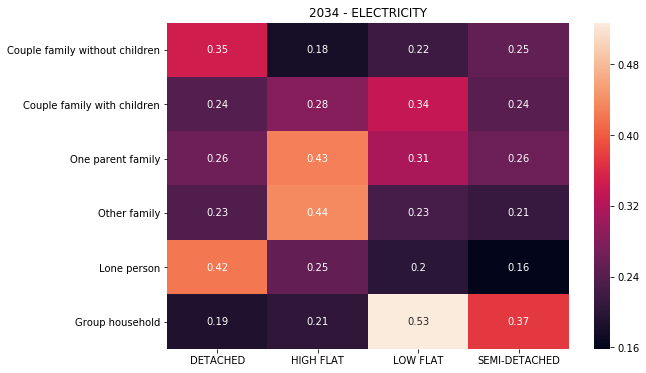

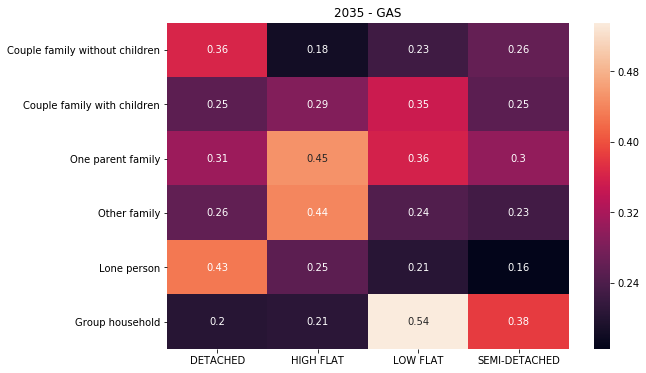

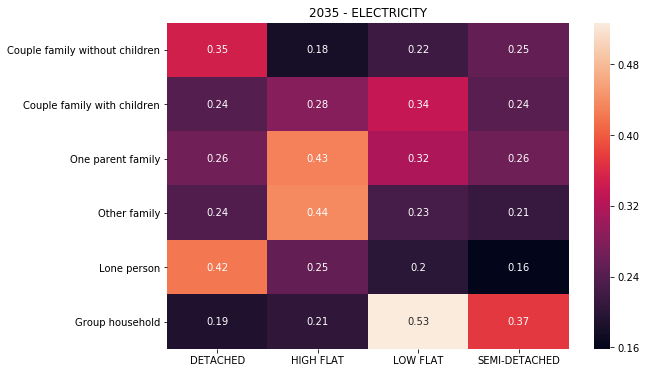

In [310]:
energy_vulnerable_df_mean = {}
for o,d,f in profiles:
    ooi = 'Energy Vulnerable Households ({}-{}-{})'.format(o,d,f)
    energy_vulnerable_df_mean[(o,d,f)] = energy_vulnerable_df[(o,d,f)].mean()
    
for year in simulationYears:
    for f in fuel_mix:
        data = []
        for o in occupancy_types:
            col = []
            for d in dwelling_types:
                col.append(energy_vulnerable_df_mean[(o,d,f)][year])        
            data.append(col)
        plot_heatmap(data, "{} - {}".format(year,f))

